# Imports

In [1]:
# Import the necessary libraries

from google.colab import drive
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy.stats import skew, kurtosis
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
import multiprocessing as mp

# Descriere Generala

În practica de zi cu zi a unui inginer sau cercetător în domeniul învățării automate intra
frecvent următoarele trei aspecte:
* Vizualizarea și “explorarea” datelor unei probleme (Exploratory Data Analysis)
* Încercarea de a extrage atribute ale datelor problemei pentru a fi utilizate în obiectivul
de analiza ales (e.g. clasificare, regresie, detectie de anomalii)
* Investigarea de modele de rețele neurale potrivite pentru extragerea “automată” de
atribute care ajută în obiectivul de analiză ales

În perioada recentă, date de la senzori de orice fel ajung să fie folosiți cu scopul de a colecta
date despre procese dinamice, care evoluează în timp  de la gesturi umane până la date
despre trafic sau tiparul de consum electric al unei gospodării tipice.

Seturile de date alese spre explorare și analiză vor surprinde astfel de procese. În particular,
problemele propuse spre analiză fac parte din categoria celor de clasificare a seriilor
temporale.

* *Sarcinile voastre de lucru vor solicita utilizarea de biblioteci de vizualizare a datelor
(crearea de diagrame), extragerea de atribute (feature extraction) pentru folosirea
algoritmilor de clasificare discutați la curs, precum și utilizarea modelelor de rețele neurale
convoluționale și recurente**



# Descrierea Seturilor de Date

In [2]:
# Connect to Google Drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# ECG Heartbeat Categorization Dataset

Acest set de date este compus din două colecții de semnale ale bătăilor inimii derivate din două seturi de date celebre în clasificarea bătăilor inimii: **setul de date MIT-BIH pentru aritmii** și **baza de date PTB Diagnostic pentru ECG**. 

Numărul de secvențe din ambele colecții este suficient de mare pentru antrenarea clasificatorilor pe bază de rețele neurale. **Semnalele corespund formelor electrocardiogramei (ECG) ale bătăilor inimii pentru cazul normal și cazurile afectate de diferite aritmii și infarct miocardic.** Aceste semnale sunt preprocesate și segmentate, fiecare segment corespunzând unei bătăi de inimă. 

* **Setul de date MIT-BIH Arrhythmia propune un task de clasificare in 5 clase (tipuri de aritmii),
pe cand PTB Diagnostic ECG propune o clasificare binara (bătaie normala sau anormala a
inimii).**

*Pentru ambele seturi de date, un segment are 188 de valori, dintre care unele valori pot fi
pad-uri finale cu valori de 0. Pentru ambele seturi de date, ultima coloana din cele 188 reprezinta eticheta tipului de aritmie (intre 0-4 pentru MITBIH, sau 0/1 - normal/anormal - pentru PTB).*

Notă: Descărcarea setului de date ECG Heartbeat Categorization Dataset se face de la https://www.kaggle.com/datasets/shayanfazeli/heartbeat?resource=download


# MIT-BIH Arrhythmia

---


In [3]:
# Load data from CSV file into a Pandas DataFrame

df_train = pd.read_csv('/content/gdrive/MyDrive/ecg_mitbih/mitbih_train.csv', header=None)
df_test = pd.read_csv('/content/gdrive/MyDrive/ecg_mitbih/mitbih_test.csv', header=None)

X_mb_train = df_train.drop(df_train.columns[[187]],axis = 1)
y_mb_train = df_train.iloc[:,187]

X_mb_test = df_test.drop(df_test.columns[[187]],axis = 1)
y_mb_test = df_test.iloc[:,187]

X_mb_train['label'] = y_mb_train
X_mb_test['label'] = y_mb_test

print(y_mb_train)
print(X_mb_train)

print(len(y_mb_train), len(y_mb_test))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64
              0         1         2         3         4         5         6  \
0      0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1      0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2      1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3      0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4      0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
...         ...       ...       ...       ...       ...       ...       ...   
87549  0.807018  0.494737  0.536842  0.529825  0.491228  0.484211  0.456140   
87550  0.718333  0.605000  0.486667  0.361667  0.231667  0.120000  0.051667   
87551  0.906122  0.624490  0.595918  0.575510  0.530612  0.481633  0.444898   
87552  0.858228  0.645570 

# PTB Diagnostic ECG

---

In [4]:
# Load data from CSV file into a Pandas DataFrame

df_train = pd.read_csv('/content/gdrive/MyDrive/ecg_mitbih/ptbdb_train.csv', header=None)
df_test = pd.read_csv('/content/gdrive/MyDrive/ecg_mitbih/ptbdb_test.csv', header=None)

X_pt_train = df_train.drop(df_train.columns[[187]],axis = 1)
y_pt_train = df_train.iloc[:,187]

X_pt_test = df_test.drop(df_test.columns[[187]],axis = 1)
y_pt_test = df_test.iloc[:,187]

y_pt_train = y_pt_train.astype(float)
y_pt_test = y_pt_test.astype(float)

X_pt_train['label'] = y_pt_train
X_pt_test['label'] = y_pt_test

print(y_pt_train)
print(X_pt_train)

print(len(y_pt_train), len(y_pt_test))

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11635    1.0
11636    1.0
11637    1.0
11638    0.0
11639    1.0
Name: 187, Length: 11640, dtype: float64
              0         1         2         3         4         5         6  \
0      1.000000  0.916264  0.338164  0.067633  0.074477  0.139291  0.140902   
1      0.969159  0.619349  0.386565  0.264047  0.250951  0.221800  0.215040   
2      1.000000  0.624483  0.076963  0.043130  0.066632  0.087035  0.086519   
3      1.000000  0.644208  0.146572  0.000000  0.128251  0.203901  0.257092   
4      0.899180  0.864930  0.604438  0.272069  0.195369  0.204534  0.121081   
...         ...       ...       ...       ...       ...       ...       ...   
11635  0.981928  0.747992  0.395582  0.096386  0.186747  0.174699  0.171687   
11636  1.000000  0.917085  0.474874  0.125628  0.000000  0.333333  0.561558   
11637  0.967667  0.515012  0.079099  0.023672  0.176674  0.174365  0.197460   
11638  1.000000  0.700711 

# Explorarea Datelor (Exploratory Data Analysis) [2p]

Primul pas cerut în rezolvarea unei probleme de clasificare este câștigarea unor cunoștințe asupra caracteristicilor principale ale problemei.

De regulă, foarte folositoare în această etapă este aplicarea unor metode de vizualizare a datelor și de raportare a distribuțiilor de valori pe fiecare variabila folosită în predicție

## 1. Analiza echilibrului de clase

  Realizați un grafic al frecvenței de apariție a fiecărei etichete (clase) în setul de date de
  antrenare / test, folosind barplot-uri / countplot.
  Pentru realizarea unor astfel de barplot-uri puteți folosi mai multe biblioteci: *text cursiv*

    ● Folosind biblioteca seaborn pentru barplot sau countplot

    ● Direct dintr-un DataFrame Pandas folosind pandas.DataFrame.plot.bar

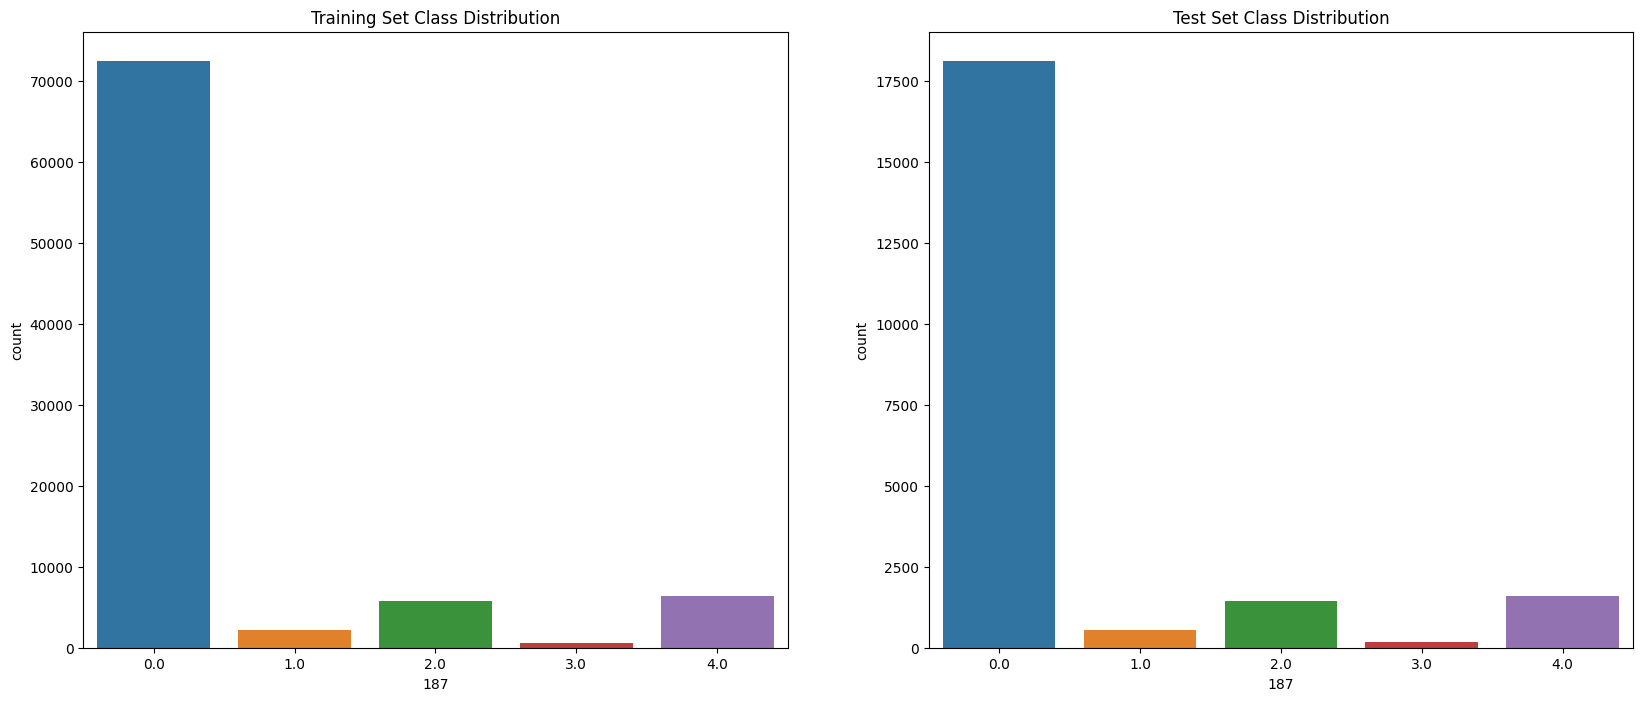

In [ ]:
# Analyze class balance MIT-BIH

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x=y_mb_train, ax=axs[0])
axs[0].set_title("Training Set Class Distribution")
sns.countplot(x=y_mb_test, ax=axs[1])
axs[1].set_title("Test Set Class Distribution")
plt.show()

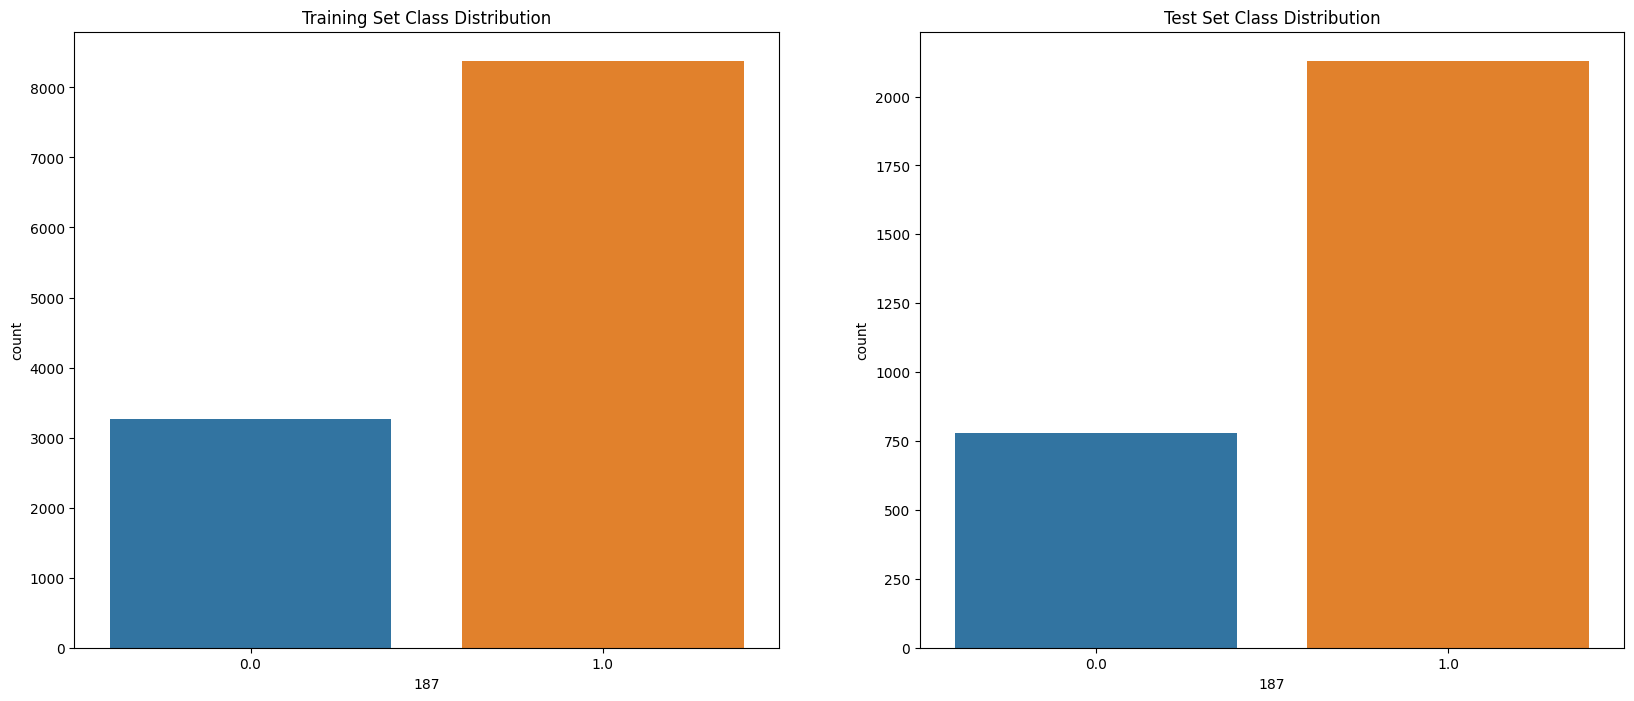

In [ ]:
# Analyze class balance PTB Diagnostic ECG

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x=y_pt_train, ax=axs[0])
axs[0].set_title("Training Set Class Distribution")
sns.countplot(x=y_pt_test, ax=axs[1])
axs[1].set_title("Test Set Class Distribution")
plt.show()

## 2. Vizualizarea seriilor de timp

    Afișați câte un exemplu de serie pentru fiecare categorie de aritmie (din seturile de date MIT-BIH / PTB )

MIT-BIH

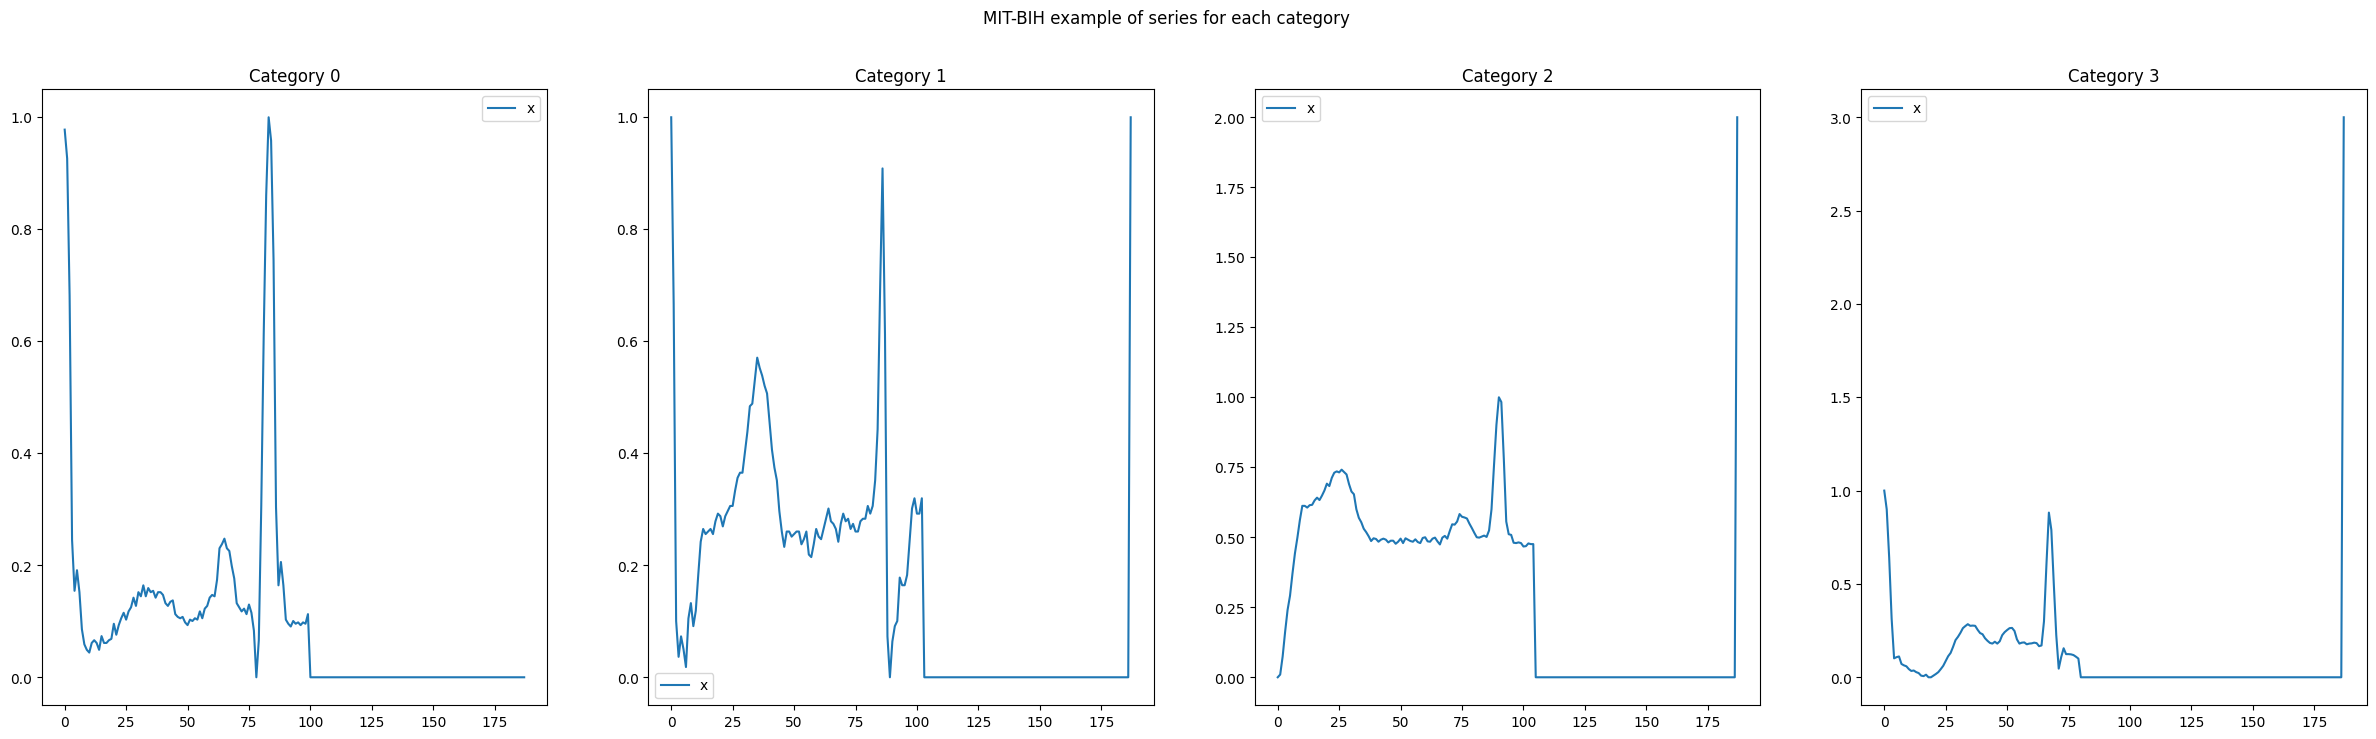

In [5]:
# Visualize the time series MIT-BIH

def plot_time_series(X, y, title):
    fig, axs = plt.subplots(1, 4, figsize=(30, 8))
    for i in range(4):
        ax = axs[i]
        idx = np.where(y == float(i))[0][0]
        x_vals = X.iloc[idx].values
        t_vals = np.arange(len(x_vals))
        ax.plot(t_vals, x_vals, label="x")
        ax.set_title(f"Category {i}")
        ax.legend()
    fig.suptitle(title)
    plt.show()

# Plot the time series
plot_time_series(X_mb_train, y_mb_train, "MIT-BIH example of series for each category")

PTB Diagnostic ECG

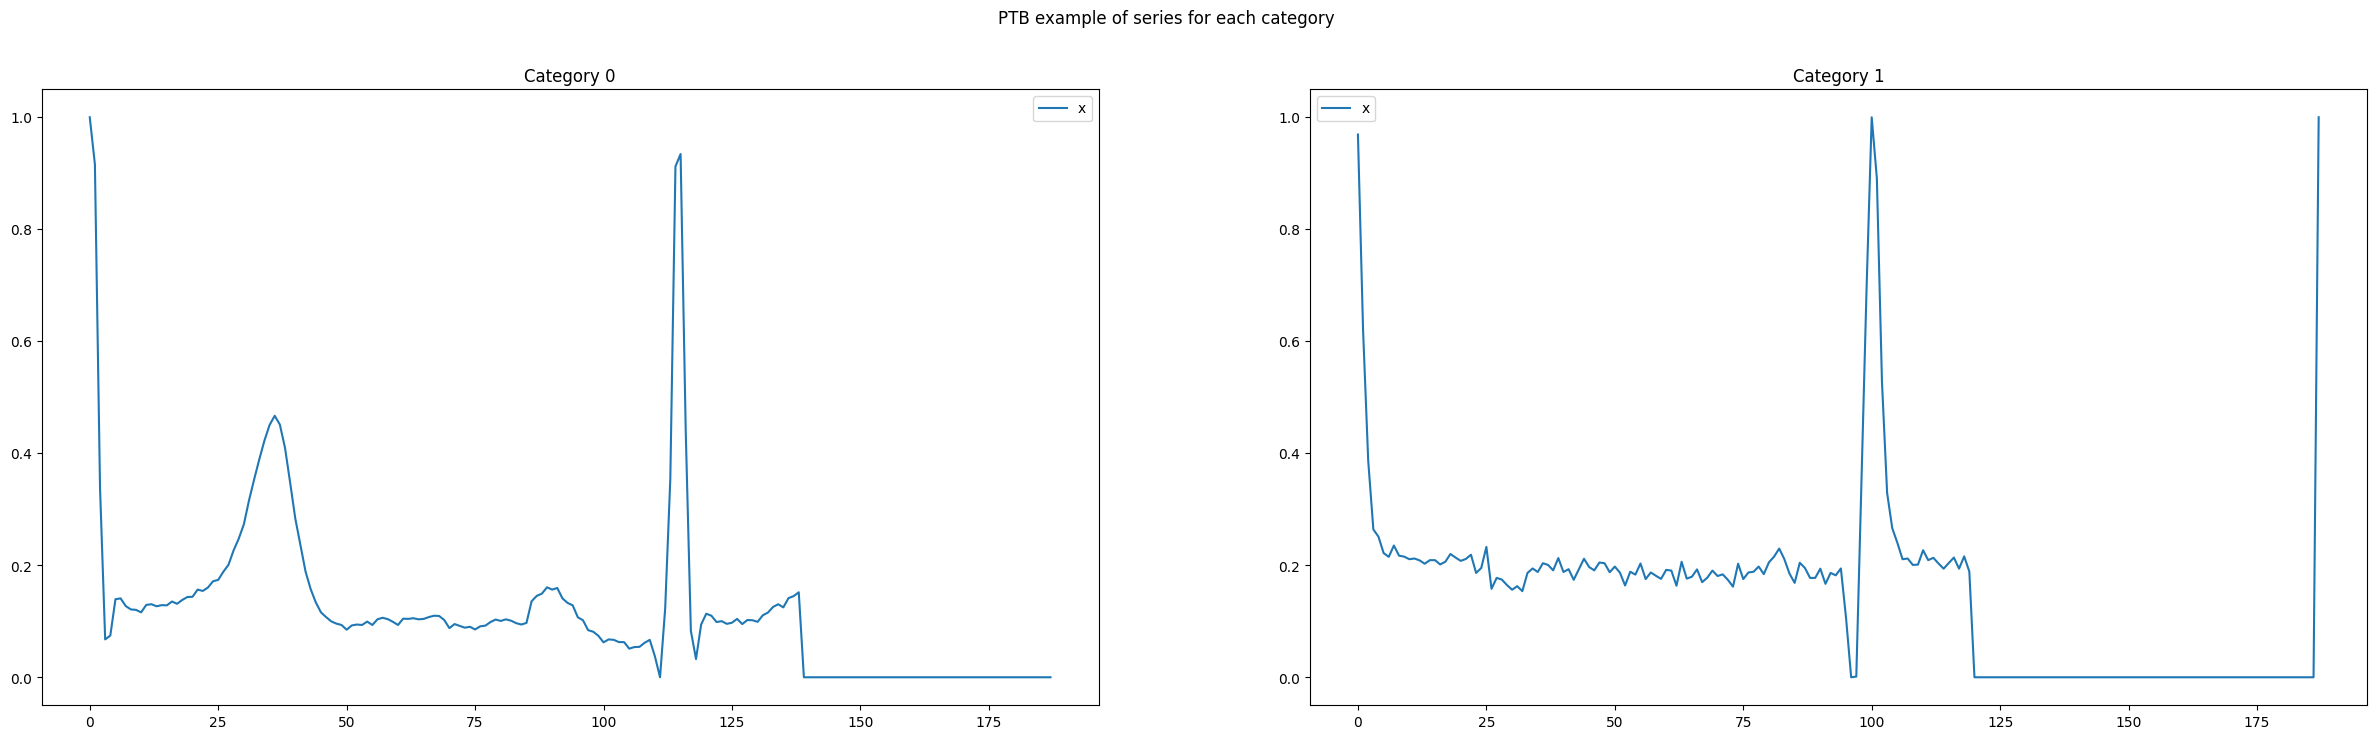

In [ ]:
# Visualize time series PTB Diagnostic ECG

def plot_time_series(X, y, title):
    fig, axs = plt.subplots(1, 2, figsize=(30, 8))
    for i in range(2):
        ax = axs[i]
        idx = np.where(y == float(i))[0][0]
        x_vals = X.iloc[idx].values
        t_vals = np.arange(len(x_vals))
        ax.plot(t_vals, x_vals, label="x")
        ax.set_title(f"Category {i}")
        ax.legend()
    fig.suptitle(title)
    plt.show()

# Plot the time series
plot_time_series(X_pt_train, y_pt_train, "PTB example of series for each category")

2. Vizualizarea seriilor de timp

    Pentru seturile de date cu aritmii afișați un grafic al mediei și deviației standard per unitate de timp, pentru fiecare clasă de aritmie. Media și deviația standard se calculează peste toate exemplele (atât din train, cât și din train set).

MIT-BIH

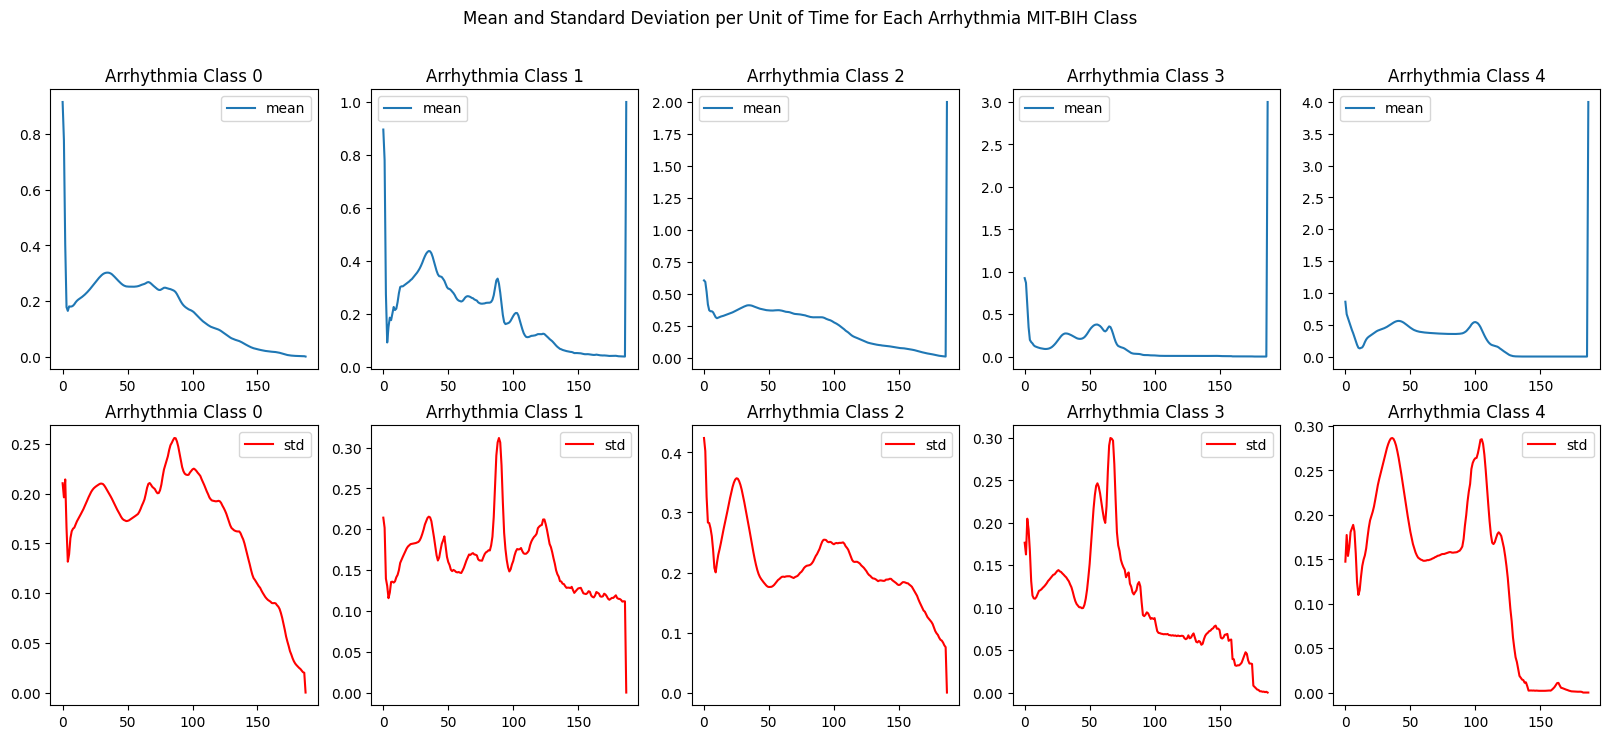

In [ ]:
# Compute mean and standard deviation for each class

X_concatenated = pd.concat([X_mb_train, X_mb_test], ignore_index=True)
Y_concatenated = pd.concat([y_mb_train, y_mb_test], ignore_index=True)

mean_per_class = X_concatenated.groupby(Y_concatenated).mean()
std_per_class = X_concatenated.groupby(Y_concatenated).std()

# Plot mean and standard deviation per unit of time for each class
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i in range(5):
    ax1 = axs[0][i]
    ax2 = axs[1][i]
    mean_vals = mean_per_class.iloc[i].values
    std_vals = std_per_class.iloc[i].values
    t_vals = np.arange(len(mean_vals))
    ax1.plot(t_vals, mean_vals, label="mean")
    ax1.set_title(f"Arrhythmia Class {i}")
    ax1.legend()
    ax2.plot(t_vals, std_vals, label="std", color='red')
    ax2.set_title(f"Arrhythmia Class {i}")
    ax2.legend()
fig.suptitle("Mean and Standard Deviation per Unit of Time for Each Arrhythmia MIT-BIH Class")
plt.show()


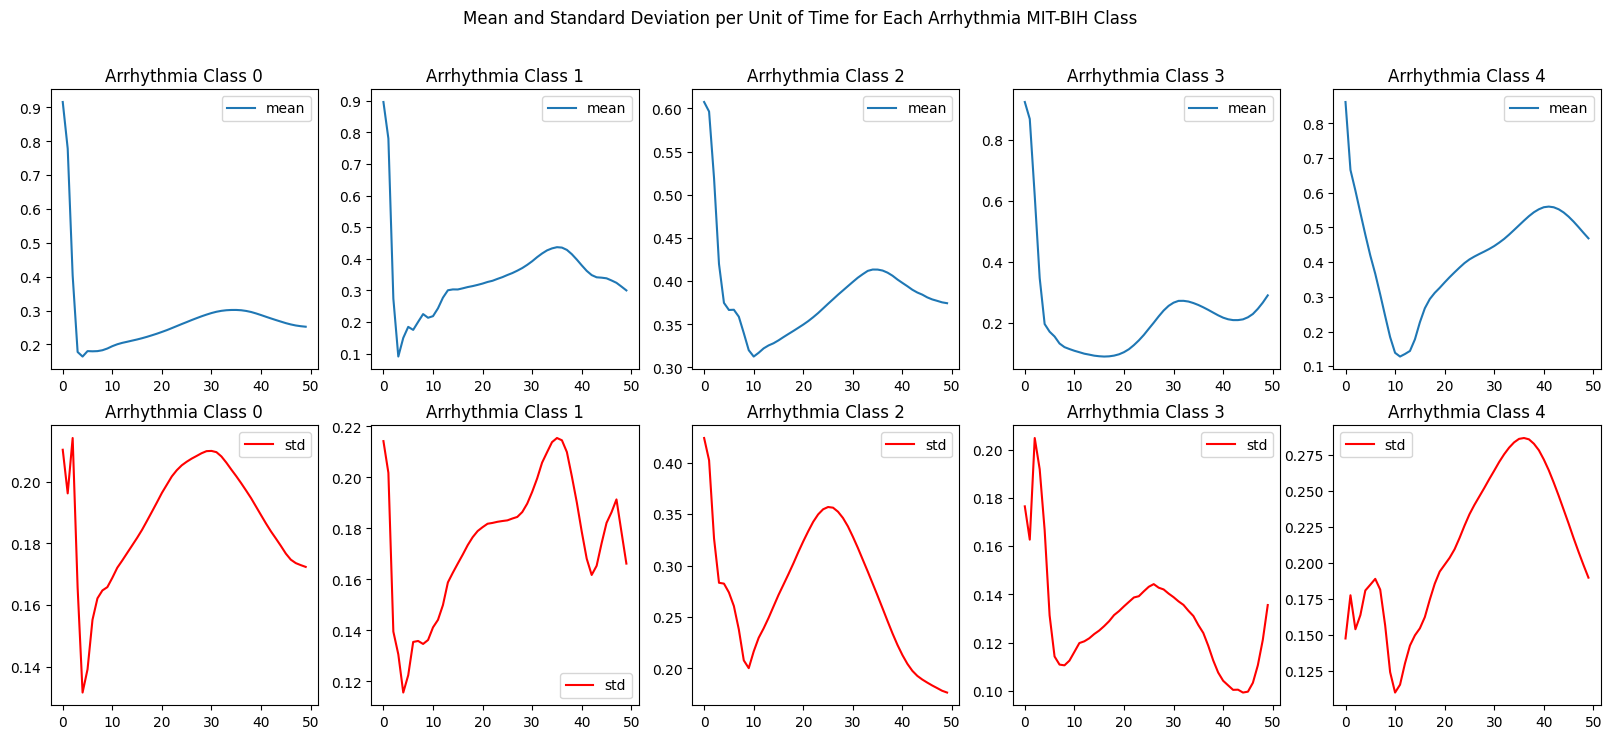

In [ ]:
# Compute mean and standard deviation for each class

X_concatenated = pd.concat([X_mb_train, X_mb_test], ignore_index=True)
Y_concatenated = pd.concat([y_mb_train, y_mb_test], ignore_index=True)

X_concatenated = X_concatenated.drop(X_concatenated.columns[50 :],axis = 1)

mean_per_class = X_concatenated.groupby(Y_concatenated).mean()
std_per_class = X_concatenated.groupby(Y_concatenated).std()

# Plot mean and standard deviation per unit of time for each class
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i in range(5):
    ax1 = axs[0][i]
    ax2 = axs[1][i]
    mean_vals = mean_per_class.iloc[i].values
    std_vals = std_per_class.iloc[i].values
    t_vals = np.arange(len(mean_vals))
    ax1.plot(t_vals, mean_vals, label="mean")
    ax1.set_title(f"Arrhythmia Class {i}")
    ax1.legend()
    ax2.plot(t_vals, std_vals, label="std", color='red')
    ax2.set_title(f"Arrhythmia Class {i}")
    ax2.legend()
fig.suptitle("Mean and Standard Deviation per Unit of Time for Each Arrhythmia MIT-BIH Class")
plt.show()

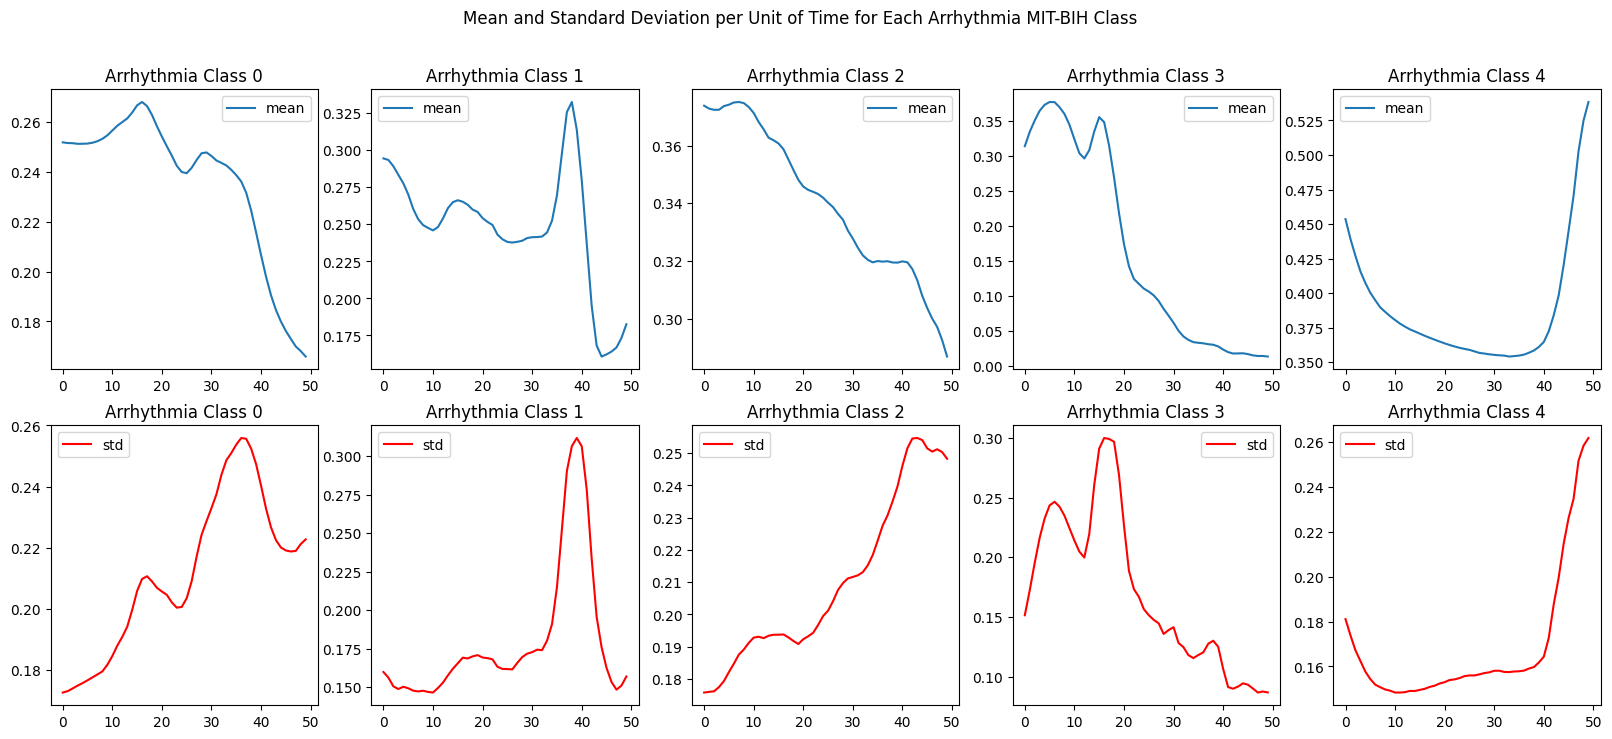

In [ ]:
# Compute mean and standard deviation for each class

X_concatenated = pd.concat([X_mb_train, X_mb_test], ignore_index=True)
Y_concatenated = pd.concat([y_mb_train, y_mb_test], ignore_index=True)

X_concatenated = X_concatenated.drop(X_concatenated.columns[: 50],axis = 1)
X_concatenated = X_concatenated.drop(X_concatenated.columns[50 :],axis = 1)

mean_per_class = X_concatenated.groupby(Y_concatenated).mean()
std_per_class = X_concatenated.groupby(Y_concatenated).std()

# Plot mean and standard deviation per unit of time for each class
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i in range(5):
    ax1 = axs[0][i]
    ax2 = axs[1][i]
    mean_vals = mean_per_class.iloc[i].values
    std_vals = std_per_class.iloc[i].values
    t_vals = np.arange(len(mean_vals))
    ax1.plot(t_vals, mean_vals, label="mean")
    ax1.set_title(f"Arrhythmia Class {i}")
    ax1.legend()
    ax2.plot(t_vals, std_vals, label="std", color='red')
    ax2.set_title(f"Arrhythmia Class {i}")
    ax2.legend()
fig.suptitle("Mean and Standard Deviation per Unit of Time for Each Arrhythmia MIT-BIH Class")
plt.show()


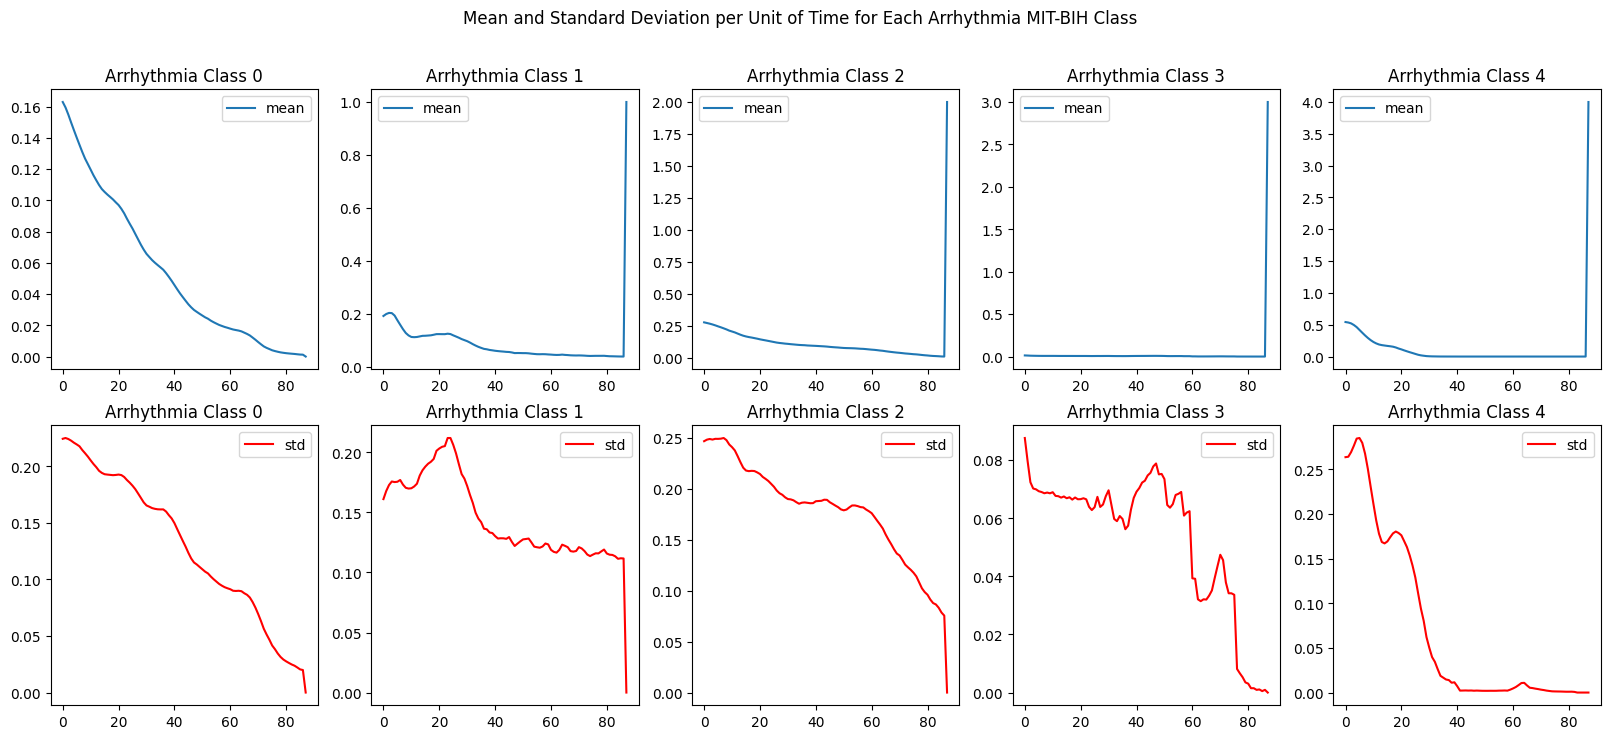

In [ ]:
# Compute mean and standard deviation for each class

X_concatenated = pd.concat([X_mb_train, X_mb_test], ignore_index=True)
Y_concatenated = pd.concat([y_mb_train, y_mb_test], ignore_index=True)

X_concatenated = X_concatenated.drop(X_concatenated.columns[: 100],axis = 1)

mean_per_class = X_concatenated.groupby(Y_concatenated).mean()
std_per_class = X_concatenated.groupby(Y_concatenated).std()

# Plot mean and standard deviation per unit of time for each class
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i in range(5):
    ax1 = axs[0][i]
    ax2 = axs[1][i]
    mean_vals = mean_per_class.iloc[i].values
    std_vals = std_per_class.iloc[i].values
    t_vals = np.arange(len(mean_vals))
    ax1.plot(t_vals, mean_vals, label="mean")
    ax1.set_title(f"Arrhythmia Class {i}")
    ax1.legend()
    ax2.plot(t_vals, std_vals, label="std", color='red')
    ax2.set_title(f"Arrhythmia Class {i}")
    ax2.legend()
fig.suptitle("Mean and Standard Deviation per Unit of Time for Each Arrhythmia MIT-BIH Class")
plt.show()


PTB Diagnostic ECG

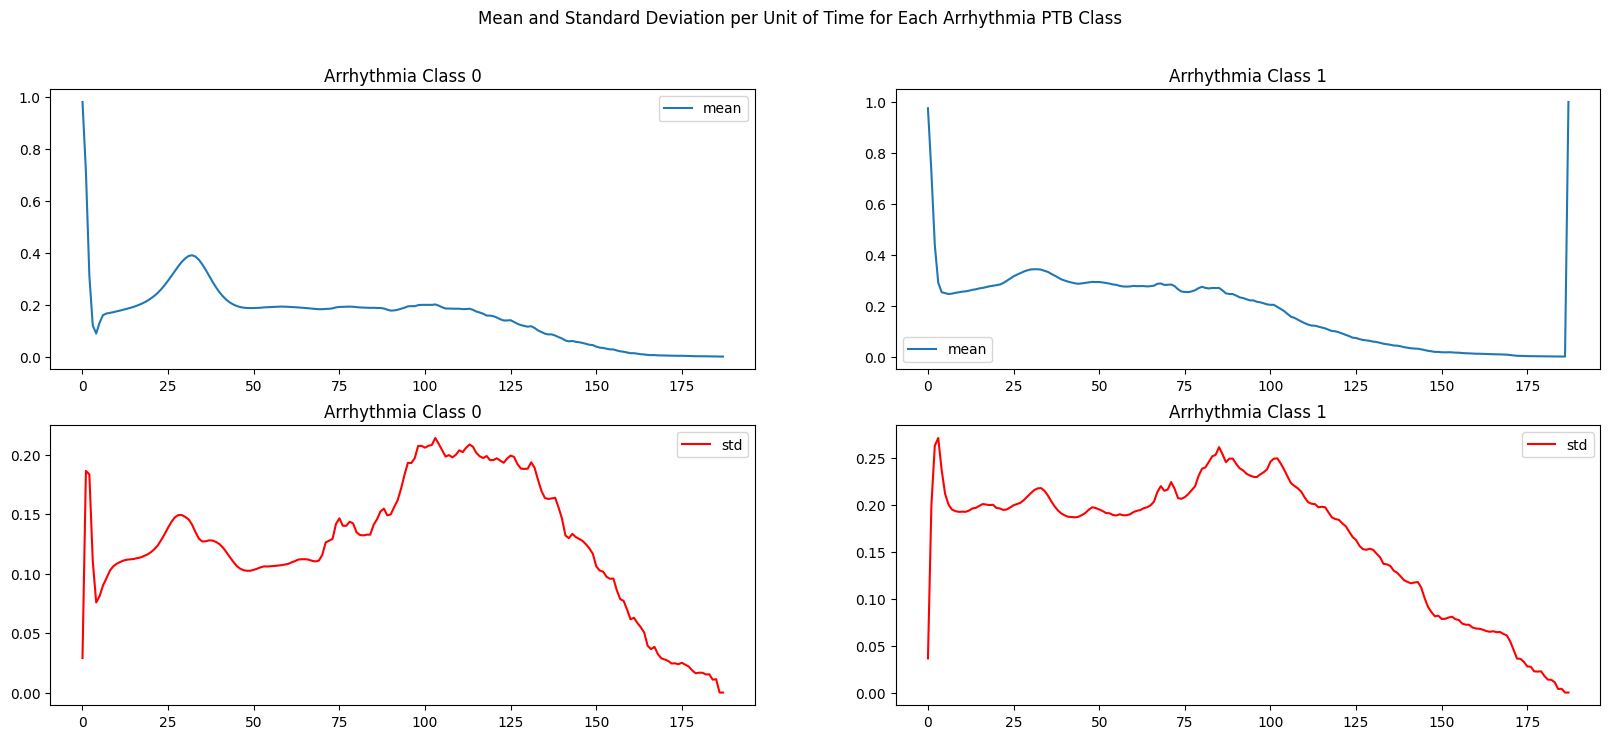

In [ ]:
# Compute mean and standard deviation for each class

X_concatenated = pd.concat([X_pt_train, X_pt_test], ignore_index=True)
Y_concatenated = pd.concat([y_pt_train, y_pt_test], ignore_index=True)

mean_per_class = X_concatenated.groupby(Y_concatenated).mean()
std_per_class = X_concatenated.groupby(Y_concatenated).std()

# Plot mean and standard deviation per unit of time for each class
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
for i in range(2):
    ax1 = axs[0][i]
    ax2 = axs[1][i]
    mean_vals = mean_per_class.iloc[i].values
    std_vals = std_per_class.iloc[i].values
    t_vals = np.arange(len(mean_vals))
    ax1.plot(t_vals, mean_vals, label="mean")
    ax1.set_title(f"Arrhythmia Class {i}")
    ax1.legend()
    ax2.plot(t_vals, std_vals, label="std", color='red')
    ax2.set_title(f"Arrhythmia Class {i}")
    ax2.legend()
fig.suptitle("Mean and Standard Deviation per Unit of Time for Each Arrhythmia PTB Class")
plt.show()

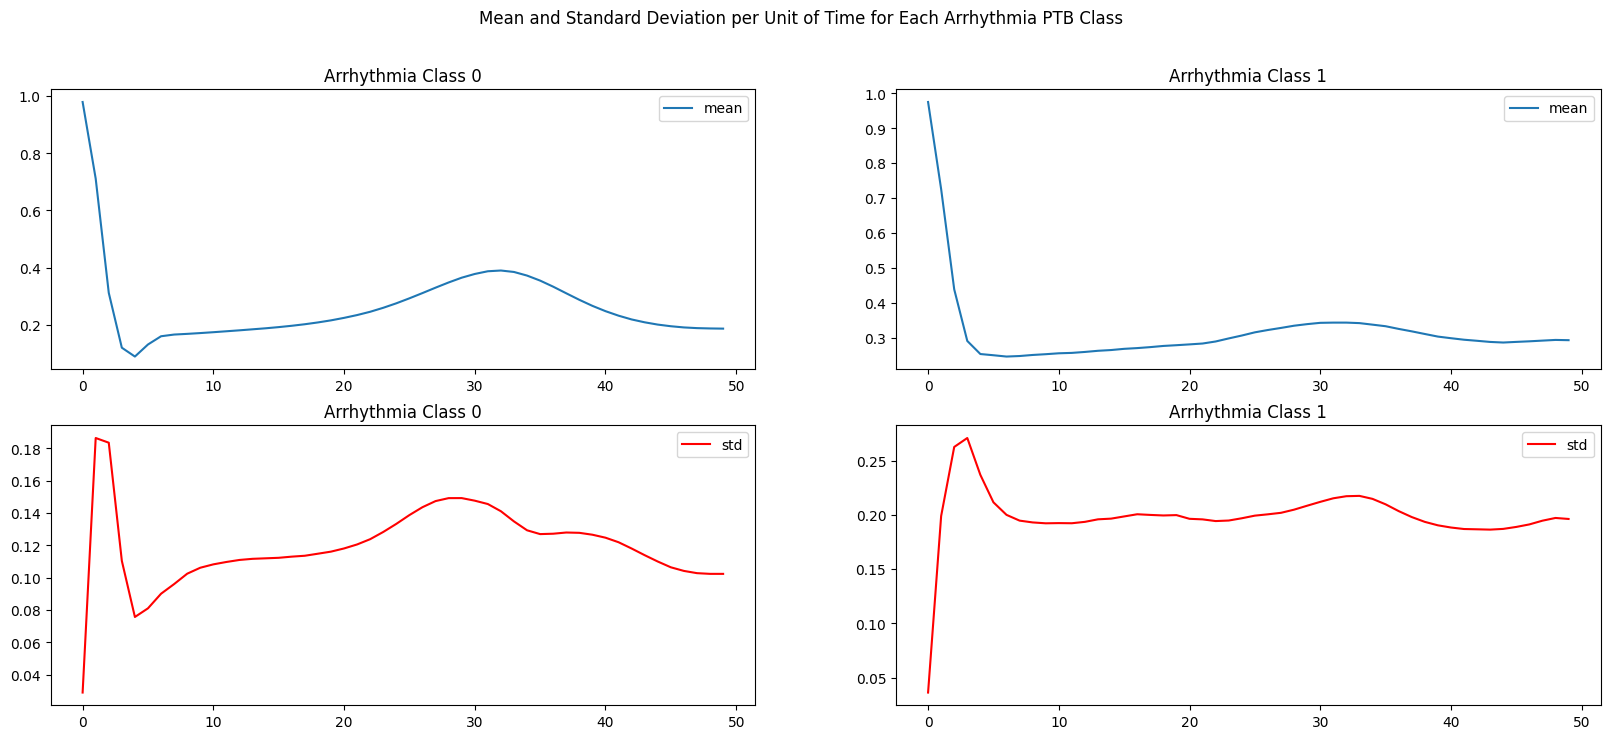

In [ ]:
# Compute mean and standard deviation for each class

X_concatenated = pd.concat([X_pt_train, X_pt_test], ignore_index=True)
Y_concatenated = pd.concat([y_pt_train, y_pt_test], ignore_index=True)

X_concatenated = X_concatenated.drop(X_concatenated.columns[50 : ], axis = 1)

mean_per_class = X_concatenated.groupby(Y_concatenated).mean()
std_per_class = X_concatenated.groupby(Y_concatenated).std()

# Plot mean and standard deviation per unit of time for each class
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
for i in range(2):
    ax1 = axs[0][i]
    ax2 = axs[1][i]
    mean_vals = mean_per_class.iloc[i].values
    std_vals = std_per_class.iloc[i].values
    t_vals = np.arange(len(mean_vals))
    ax1.plot(t_vals, mean_vals, label="mean")
    ax1.set_title(f"Arrhythmia Class {i}")
    ax1.legend()
    ax2.plot(t_vals, std_vals, label="std", color='red')
    ax2.set_title(f"Arrhythmia Class {i}")
    ax2.legend()
fig.suptitle("Mean and Standard Deviation per Unit of Time for Each Arrhythmia PTB Class")
plt.show()


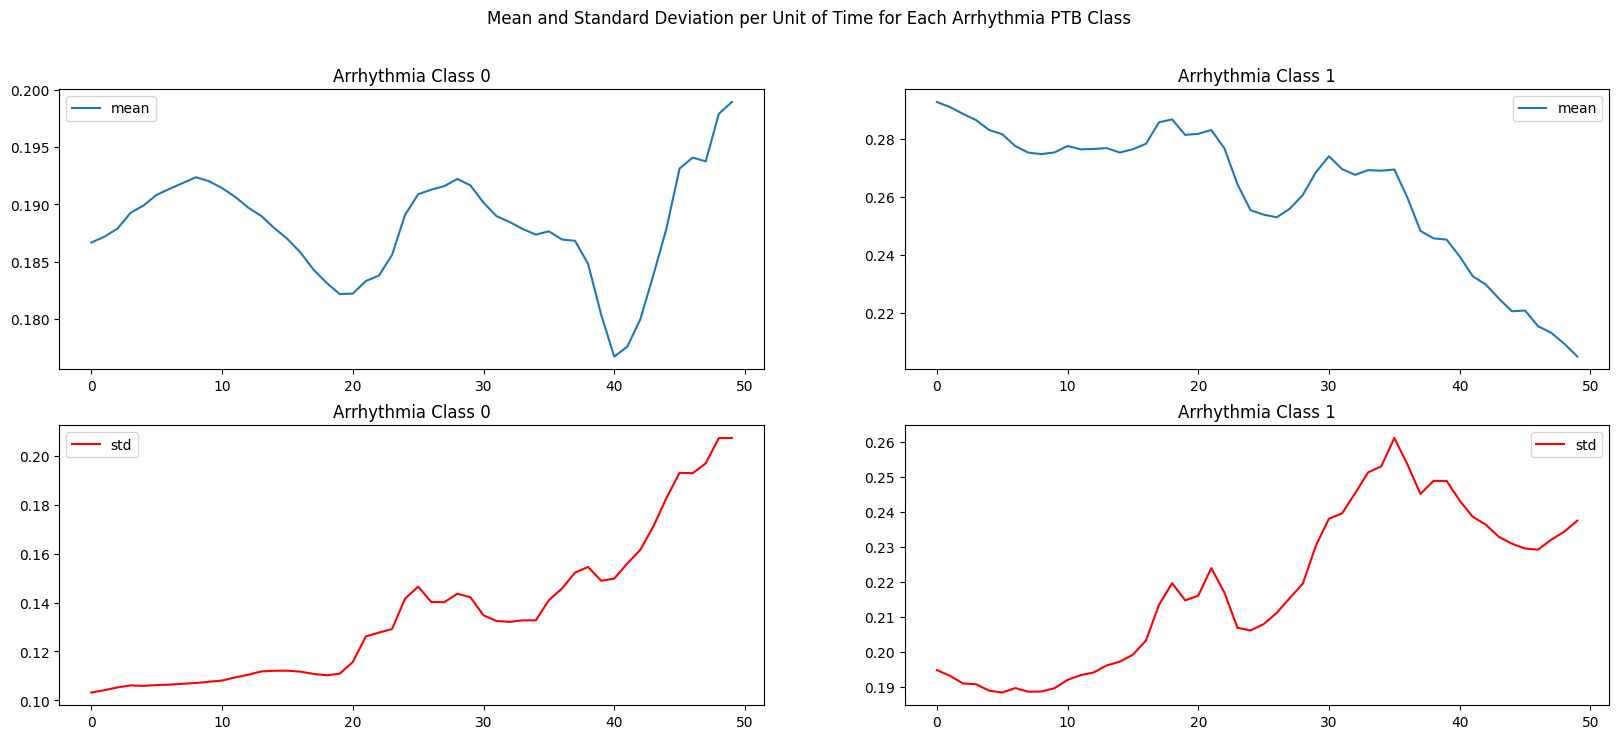

In [ ]:
# Compute mean and standard deviation for each class

X_concatenated = pd.concat([X_pt_train, X_pt_test], ignore_index=True)
Y_concatenated = pd.concat([y_pt_train, y_pt_test], ignore_index=True)

X_concatenated = X_concatenated.drop(X_concatenated.columns[: 50], axis = 1)
X_concatenated = X_concatenated.drop(X_concatenated.columns[50 :], axis = 1)

mean_per_class = X_concatenated.groupby(Y_concatenated).mean()
std_per_class = X_concatenated.groupby(Y_concatenated).std()

# Plot mean and standard deviation per unit of time for each class
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
for i in range(2):
    ax1 = axs[0][i]
    ax2 = axs[1][i]
    mean_vals = mean_per_class.iloc[i].values
    std_vals = std_per_class.iloc[i].values
    t_vals = np.arange(len(mean_vals))
    ax1.plot(t_vals, mean_vals, label="mean")
    ax1.set_title(f"Arrhythmia Class {i}")
    ax1.legend()
    ax2.plot(t_vals, std_vals, label="std", color='red')
    ax2.set_title(f"Arrhythmia Class {i}")
    ax2.legend()
fig.suptitle("Mean and Standard Deviation per Unit of Time for Each Arrhythmia PTB Class")
plt.show()


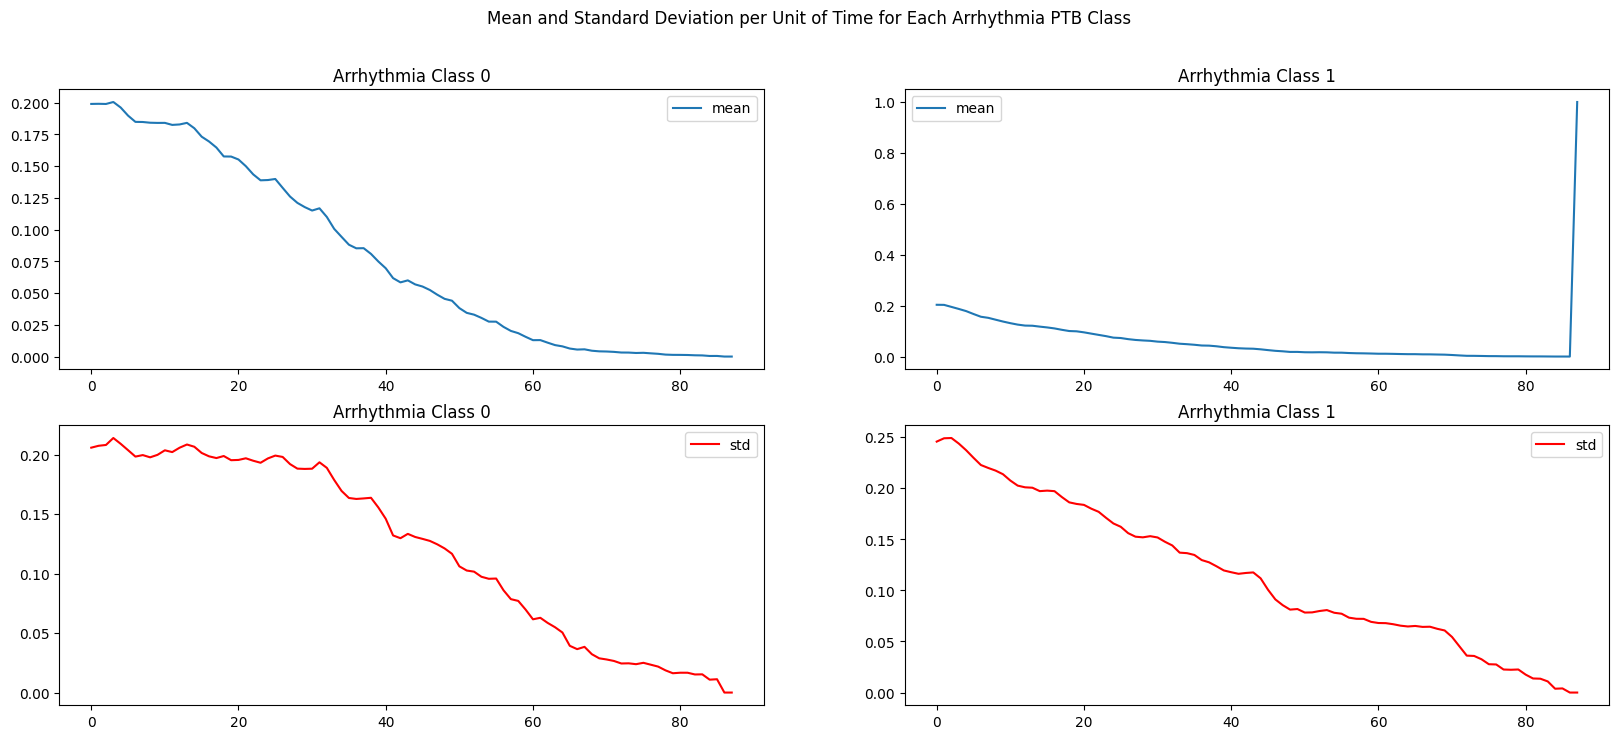

In [ ]:
# Compute mean and standard deviation for each class

X_concatenated = pd.concat([X_pt_train, X_pt_test], ignore_index=True)
Y_concatenated = pd.concat([y_pt_train, y_pt_test], ignore_index=True)

X_concatenated = X_concatenated.drop(X_concatenated.columns[: 100], axis = 1)

mean_per_class = X_concatenated.groupby(Y_concatenated).mean()
std_per_class = X_concatenated.groupby(Y_concatenated).std()

# Plot mean and standard deviation per unit of time for each class
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
for i in range(2):
    ax1 = axs[0][i]
    ax2 = axs[1][i]
    mean_vals = mean_per_class.iloc[i].values
    std_vals = std_per_class.iloc[i].values
    t_vals = np.arange(len(mean_vals))
    ax1.plot(t_vals, mean_vals, label="mean")
    ax1.set_title(f"Arrhythmia Class {i}")
    ax1.legend()
    ax2.plot(t_vals, std_vals, label="std", color='red')
    ax2.set_title(f"Arrhythmia Class {i}")
    ax2.legend()
fig.suptitle("Mean and Standard Deviation per Unit of Time for Each Arrhythmia PTB Class")
plt.show()


# Extragere manuala a atributelor și utilizarea algoritmilor clasici de Învățare Automată [4p]

In [5]:
print(len(X_mb_train.columns), X_mb_train.columns)

X_pt_train = X_pt_train.drop(X_pt_train.columns[: 10], axis = 1)
X_pt_test = X_pt_test.drop(X_pt_test.columns[: 10], axis = 1)

X_mb_train = X_mb_train.drop(X_mb_train.columns[: 10], axis = 1)
X_mb_test = X_mb_test.drop(X_mb_test.columns[: 10], axis = 1)

print(len(X_mb_train.columns), X_mb_train.columns)

X_pt_train = X_pt_train.drop(X_pt_train.columns[-10 :], axis = 1)
X_pt_test = X_pt_test.drop(X_pt_test.columns[-10 :], axis = 1)

X_mb_train = X_mb_train.drop(X_mb_train.columns[-10 :], axis = 1)
X_mb_test = X_mb_test.drop(X_mb_test.columns[-10 :], axis = 1)

print(len(X_mb_train.columns), X_mb_train.columns)

188 Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           178,     179,     180,     181,     182,     183,     184,     185,
           186, 'label'],
      dtype='object', length=188)
178 Index([     10,      11,      12,      13,      14,      15,      16,      17,
            18,      19,
       ...
           178,     179,     180,     181,     182,     183,     184,     185,
           186, 'label'],
      dtype='object', length=178)
168 Index([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
       ...
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177],
      dtype='object', length=168)


## Rezolvarea cerintelor - MIT-BIH

### 1. Extragerea atributelor [2p]

##### Feature Engineering

In [ ]:
# For each feature, compute a set of statistics and append them to the training and testing sets

X_train = X_mb_train
X_test = X_mb_test

# Compute the mean
X_train["mean"] = X_mb_train.apply(lambda x: x.mean(), axis=1)
X_test["mean"] = X_mb_test.apply(lambda x: x.mean(), axis=1)

# Compute the standard deviation
X_train['std'] = X_mb_train.apply(lambda x: x.std(), axis=1)
X_test['std'] = X_mb_test.apply(lambda x: x.std(), axis=1)

# Compute the average absolute difference from the mean
X_train['aad'] = X_mb_train.apply(lambda x: np.mean(np.absolute(x - np.mean(x))), axis=1)
X_test['aad'] = X_mb_test.apply(lambda x: np.mean(np.absolute(x - np.mean(x))), axis=1)

# Compute the minimum
X_train['min'] = X_mb_train.apply(lambda x: x.min(), axis=1)
X_test['min'] = X_mb_test.apply(lambda x: x.min(), axis=1)

# Compute the maximum
X_train['max'] = X_mb_train.apply(lambda x: x.max(), axis=1)
X_test['max'] = X_mb_test.apply(lambda x: x.max(), axis=1)

# Compute the difference between the maximum and minimum
X_train['maxmin_diff'] = X_train['max'] - X_train['min']
X_test['maxmin_diff'] = X_test['max'] - X_test['min']

# Compute the median
X_train['median'] = X_mb_train.apply(lambda x: np.median(x), axis=1)
X_test['median'] = X_mb_test.apply(lambda x: np.median(x), axis=1)

# Compute the median absolute deviation from the median
X_train['mad'] = X_mb_train.apply(lambda x: np.median(np.absolute(x - np.median(x))), axis=1)
X_test['mad'] = X_mb_test.apply(lambda x: np.median(np.absolute(x - np.median(x))), axis=1)

# Compute the interquartile range
X_train['IQR'] = X_mb_train.apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25), axis=1)
X_test['IQR'] = X_mb_test.apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25), axis=1)

# Compute the number of negative values
X_train['neg_count'] = X_mb_train.apply(lambda x: np.sum(x < 0), axis=1)
X_test['neg_count'] = X_mb_test.apply(lambda x: np.sum(x < 0), axis=1)

# Compute the number of positive values
X_train['pos_count'] = X_mb_train.apply(lambda x: np.sum(x > 0), axis=1)
X_test['pos_count'] = X_mb_test.apply(lambda x: np.sum(x > 0), axis=1)

# Compute the number of values above the mean
X_train['above_mean'] = X_mb_train.apply(lambda x: np.sum(x > x.mean()), axis=1)
X_test['above_mean'] = X_mb_test.apply(lambda x: np.sum(x > x.mean()), axis=1)

# Compute the number of peaks
X_train['peak_count'] = X_mb_train.apply(lambda x: len(find_peaks(x)[0]), axis=1)
X_test['peak_count'] = X_mb_test.apply(lambda x: len(find_peaks(x)[0]), axis=1)

# Compute the skewness
X_train['skewness'] = X_mb_train.apply(lambda x: skew(x), axis=1)
X_test['skewness'] = X_mb_test.apply(lambda x: skew(x), axis=1)

# Compute the kurtosis
X_train['kurtosis'] = X_mb_train.apply(lambda x: kurtosis(x), axis=1)
X_test['kurtosis'] = X_mb_test.apply(lambda x: kurtosis(x), axis=1)

x_list_fft = X_mb_train.apply(lambda x: np.abs(np.fft.fft(x))[1:], axis=1)
x_test_list_fft = X_mb_test.apply(lambda x: np.abs(np.fft.fft(x))[1:], axis=1)

# Compute statistical features on the raw signals in frequency domain
# Mean of the FFT
X_train['mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_test['mean_fft'] = pd.Series(x_test_list_fft).apply(lambda x: x.mean())

# Standard deviation of the FFT
X_train['std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_test['std_fft'] = pd.Series(x_test_list_fft).apply(lambda x: x.std())

# Average absolute difference of the FFT
X_train['aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['aad_fft'] = pd.Series(x_test_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# Minimum value of the FFT
X_train['min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_test['min_fft'] = pd.Series(x_test_list_fft).apply(lambda x: x.min())

# Maximum value of the FFT
X_train['max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_test['max_fft'] = pd.Series(x_test_list_fft).apply(lambda x: x.max())

# Maximum-minimum difference of the FFT
X_train['maxmin_diff_fft'] = X_train['max_fft'] - X_train['min_fft']
X_test['maxmin_diff_fft'] = X_test['max_fft'] - X_test['min_fft']

# Median of the FFT
X_train['median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_test['median_fft'] = pd.Series(x_test_list_fft).apply(lambda x: np.median(x))

# Median absolute deviation of the FFT
X_train['mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['mad_fft'] = pd.Series(x_test_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# Interquartile range of the FFT
X_train['IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['IQR_fft'] = pd.Series(x_test_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# Number of values in the FFT that are above the mean
X_train['above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['above_mean_fft'] = pd.Series(x_test_list_fft).apply(lambda x: np.sum(x > x.mean()))

# Calculate the number of peaks in the FFT of the signal
X_train['peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['peak_count_fft'] = pd.Series(x_test_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# Calculate the skewness of the FFT signal
X_train['skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: skew(x))
X_test['skewness_fft'] = pd.Series(x_test_list_fft).apply(lambda x: skew(x))

# Calculate the kurtosis of the FFT signal
X_train['kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: kurtosis(x))
X_test['kurtosis_fft'] = pd.Series(x_test_list_fft).apply(lambda x: kurtosis(x))

X_mb_test = X_test
X_mb_train = X_train
X_mb_train

10        11        12        13        14        15        16  \
0      0.044118  0.061275  0.066176  0.061275  0.049020  0.073529  0.061275   
1      0.074074  0.062678  0.065527  0.065527  0.062678  0.076923  0.071225   
2      0.056757  0.043243  0.067568  0.062162  0.078378  0.072973  0.086486   
3      0.063536  0.082873  0.085635  0.093923  0.113260  0.124309  0.140884   
4      0.131455  0.122066  0.140845  0.159624  0.150235  0.145540  0.136150   
...         ...       ...       ...       ...       ...       ...       ...   
87549  0.052632  0.140351  0.119298  0.091228  0.140351  0.161404  0.105263   
87550  0.078333  0.183333  0.275000  0.315000  0.361667  0.430000  0.481667   
87551  0.097959  0.048980  0.036735  0.053061  0.053061  0.097959  0.183673   
87552  0.101266  0.101266  0.088608  0.081013  0.073418  0.065823  0.065823   
87553  0.370800  0.287370  0.236385  0.324450  0.403244  0.409038  0.407880   

             17        18        19  ...    min_fft     max_fft  \
0      0.061275  0.066176  0.068627  ...  43.374524  289.719475   
1      0.082621  0.091168  0.096866  ...  18.865455  338.353239   
2      0.081081  0.108108  0.110811  ...  43.669057  282.766012   
3      0.132597  0.140884  0.091160  ...  60.207061  286.009230   
4      0.169014  0.178404  0.173709  ...  16.579340  343.266499   
...         ...       ...       ...  ...        ...         ...   
87549  0.143860  0.143860  0.129825  ...  34.096960  310.296091   
87550  0.526667  0.543333  0.563333  ...  37.215664  319.572354   
87551  0.269388  0.351020  0.408163  ...  34.828091  317.915563   
87552  0.053165  0.048101  0.037975  ...  35.977303  327.444416   
87553  0.390498  0.390498  0.419467  ...  37.779297  319.617666   

       maxmin_diff_fft  median_fft    mad_fft     IQR_fft  above_mean_fft  \
0           246.344951  172.903032  51.894799  110.191274              96   
1           319.487784  204.426117  64.571311  145.026968             100   
2           239.096955  164.662908  49.853192  103.788595              96   
3           225.802169  180.388155  48.915962  114.039389              98   
4           326.687159  202.906149  64.321132  144.571730             100   
...                ...         ...        ...         ...             ...   
87549       276.199132  187.185206  57.327897  126.208101             100   
87550       282.356691  207.020767  60.636328  141.834998             100   
87551       283.087472  204.973023  60.225790  141.674832             100   
87552       291.467113  201.466544  59.654056  141.115951             102   
87553       281.838369  196.117625  58.394954  134.200891             100   

       peak_count_fft  skewness_fft  kurtosis_fft  
0                   5     -0.088948     -1.059493  
1                   7     -0.271991     -1.054714  
2                   5     -0.051717     -1.043212  
3                   5     -0.153814     -1.157659  
4                   7     -0.253062     -1.026724  
...               ...           ...           ...  
87549               7     -0.183004     -1.091311  
87550               7     -0.312473     -1.184093  
87551               9     -0.313123     -1.174269  
87552               7     -0.275064     -1.135969  
87553               7     -0.255380     -1.149846  

[87554 rows x 196 columns]

In [ ]:
# X_train_saved = X_mb_train[: 168]
# X_test_saved = X_mb_test[: 168]

# X_mb_train = X_mb_train.drop(X_mb_train.columns[: 168], axis = 1)
# X_mb_test = X_mb_test.drop(X_mb_test.columns[: 168], axis = 1)

X_mb_train

10        11        12        13        14        15        16  \
0      0.044118  0.061275  0.066176  0.061275  0.049020  0.073529  0.061275   
1      0.074074  0.062678  0.065527  0.065527  0.062678  0.076923  0.071225   
2      0.056757  0.043243  0.067568  0.062162  0.078378  0.072973  0.086486   
3      0.063536  0.082873  0.085635  0.093923  0.113260  0.124309  0.140884   
4      0.131455  0.122066  0.140845  0.159624  0.150235  0.145540  0.136150   
...         ...       ...       ...       ...       ...       ...       ...   
87549  0.052632  0.140351  0.119298  0.091228  0.140351  0.161404  0.105263   
87550  0.078333  0.183333  0.275000  0.315000  0.361667  0.430000  0.481667   
87551  0.097959  0.048980  0.036735  0.053061  0.053061  0.097959  0.183673   
87552  0.101266  0.101266  0.088608  0.081013  0.073418  0.065823  0.065823   
87553  0.370800  0.287370  0.236385  0.324450  0.403244  0.409038  0.407880   

             17        18        19  ...    min_fft     max_fft  \
0      0.061275  0.066176  0.068627  ...  43.374524  289.719475   
1      0.082621  0.091168  0.096866  ...  18.865455  338.353239   
2      0.081081  0.108108  0.110811  ...  43.669057  282.766012   
3      0.132597  0.140884  0.091160  ...  60.207061  286.009230   
4      0.169014  0.178404  0.173709  ...  16.579340  343.266499   
...         ...       ...       ...  ...        ...         ...   
87549  0.143860  0.143860  0.129825  ...  34.096960  310.296091   
87550  0.526667  0.543333  0.563333  ...  37.215664  319.572354   
87551  0.269388  0.351020  0.408163  ...  34.828091  317.915563   
87552  0.053165  0.048101  0.037975  ...  35.977303  327.444416   
87553  0.390498  0.390498  0.419467  ...  37.779297  319.617666   

       maxmin_diff_fft  median_fft    mad_fft     IQR_fft  above_mean_fft  \
0           246.344951  172.903032  51.894799  110.191274              96   
1           319.487784  204.426117  64.571311  145.026968             100   
2           239.096955  164.662908  49.853192  103.788595              96   
3           225.802169  180.388155  48.915962  114.039389              98   
4           326.687159  202.906149  64.321132  144.571730             100   
...                ...         ...        ...         ...             ...   
87549       276.199132  187.185206  57.327897  126.208101             100   
87550       282.356691  207.020767  60.636328  141.834998             100   
87551       283.087472  204.973023  60.225790  141.674832             100   
87552       291.467113  201.466544  59.654056  141.115951             102   
87553       281.838369  196.117625  58.394954  134.200891             100   

       peak_count_fft  skewness_fft  kurtosis_fft  
0                   5     -0.088948     -1.059493  
1                   7     -0.271991     -1.054714  
2                   5     -0.051717     -1.043212  
3                   5     -0.153814     -1.157659  
4                   7     -0.253062     -1.026724  
...               ...           ...           ...  
87549               7     -0.183004     -1.091311  
87550               7     -0.312473     -1.184093  
87551               9     -0.313123     -1.174269  
87552               7     -0.275064     -1.135969  
87553               7     -0.255380     -1.149846  

[87554 rows x 196 columns]

In [ ]:
X_mb_test

10        11        12        13        14        15        16  \
0      0.030992  0.028926  0.035124  0.026860  0.039256  0.035124  0.043388   
1      0.304029  0.336996  0.377289  0.391941  0.439560  0.446886  0.457875   
2      0.106195  0.141593  0.128319  0.150442  0.132743  0.150442  0.132743   
3      0.102083  0.122917  0.150000  0.168750  0.172917  0.170833  0.168750   
4      0.080537  0.104027  0.093960  0.117450  0.097315  0.134228  0.124161   
...         ...       ...       ...       ...       ...       ...       ...   
21887  0.075862  0.032184  0.000000  0.012644  0.119540  0.243678  0.310345   
21888  0.289985  0.376682  0.412556  0.452915  0.529148  0.582960  0.641256   
21889  0.103858  0.086053  0.091988  0.083086  0.091988  0.077151  0.068249   
21890  0.063492  0.091270  0.162698  0.146825  0.170635  0.234127  0.238095   
21891  0.228850  0.136659  0.047722  0.010846  0.100868  0.188720  0.227766   

             17        18        19  ...    min_fft     max_fft  \
0      0.047521  0.053719  0.053719  ...  23.786446  321.590178   
1      0.479853  0.512821  0.534799  ...  55.790716  300.358793   
2      0.150442  0.123894  0.163717  ...  28.423251  302.913892   
3      0.164583  0.156250  0.152083  ...  53.995033  299.886614   
4      0.161074  0.171141  0.194631  ...  18.245800  311.733931   
...         ...       ...       ...  ...        ...         ...   
21887  0.367816  0.412644  0.434483  ...  42.803865  320.016904   
21888  0.662182  0.678625  0.684604  ...  27.930877  323.751940   
21889  0.053412  0.053412  0.044510  ...  16.442864  315.610878   
21890  0.194444  0.202381  0.198413  ...  16.071128  316.924174   
21891  0.240781  0.257050  0.263557  ...  38.196302  324.350568   

       maxmin_diff_fft  median_fft    mad_fft     IQR_fft  above_mean_fft  \
0           297.803733  190.345665  63.418865  131.647689             100   
1           244.568077  184.497149  51.376901  119.311631             100   
2           274.490641  172.469680  58.203510  112.571805              98   
3           245.891581  189.364143  54.895651  125.507060              96   
4           293.488131  171.623403  63.556766  116.743986             100   
...                ...         ...        ...         ...             ...   
21887       277.213039  201.884583  64.587961  142.184177             100   
21888       295.821063  197.820824  59.773079  139.838347             100   
21889       299.168014  183.707552  61.150711  121.415692              98   
21890       300.853046  177.522510  62.097049  118.808514             100   
21891       286.154266  199.976846  60.107533  140.654171             100   

       peak_count_fft  skewness_fft  kurtosis_fft  
0                   7     -0.201619     -1.054173  
1                   5     -0.166735     -1.143185  
2                   7     -0.107227     -1.037528  
3                   5     -0.216509     -1.183550  
4                   7     -0.084356     -1.001317  
...               ...           ...           ...  
21887               7     -0.308299     -1.198967  
21888               7     -0.264618     -1.119007  
21889               7     -0.152949     -1.035162  
21890               9     -0.108746     -1.000084  
21891               7     -0.280265     -1.158641  

[21892 rows x 196 columns]

In [ ]:
# Suppressing warning messages

warnings.filterwarnings('ignore')

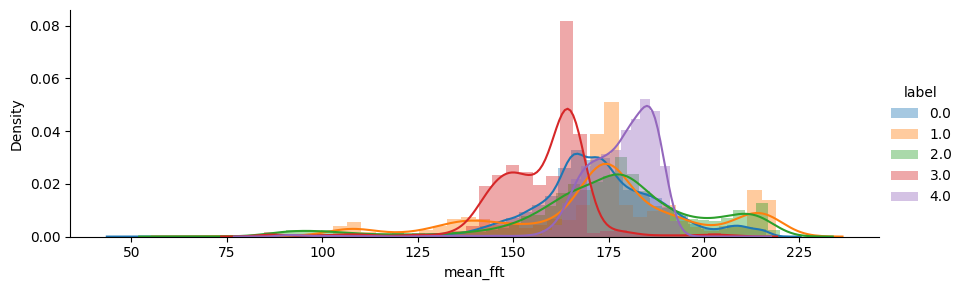

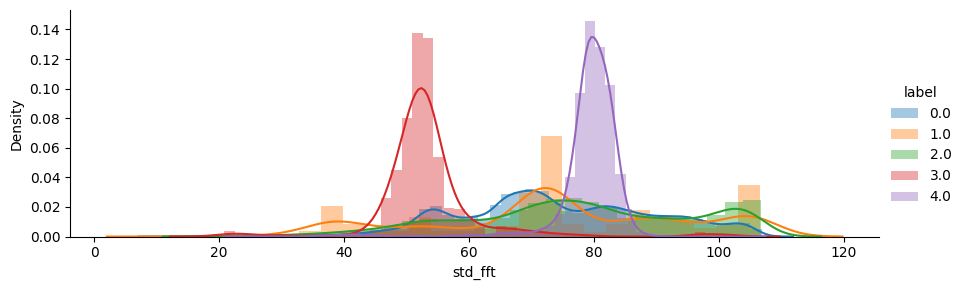

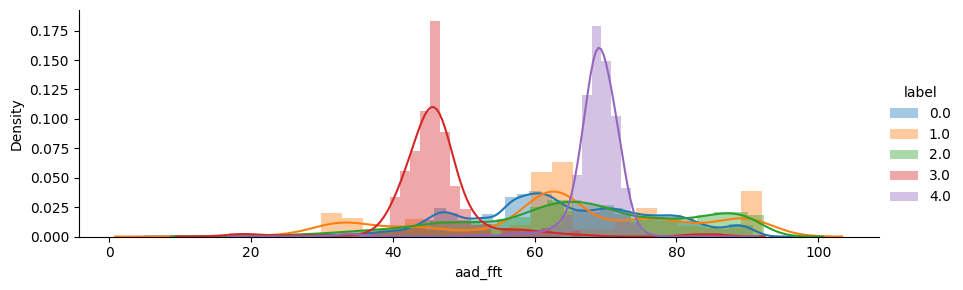

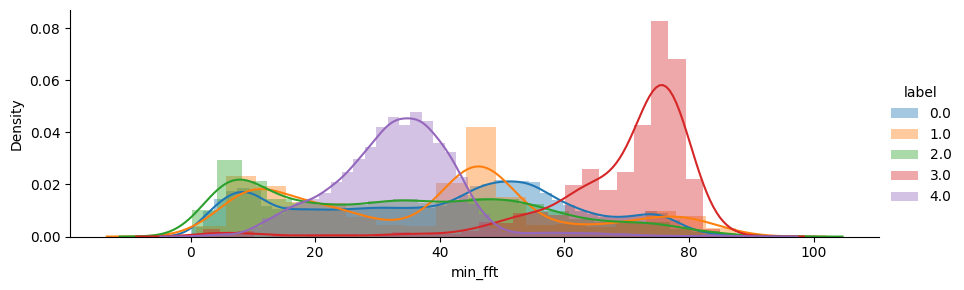

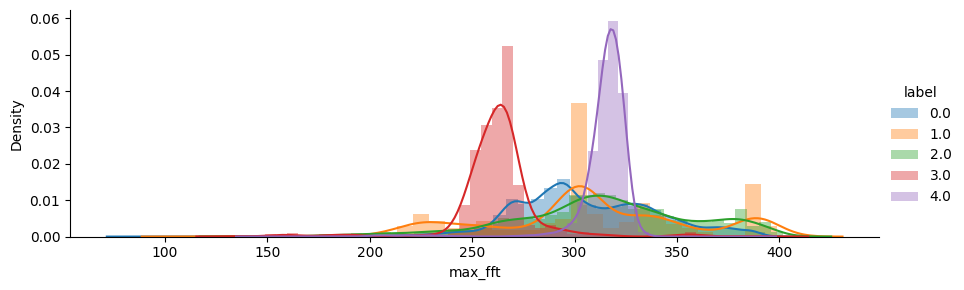

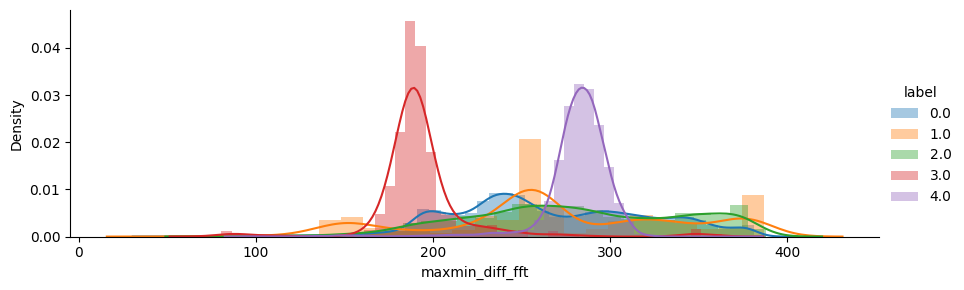

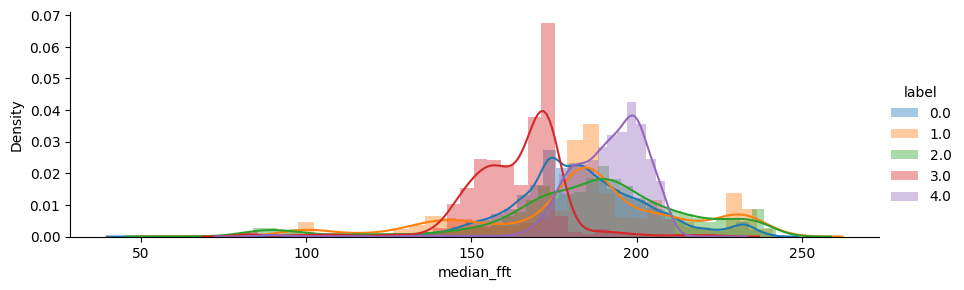

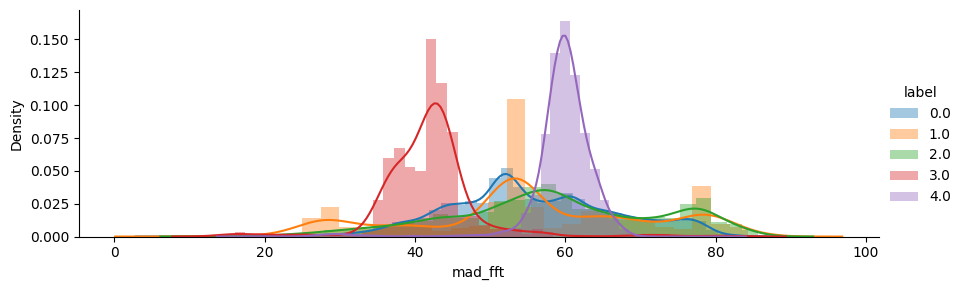

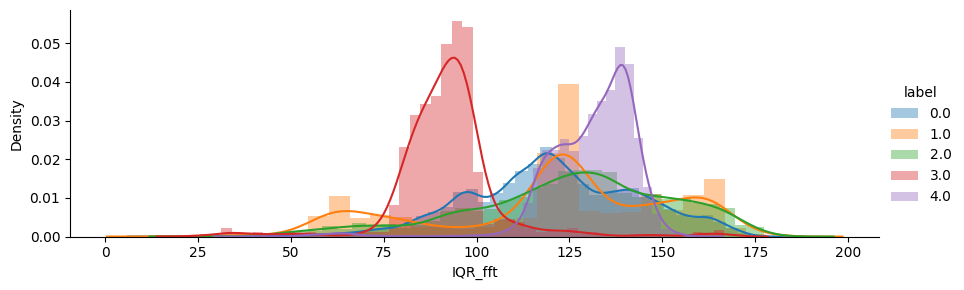

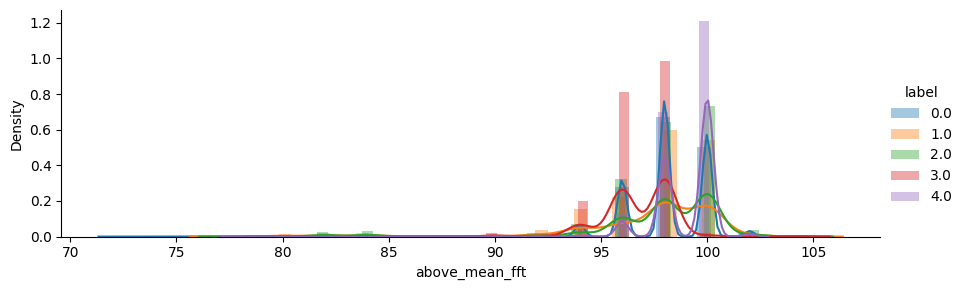

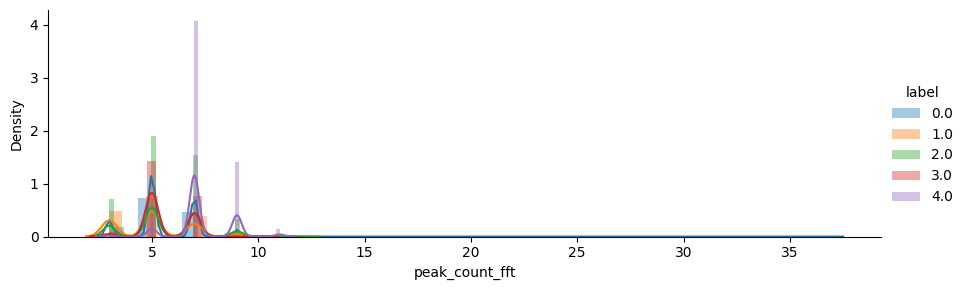

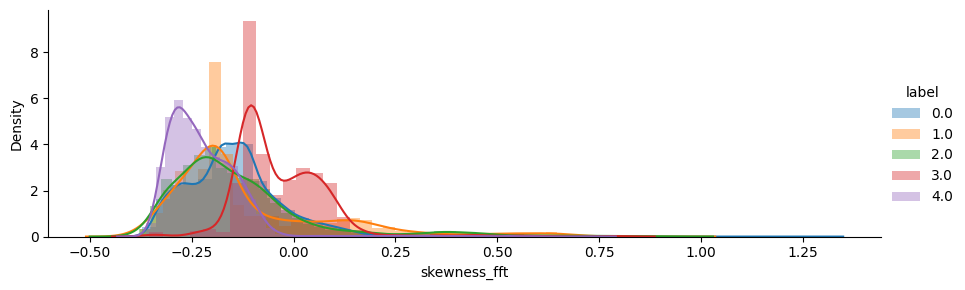

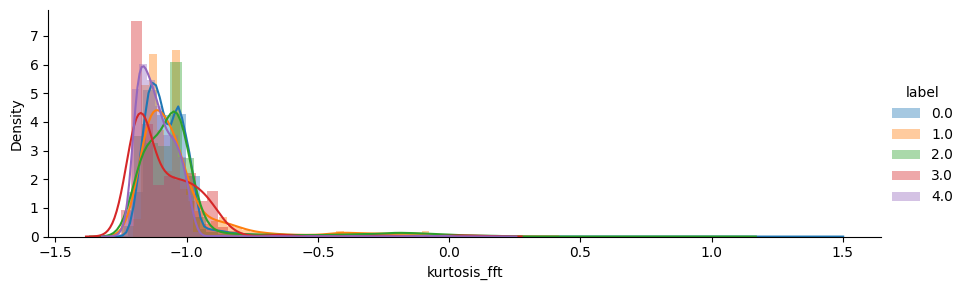

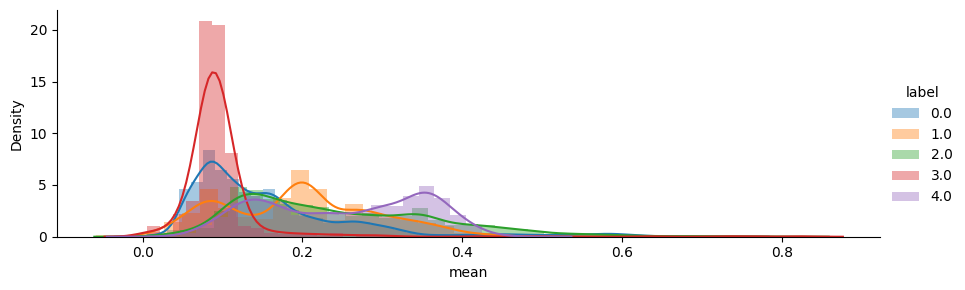

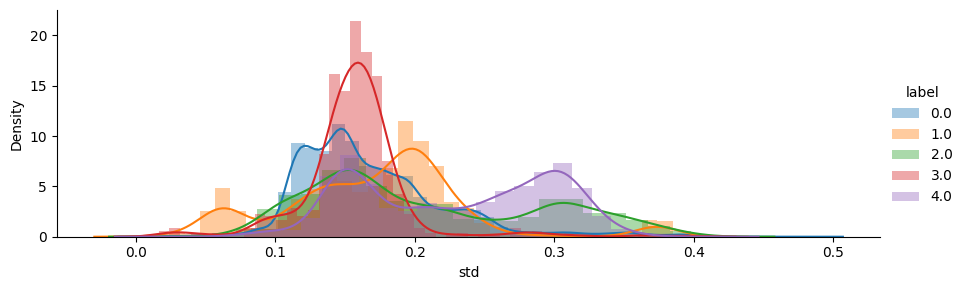

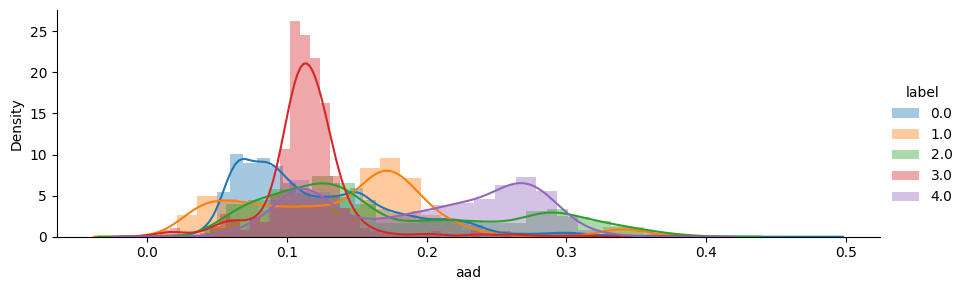

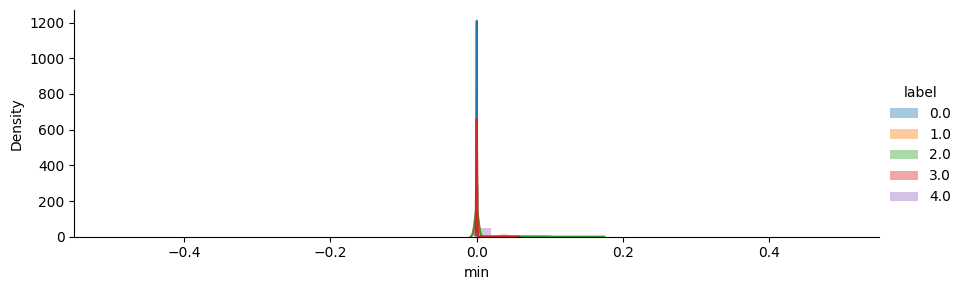

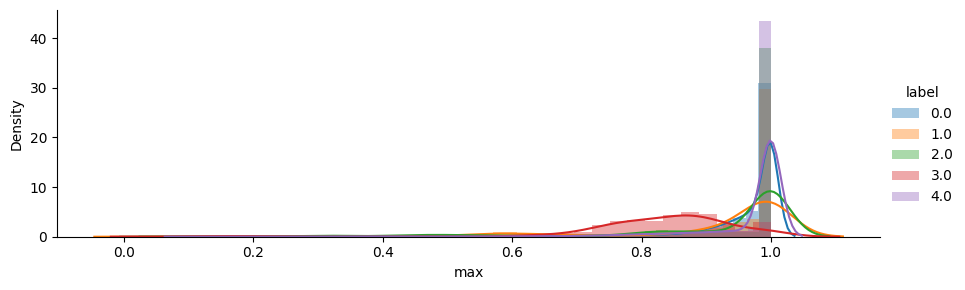

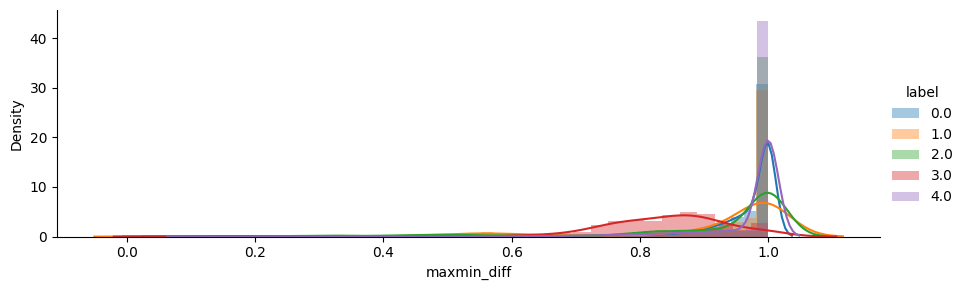

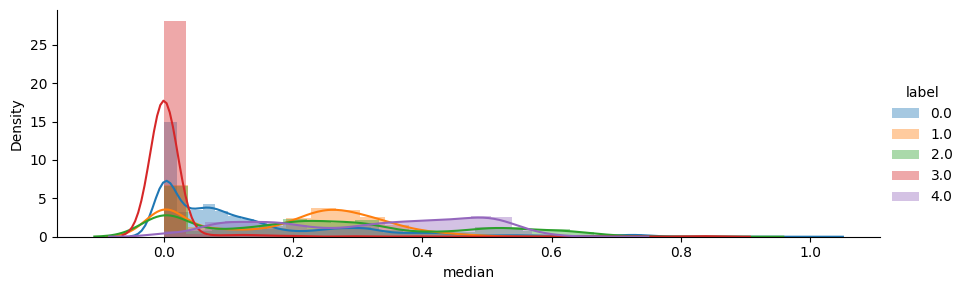

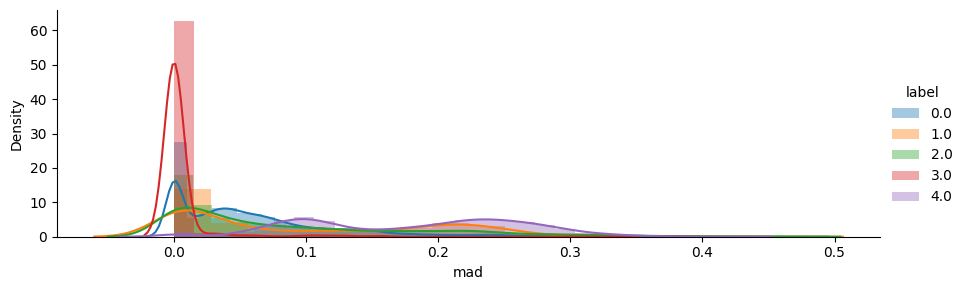

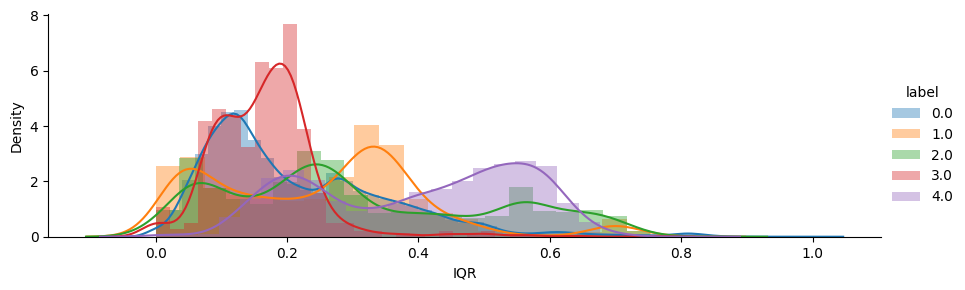

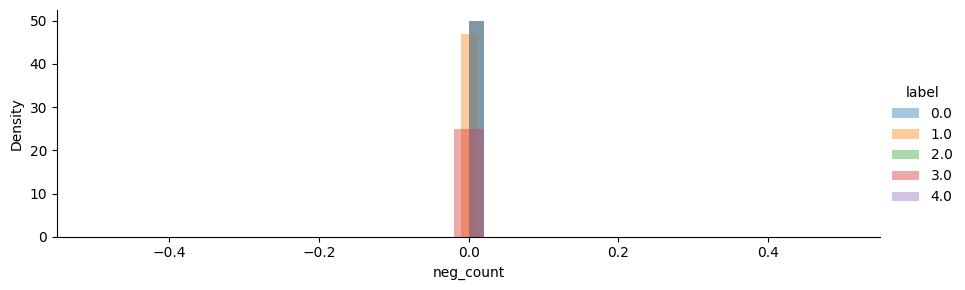

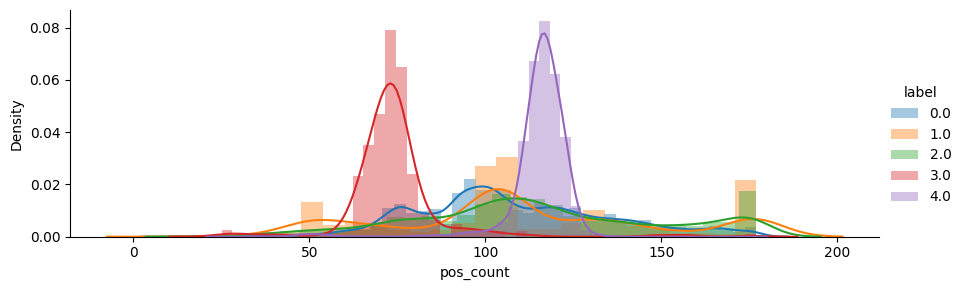

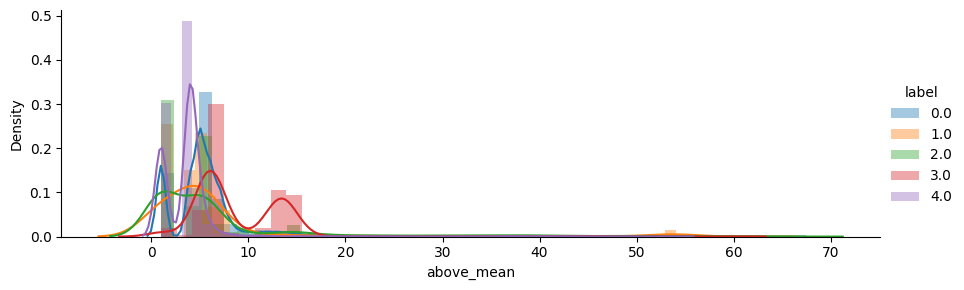

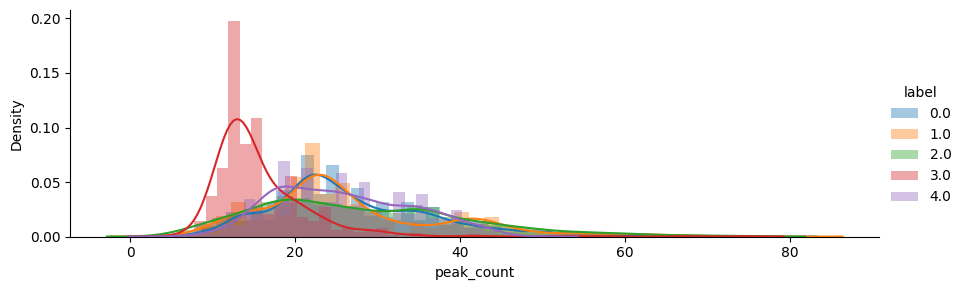

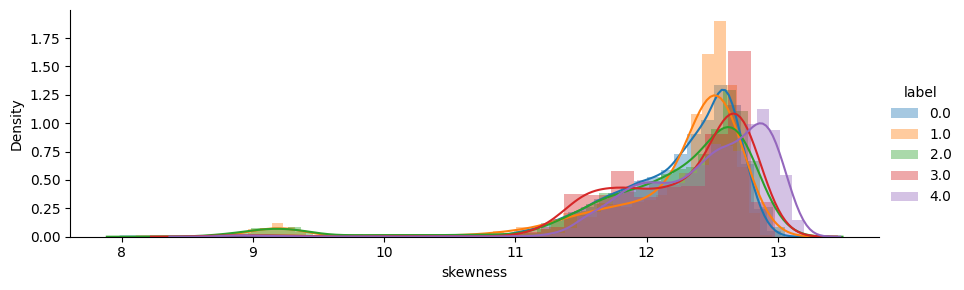

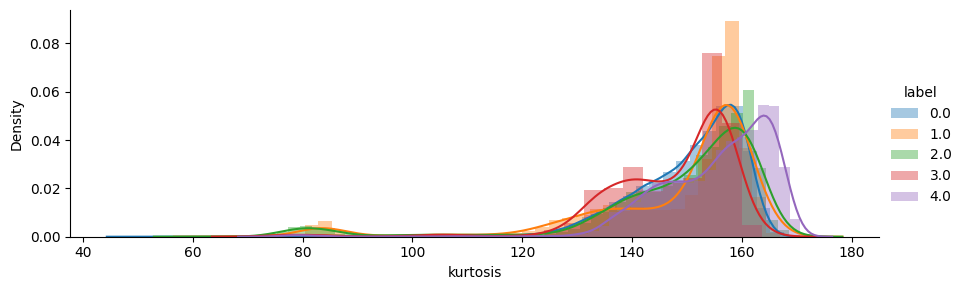

In [ ]:
data = X_mb_train
data['label'] = y_mb_train

# Define the new list of features
columns_features = ["mean_fft", "std_fft", "aad_fft", "min_fft", "max_fft", "maxmin_diff_fft", "median_fft", "mad_fft", "IQR_fft", "above_mean_fft", "peak_count_fft", "skewness_fft", "kurtosis_fft",
                    "mean", "std", "aad", "min", "max", "maxmin_diff", "median", "mad", "IQR", "neg_count", "pos_count", "above_mean", "peak_count", "skewness","kurtosis"];


for feature_to_verify in columns_features:
  # Apply a lambda function to obtain means of each feature's dimension and label
  means = data.apply(lambda x: pd.Series([x[feature_to_verify],
                                            x["label"]], index=[feature_to_verify, "label"]), axis=1)
  # Reset index and drop original index
  means = means.reset_index()
  means = means.drop(['index'], axis=1)

  # Plot distribution plots of means for each dimension of the feature
  g = sns.FacetGrid(means, hue="label", aspect=3).map(sns.distplot, feature_to_verify).add_legend()

In [ ]:
columns_features = ["mean_fft", "std_fft", "aad_fft", "min_fft", "max_fft", "maxmin_diff_fft", "median_fft", "mad_fft", "IQR_fft", "above_mean_fft", "peak_count_fft", "skewness_fft", "kurtosis_fft",
                    "mean", "std", "aad", "min", "max", "maxmin_diff", "median", "mad", "IQR", "neg_count", "pos_count", "above_mean", "peak_count", "skewness","kurtosis"];

X_mb_train[columns_features] = MinMaxScaler().fit_transform(X_mb_train[columns_features])
X_mb_test[columns_features] = MinMaxScaler().fit_transform(X_mb_test[columns_features])

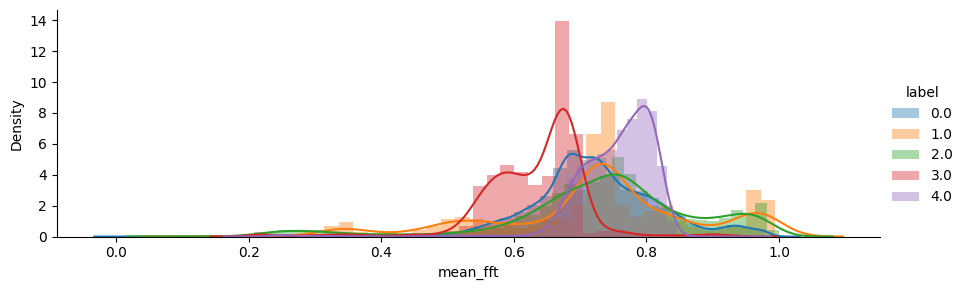

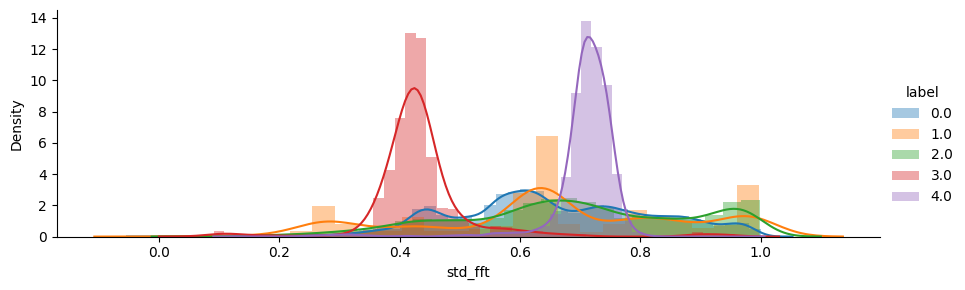

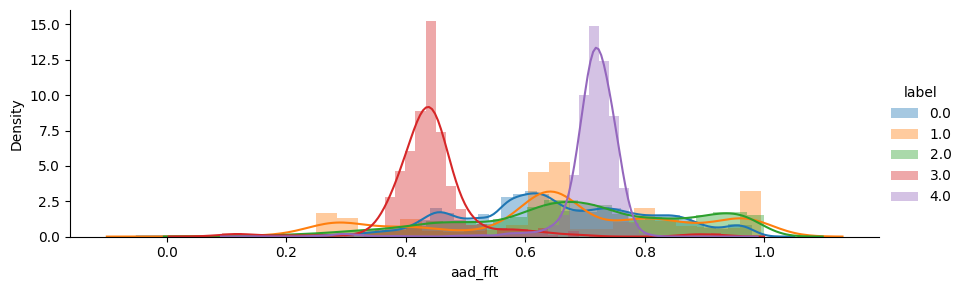

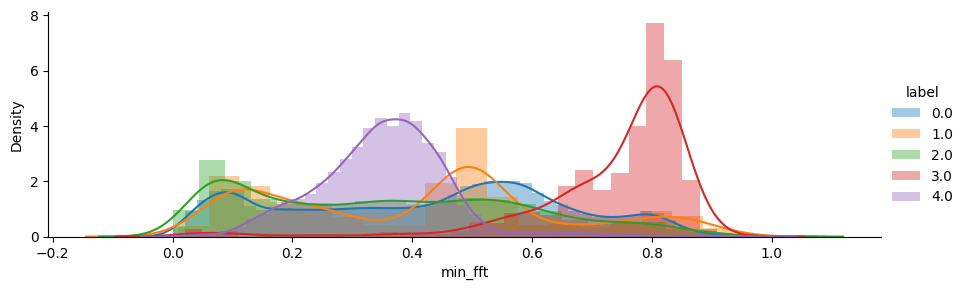

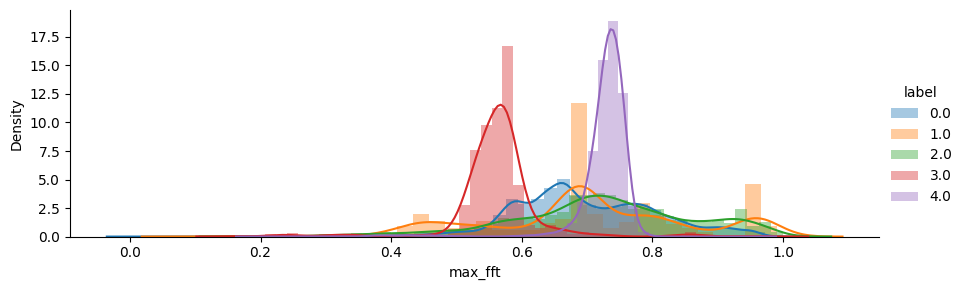

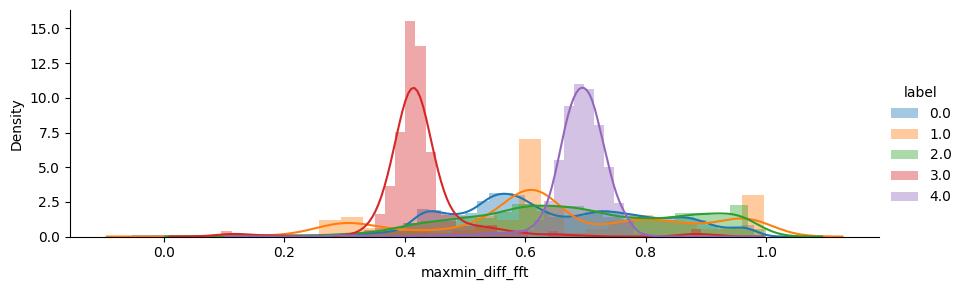

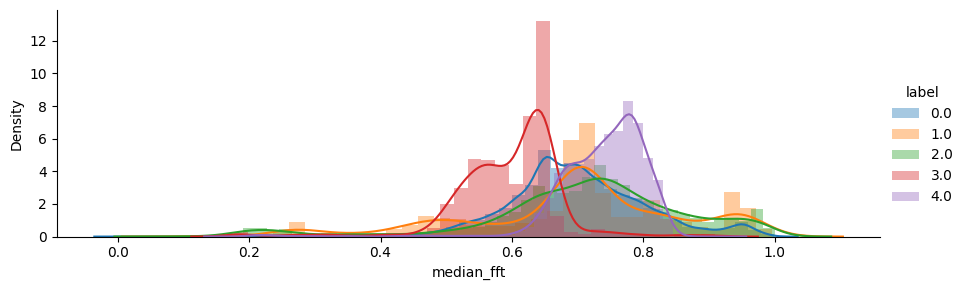

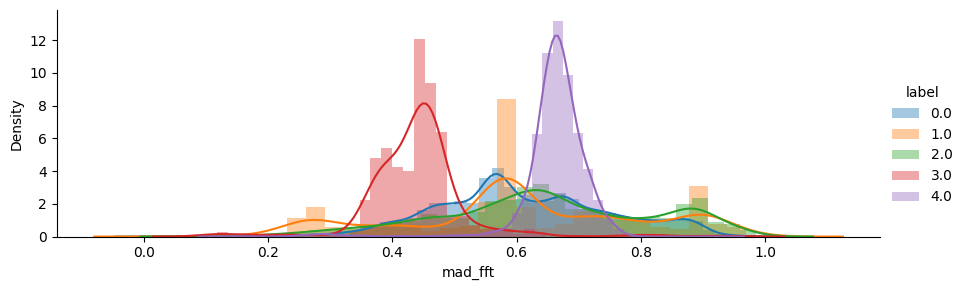

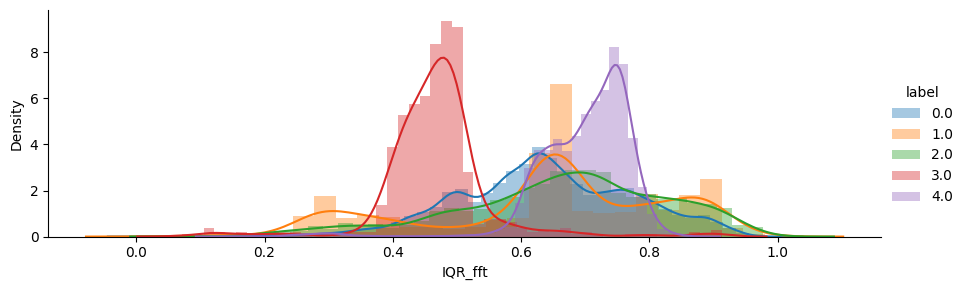

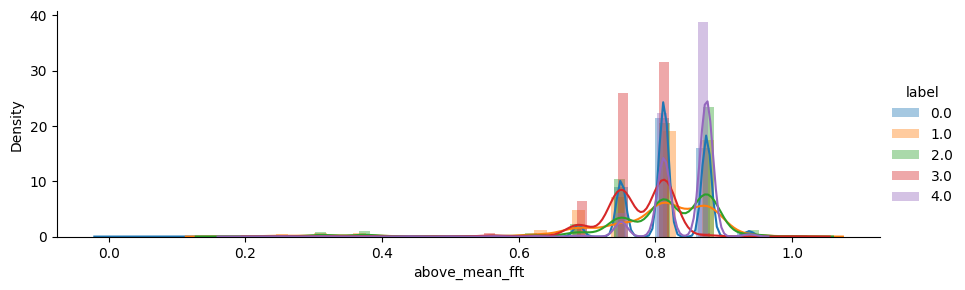

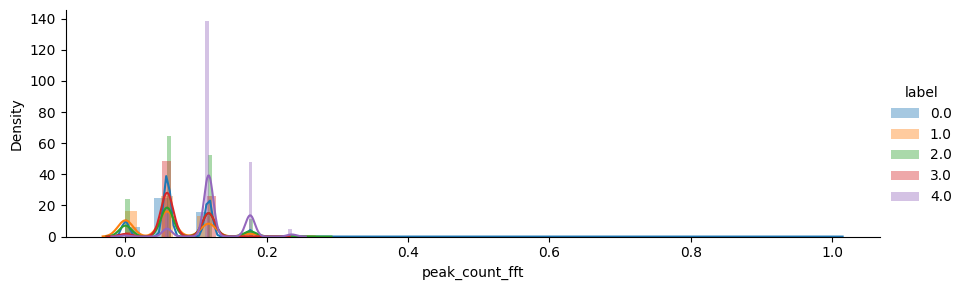

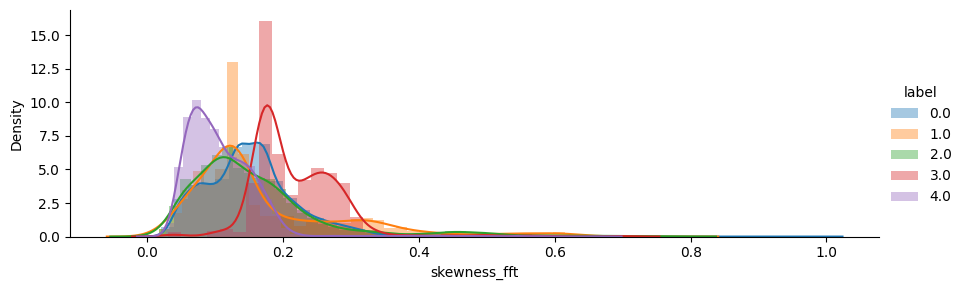

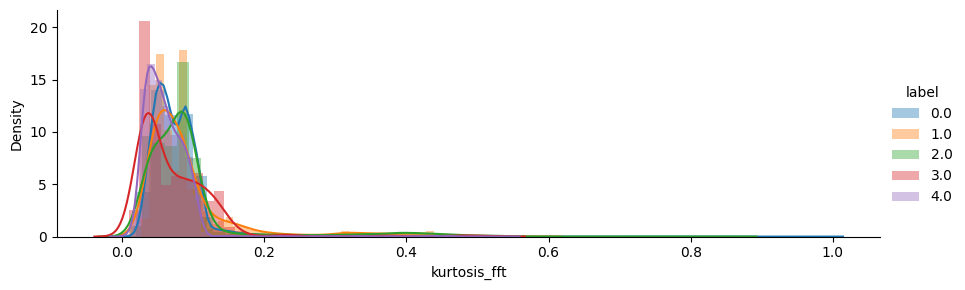

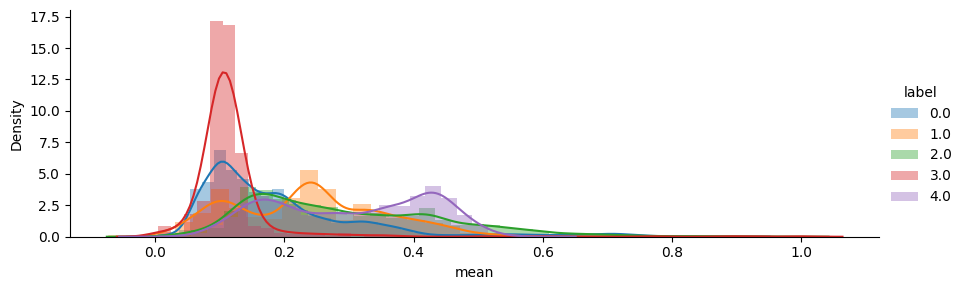

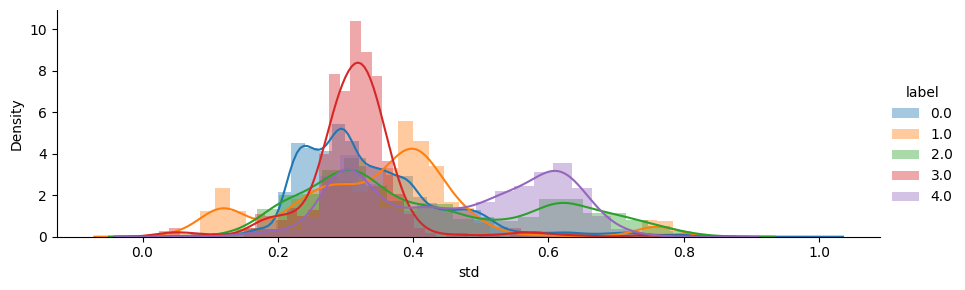

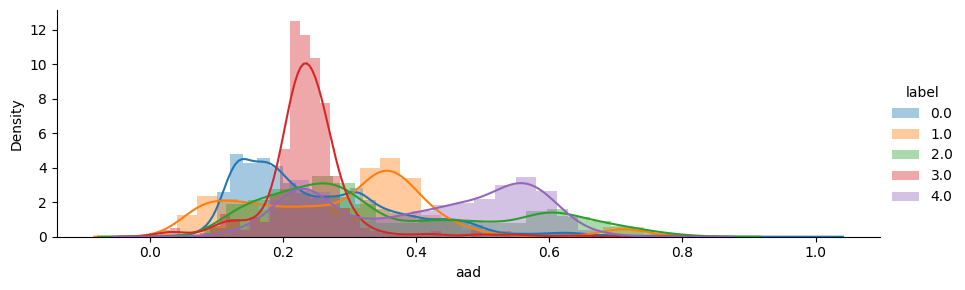

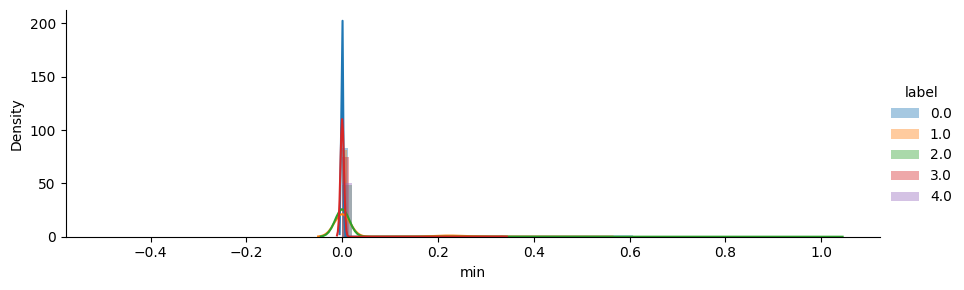

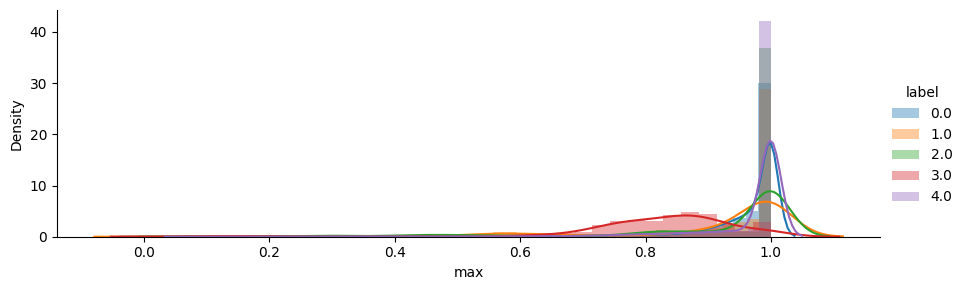

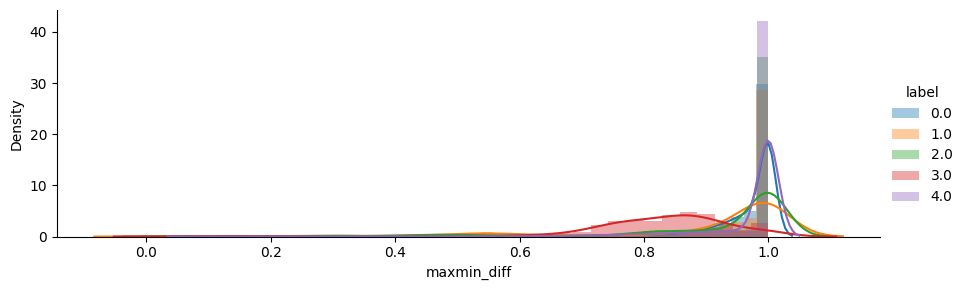

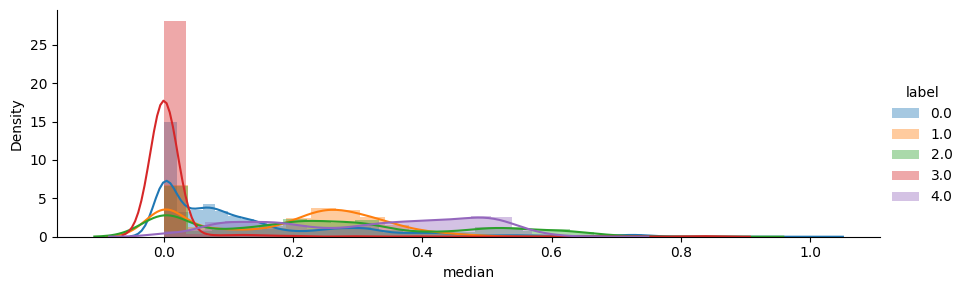

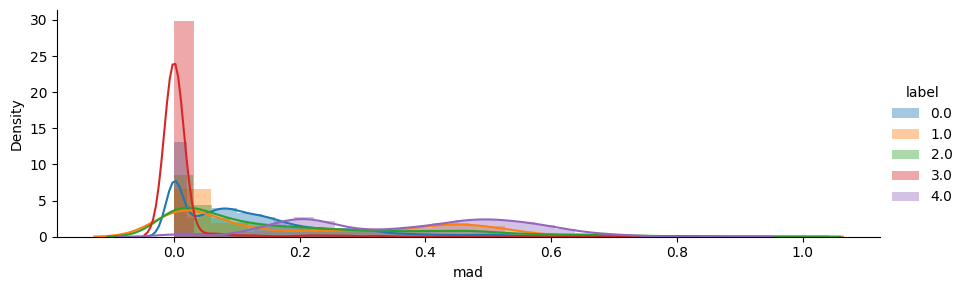

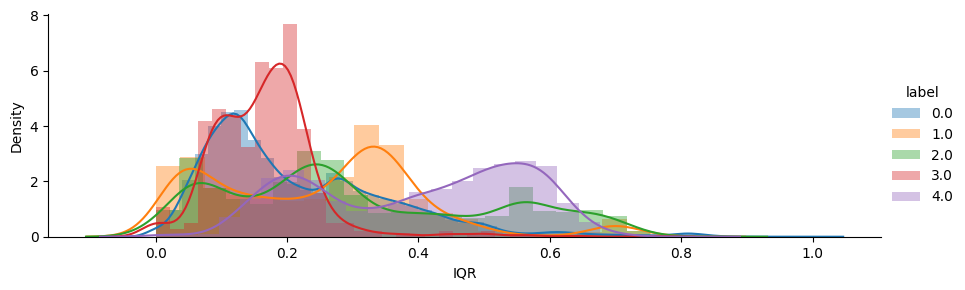

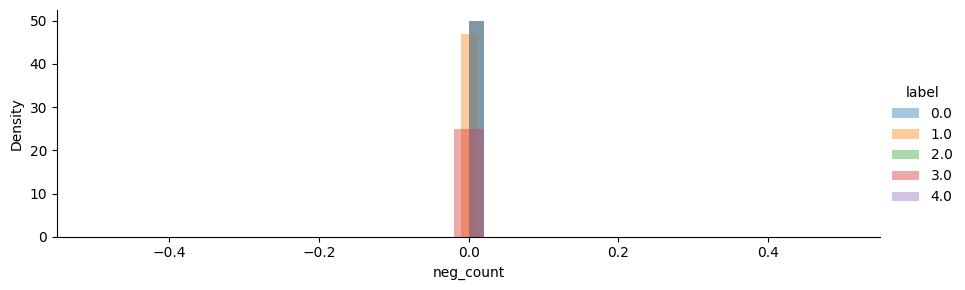

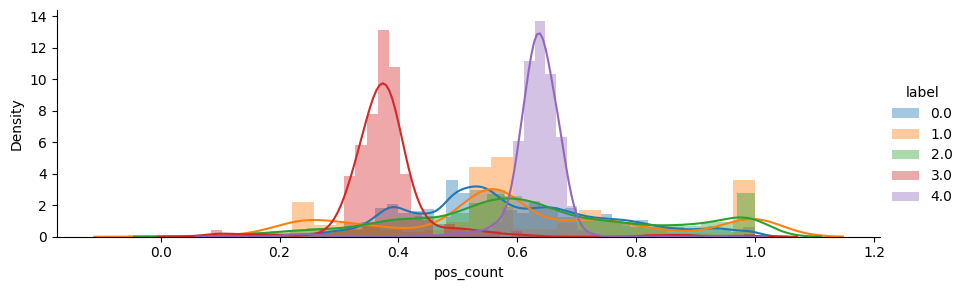

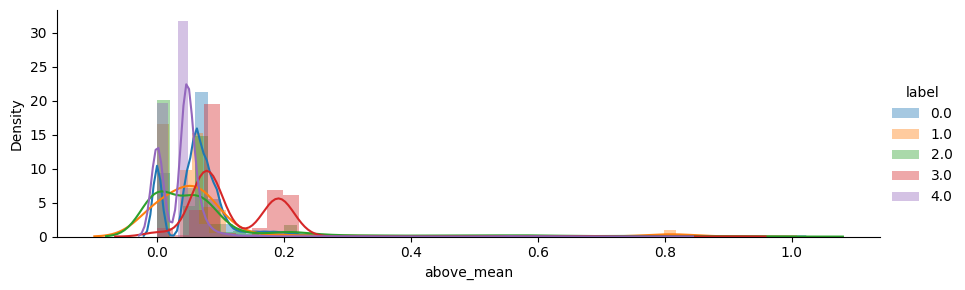

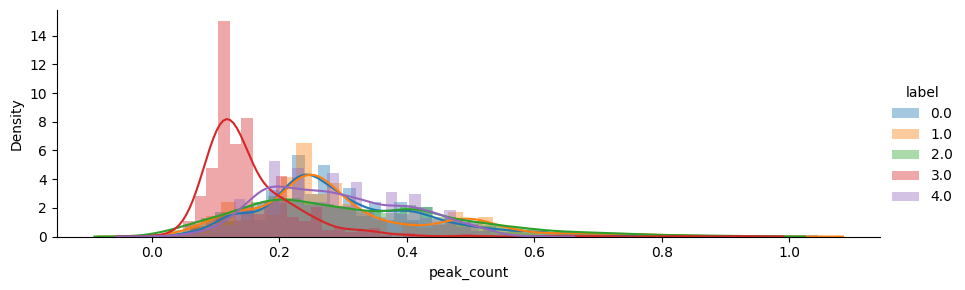

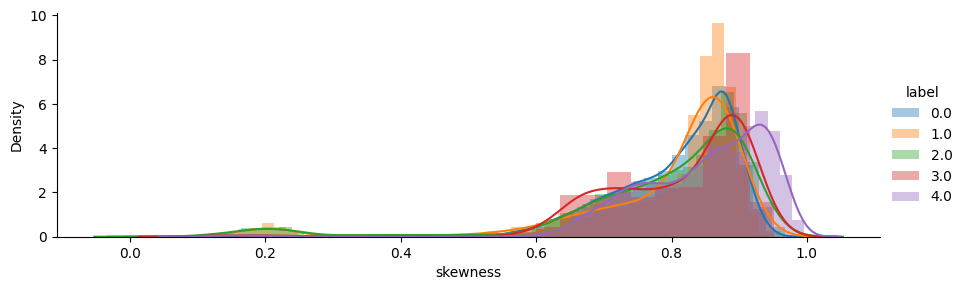

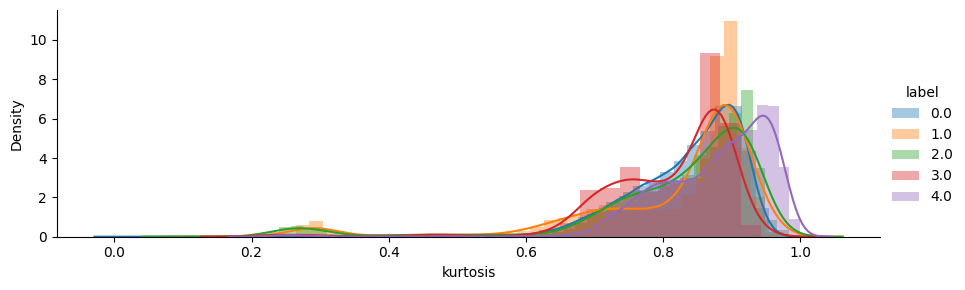

In [ ]:
data = X_mb_train
data['label'] = y_mb_train

# Define the new list of features
columns_features = ["mean_fft", "std_fft", "aad_fft", "min_fft", "max_fft", "maxmin_diff_fft", "median_fft", "mad_fft", "IQR_fft", "above_mean_fft", "peak_count_fft", "skewness_fft", "kurtosis_fft",
                    "mean", "std", "aad", "min", "max", "maxmin_diff", "median", "mad", "IQR", "neg_count", "pos_count", "above_mean", "peak_count", "skewness","kurtosis"];


for feature_to_verify in columns_features:
  # Apply a lambda function to obtain means of each feature's dimension and label
  means = data.apply(lambda x: pd.Series([x[feature_to_verify],
                                            x["label"]], index=[feature_to_verify, "label"]), axis=1)
  # Reset index and drop original index
  means = means.reset_index()
  means = means.drop(['index'], axis=1)

  # Plot distribution plots of means for each dimension of the feature
  g = sns.FacetGrid(means, hue="label", aspect=3).map(sns.distplot, feature_to_verify).add_legend()

#### Variance Threshold 

In [ ]:
# Define a function to select features with a variance threshold

def variance_threshold_selector(data, threshold=0.04):
    # Instantiate a VarianceThreshold object with the given threshold
    selector = VarianceThreshold(threshold)

    # Fit the selector on the data to identify the features with low variance
    selector.fit(data)
    
    # Print the selected features identified by the selector
    print(selector.get_support())

    # Return a list of features with variance lower than the given threshold
    return [column for column in data.columns 
          if column not in data.columns[selector.get_support()]]

In [ ]:
# List of features to consider
columns_features = ["mean_fft", "std_fft", "aad_fft", "min_fft", "max_fft", "maxmin_diff_fft", "median_fft", "mad_fft", "IQR_fft", "above_mean_fft", "peak_count_fft", "skewness_fft", "kurtosis_fft",
                    "mean", "std", "aad", "min", "max", "maxmin_diff", "median", "mad", "IQR", "neg_count", "pos_count", "above_mean", "peak_count", "skewness","kurtosis"];

# Selecting the prepared dataset with only the final columns
X_prepared = X_mb_train[columns_features]

# Printing the selected columns and their count
print(X_prepared.columns)
print(len(X_prepared.columns))

# Applying the variance threshold selector to remove low-variance features
X_train_still = variance_threshold_selector(X_prepared, threshold = 0.015)

# Dropping the low-variance features from the dataset
X_prepared = X_prepared.drop(X_train_still, axis = 1)
X_mb_test = X_mb_test.drop(X_train_still, axis = 1)

# Printing the final columns after applying variance threshold and their count
print(X_prepared.columns)
print(len(X_prepared.columns))

Index(['mean_fft', 'std_fft', 'aad_fft', 'min_fft', 'max_fft',
       'maxmin_diff_fft', 'median_fft', 'mad_fft', 'IQR_fft', 'above_mean_fft',
       'peak_count_fft', 'skewness_fft', 'kurtosis_fft', 'mean', 'std', 'aad',
       'min', 'max', 'maxmin_diff', 'median', 'mad', 'IQR', 'neg_count',
       'pos_count', 'above_mean', 'peak_count', 'skewness', 'kurtosis'],
      dtype='object')
28
[False  True  True  True False  True False  True  True False False False
 False  True  True  True False  True  True  True  True  True False  True
 False  True False False]
Index(['std_fft', 'aad_fft', 'min_fft', 'maxmin_diff_fft', 'mad_fft',
       'IQR_fft', 'mean', 'std', 'aad', 'max', 'maxmin_diff', 'median', 'mad',
       'IQR', 'pos_count', 'peak_count'],
      dtype='object')
16


In [ ]:
X_mb_train = X_mb_train.drop(X_train_still, axis = 1)

In [ ]:
X_mb_train

10        11        12        13        14        15        16  \
0      0.044118  0.061275  0.066176  0.061275  0.049020  0.073529  0.061275   
1      0.074074  0.062678  0.065527  0.065527  0.062678  0.076923  0.071225   
2      0.056757  0.043243  0.067568  0.062162  0.078378  0.072973  0.086486   
3      0.063536  0.082873  0.085635  0.093923  0.113260  0.124309  0.140884   
4      0.131455  0.122066  0.140845  0.159624  0.150235  0.145540  0.136150   
...         ...       ...       ...       ...       ...       ...       ...   
87549  0.052632  0.140351  0.119298  0.091228  0.140351  0.161404  0.105263   
87550  0.078333  0.183333  0.275000  0.315000  0.361667  0.430000  0.481667   
87551  0.097959  0.048980  0.036735  0.053061  0.053061  0.097959  0.183673   
87552  0.101266  0.101266  0.088608  0.081013  0.073418  0.065823  0.065823   
87553  0.370800  0.287370  0.236385  0.324450  0.403244  0.409038  0.407880   

             17        18        19  ...       mad       IQR  pos_count  \
0      0.061275  0.066176  0.068627  ...  0.139088  0.125613   0.518072   
1      0.082621  0.091168  0.096866  ...  0.092813  0.086182   0.734940   
2      0.081081  0.108108  0.110811  ...  0.019882  0.062838   0.487952   
3      0.132597  0.140884  0.091160  ...  0.011612  0.110497   0.487952   
4      0.169014  0.178404  0.173709  ...  0.123343  0.132629   0.746988   
...         ...       ...       ...  ...       ...       ...        ...   
87549  0.143860  0.143860  0.129825  ...  0.272861  0.235088   0.602410   
87550  0.526667  0.543333  0.563333  ...  0.497419  0.520417   0.656627   
87551  0.269388  0.351020  0.408163  ...  0.446090  0.551020   0.662651   
87552  0.053165  0.048101  0.037975  ...  0.127702  0.129114   0.662651   
87553  0.390498  0.390498  0.419467  ...  0.546752  0.566918   0.632530   

       peak_count   std_fft   aad_fft   min_fft  maxmin_diff_fft   mad_fft  \
0        0.328947  0.602654  0.601670  0.463700         0.583153  0.565251   
1        0.342105  0.814716  0.811895  0.201404         0.798252  0.723103   
2        0.342105  0.573255  0.570683  0.466852         0.561838  0.539828   
3        0.184211  0.554711  0.565760  0.643843         0.522741  0.528158   
4        0.381579  0.828304  0.821667  0.176938         0.819423  0.719988   
...           ...       ...       ...       ...              ...       ...   
87549    0.328947  0.686024  0.686851  0.364412         0.670948  0.632906   
87550    0.171053  0.725782  0.739228  0.397788         0.689056  0.674104   
87551    0.197368  0.732627  0.744602  0.372236         0.691206  0.668991   
87552    0.223684  0.739286  0.746408  0.384535         0.715848  0.661872   
87553    0.236842  0.707124  0.715176  0.403820         0.687532  0.646193   

        IQR_fft  
0      0.575749  
1      0.783329  
2      0.537597  
3      0.598679  
4      0.780616  
...         ...  
87549  0.671190  
87550  0.764308  
87551  0.763354  
87552  0.760024  
87553  0.718818  

[87554 rows x 184 columns]

In [ ]:
# Sort columns in ascending order

X_mb_train.columns = X_mb_train.columns.astype(str)
X_mb_test.columns = X_mb_test.columns.astype(str)

X_mb_train = X_mb_train.reindex(sorted(X_mb_train.columns), axis=1)
X_mb_test = X_mb_test.reindex(sorted(X_mb_test.columns), axis=1)

X_mb_train

10       100       101       102       103       104       105  \
0      0.044118  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.074074  0.002849  0.019943  0.025641  0.011396  0.028490  0.019943   
2      0.056757  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.063536  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.131455  0.098592  0.112676  0.107981  0.093897  0.103286  0.107981   
...         ...       ...       ...       ...       ...       ...       ...   
87549  0.052632  0.536842  0.442105  0.315789  0.185965  0.000000  0.066667   
87550  0.078333  0.840000  0.760000  0.665000  0.560000  0.465000  0.356667   
87551  0.097959  0.465306  0.506122  0.910204  1.000000  0.640816  0.612245   
87552  0.101266  0.435443  0.878481  1.000000  0.924051  0.594937  0.356962   
87553  0.370800  0.862109  0.793743  0.724218  0.624565  0.519119  0.389340   

            106       107       108  ...       max  maxmin_diff  \
0      0.000000  0.000000  0.000000  ...  1.000000     1.000000   
1      0.022792  0.034188  0.014245  ...  1.000000     1.000000   
2      0.000000  0.000000  0.000000  ...  0.963750     0.963750   
3      0.000000  0.000000  0.000000  ...  1.000000     1.000000   
4      0.075117  0.042254  0.046948  ...  0.951563     0.951563   
...         ...       ...       ...  ...       ...          ...   
87549  0.112281  0.129825  0.164912  ...  1.000000     1.000000   
87550  0.233333  0.140000  0.078333  ...  1.000000     1.000000   
87551  0.575510  0.551020  0.497959  ...  1.000000     1.000000   
87552  0.167089  0.124051  0.129114  ...  1.000000     1.000000   
87553  0.264195  0.171495  0.146002  ...  1.000000     1.000000   

       maxmin_diff_fft      mean    median   min_fft  peak_count  pos_count  \
0             0.583153  0.106313  0.066176  0.463700    0.328947   0.518072   
1             0.798252  0.098381  0.055556  0.201404    0.342105   0.734940   
2             0.561838  0.066401  0.009459  0.466852    0.342105   0.487952   
3             0.522741  0.091131  0.005525  0.643843    0.184211   0.487952   
4             0.819423  0.123848  0.058685  0.176938    0.381579   0.746988   
...                ...       ...       ...       ...         ...        ...   
87549         0.670948  0.179512  0.154386  0.364412    0.328947   0.602410   
87550         0.689056  0.420393  0.471667  0.397788    0.171053   0.656627   
87551         0.691206  0.390540  0.436735  0.372236    0.197368   0.662651   
87552         0.715848  0.112057  0.083544  0.384535    0.223684   0.662651   
87553         0.687532  0.421452  0.431634  0.403820    0.236842   0.632530   

            std   std_fft  
0      0.302695  0.602654  
1      0.274095  0.814716  
2      0.231973  0.573255  
3      0.286086  0.554711  
4      0.309066  0.828304  
...         ...       ...  
87549  0.305969  0.686024  
87550  0.592421  0.725782  
87551  0.553939  0.732627  
87552  0.279940  0.739286  
87553  0.595483  0.707124  

[87554 rows x 184 columns]

In [ ]:
# create the imputer object with the mean strategy
imputer = SimpleImputer(strategy='mean')

# impute the missing values in X_train
X_mb_train = imputer.fit_transform(X_mb_train)

# impute the missing values in X_test
X_mb_test = imputer.transform(X_mb_test)

In [ ]:
X_mb_test

array([[0.03099173, 0.01239669, 0.18801653, ..., 0.68361582, 0.25417734,
        0.75518184],
       [0.30402932, 0.        , 0.        , ..., 0.5480226 , 0.51324212,
        0.5927147 ],
       [0.10619469, 0.2079646 , 0.21681416, ..., 0.60451977, 0.29781704,
        0.67676411],
       ...,
       [0.10385757, 0.27893174, 0.33531156, ..., 0.66666667, 0.25151766,
        0.74349882],
       [0.06349207, 0.76190478, 0.58730161, ..., 0.66101695, 0.37461074,
        0.74234508],
       [0.22885032, 0.78091109, 1.        , ..., 0.67231638, 0.54971443,
        0.72792169]])

In [ ]:
print(len(y_mb_train))
y_mb_train

87554


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64

In [ ]:
print(len(y_mb_test))
y_mb_test

21892


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: 187, Length: 21892, dtype: float64

### **Algoritmi propuși și evaluarea acestora [2p]**

Pentru analiza celor două seturi de date veți folosi următorii algoritmi:

● RandomForest - folosiți implementarea din scikit-learn [0.5p]

● GradientBoosted Trees - folosiți implementarea din biblioteca xgboost [0.75p]

● SVM - folosiți implementarea din scikit-learn [0.75p]

Folosiți înțelegerea datelor câștigată la pasul 3.1 pentru a determina dacă este necesară
standardizarea datelor. Acest pas este unul des întâlnit etapă de pre-procesare a datelor
înainte de antrenarea unui clasificator, în vederea uniformizării valorilor numerice aferente
fiecărui tip de atribut (e.g. nu este dorit ca unele atribute sa aibă valori de ordinul miilor, iar
altele de ordinul unităților).

Partea de extragere a atributelor propusă în secțiunea 3.2.2 poate duce la un număr mare
de atribute extrase. Frecvent se întâmplă ca nu toate atributele să aibă o contribuție
importantă în cadrul predicției.
Ca atare, investigați aplicarea tehnicilor de selectare a atributelor (eng. Feature selection)
oferite în scikit-learn. Folosiți cel puțin una din metodele Variance Threshold sau Select
Percentile.

Fiecare algoritm din cei propuși are o serie de hiper-parametrii care influențează
funcționarea acestuia. Pentru a găsi valorile potrivite pentru aceștia veți folosi o procedură
de căutare a hiper-parametrilor pe bază de Grid Search cu Cross Validation.
Setul minim de hiper-parametrii de căutat este:

● SVM: tipul de kernel, parametru C de regularizare

● RandomForest: numărul de arbori, adâncimea maximă a unui arbore, procentul din
input folosit la antrenarea fiecărui arbore

● GradientBoostedTrees: numărul de arbori, adâncimea maximă a unui arbore,
learning rate



# **Evaluarea algoritmilor**
În raportul vostru trebuie sa prezentați următoarele:

● Rezultatul procedurii de feature selection: numărul total de feature-uri considerate și
numărul total de feature-uri utilizate la antrenare (ca urmare a procedurii de feature
selection)

● Pentru fiecare algoritm, realizați un tabel în care să prezentați media si varianța
pentru acuratețea generală de clasificare, precizie / recall / F1 la nivelul fiecărei
clase în parte

○ Pe linii va fi indexată configurația de hiper-parametrii rezultată din procedura
de GridSearch.

○ Pe coloane vor fi prezentate metricile cerute

○ Relevați prin bolduire valorile maxime pentru fiecare metrică

● Pentru cea mai bună variantă a hiper-parametrilor, pentru fiecare algoritm,
realizați o matrice de confuzie peste clase.

#### Create Models

In [ ]:
# Create RandomForest Model
random_forest = RandomForestClassifier(n_estimators = 100, max_depth = 10)

# Create XGB Model
gradient_boosted_trees = XGBClassifier(booster='gbtree', n_estimators=100, eta=0.3, max_depth=6, gamma = 0, reg_lambda = 1)

# Create SVM_rbf Model
svm_rbf = SVC(kernel = 'rbf')

# Creaate SVM_linear Model
smv_linear = SVC(kernel ='linear', C = 1)

In [ ]:
# Fit RandomForest Model
random_forest.fit(X_mb_train, y_mb_train)

# Fit XGB Model
gradient_boosted_trees.fit(X_mb_train, y_mb_train)

# Fit SVM_rbf Model
svm_rbf.fit(X_mb_train, y_mb_train)

# Fit SVM_linear Model
smv_linear.fit(X_mb_train, y_mb_train)

print("Training finished.")

Training finished.


In [ ]:
# Calculate errors
random_forest_error = 1 - accuracy_score(y_mb_test, random_forest.predict(X_mb_test))
gradient_boosted_trees_error = 1 - accuracy_score(y_mb_test, gradient_boosted_trees.predict(X_mb_test))
svm_rbf_error = 1 - accuracy_score(y_mb_test, svm_rbf.predict(X_mb_test))
smv_linear_error = 1 - accuracy_score(y_mb_test, smv_linear.predict(X_mb_test))

# Calculate accuracy
random_forest_accuracy = 1 - random_forest_error
gradient_boosted_trees_accuracy = 1 - gradient_boosted_trees_error
svm_rbf_accuracy = 1 - svm_rbf_error
smv_linear_accuracy = 1 - smv_linear_error

# Calculate the classification report
random_forest_report = classification_report(y_mb_test, random_forest.predict(X_mb_test), output_dict=True)
gradient_boosted_trees_report = classification_report(y_mb_test, gradient_boosted_trees.predict(X_mb_test), output_dict=True)
svm_rbf_report = classification_report(y_mb_test, svm_rbf.predict(X_mb_test), output_dict=True)
smv_linear_report = classification_report(y_mb_test, smv_linear.predict(X_mb_test), output_dict=True)

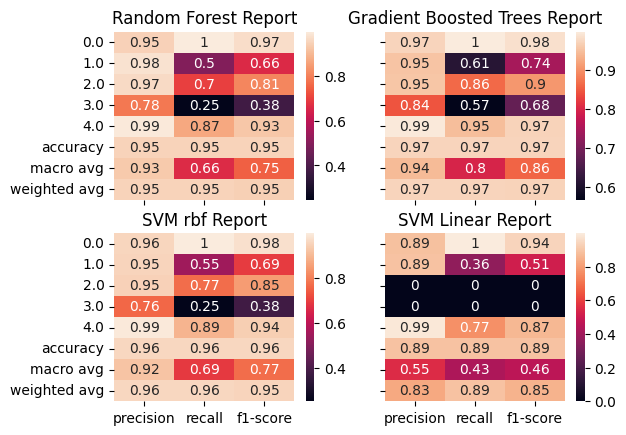

In [ ]:
# Create a figure and four subplots arranged in a 2x2 grid with shared x and y axes
figure, axes = plt.subplots(2, 2, sharex = True, sharey = True)

sns.heatmap(pd.DataFrame(random_forest_report).iloc[:-1, :].T, annot=True, ax = axes[0][0])
axes[0][0].set_title('Random Forest Report')

sns.heatmap(pd.DataFrame(gradient_boosted_trees_report).iloc[:-1, :].T, annot=True, ax = axes[0][1])
axes[0][1].set_title('Gradient Boosted Trees Report')

sns.heatmap(pd.DataFrame(svm_rbf_report).iloc[:-1, :].T, annot=True, ax = axes[1][0])
axes[1][0].set_title('SVM rbf Report')

sns.heatmap(pd.DataFrame(smv_linear_report).iloc[:-1, :].T, annot=True, ax = axes[1][1])
axes[1][1].set_title('SVM Linear Report')
plt.show()

#### Try new models

##### Random Forest Models

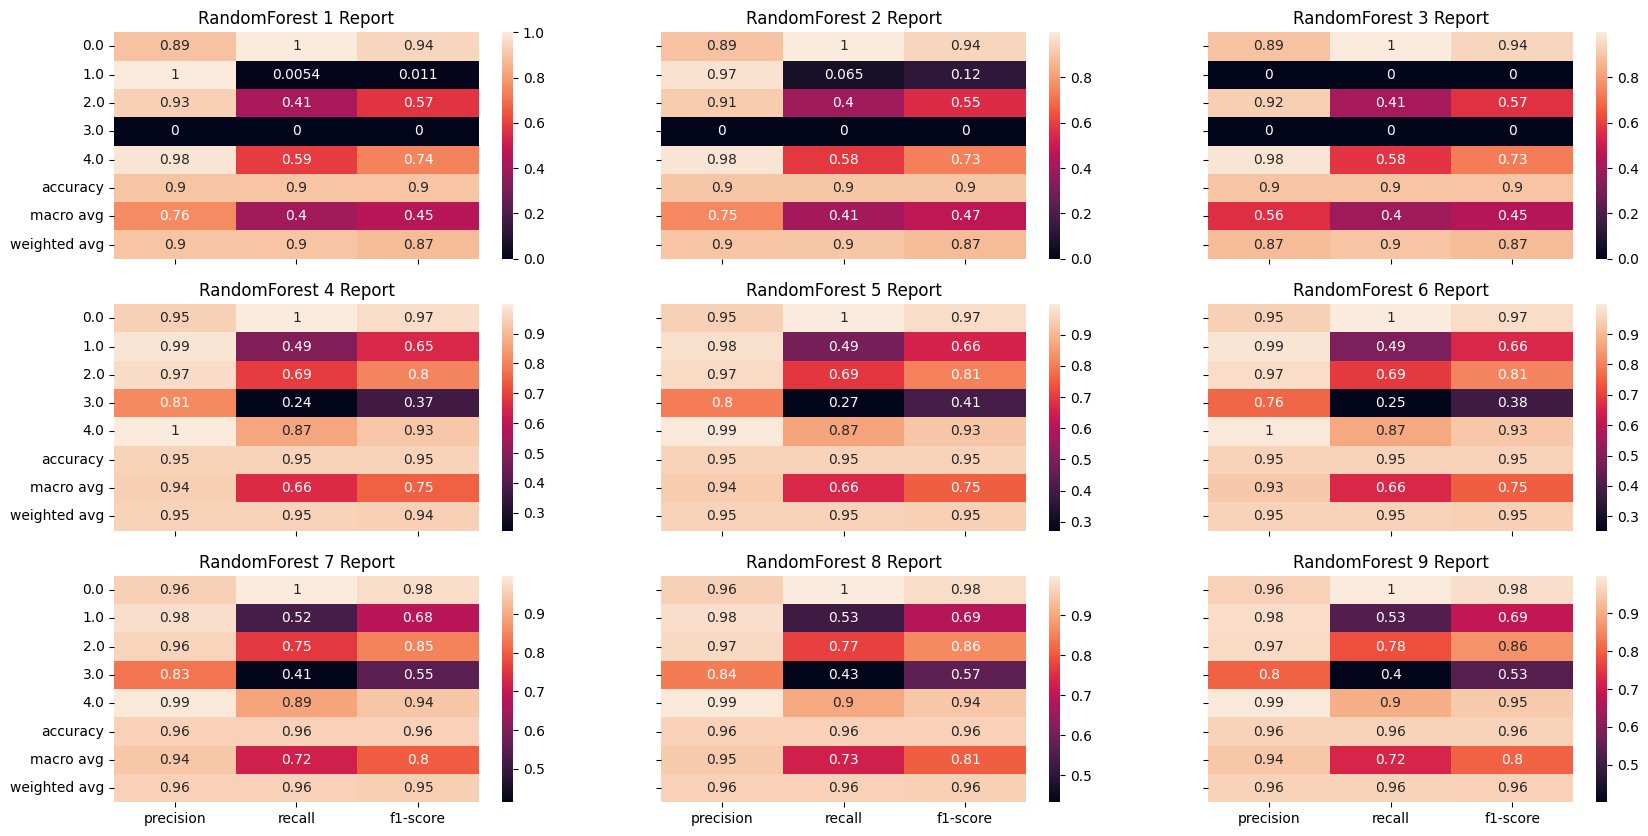

In [ ]:
# Define several instances of Random Forest classifier with different hyperparameters

random_forest_1 = RandomForestClassifier(n_estimators = 60, max_depth = 5, max_samples = 0.3)
random_forest_2 = RandomForestClassifier(n_estimators = 60, max_depth = 5, max_samples = 0.6)
random_forest_3 = RandomForestClassifier(n_estimators = 60, max_depth = 5, max_samples = 0.9)

random_forest_4 = RandomForestClassifier(n_estimators = 120, max_depth = 10, max_samples = 0.3)
random_forest_5 = RandomForestClassifier(n_estimators = 120, max_depth = 10, max_samples = 0.6)
random_forest_6 = RandomForestClassifier(n_estimators = 120, max_depth = 10, max_samples = 0.9)

random_forest_7 = RandomForestClassifier(n_estimators = 80, max_depth = 15, max_samples = 0.3)
random_forest_8 = RandomForestClassifier(n_estimators = 80, max_depth = 15, max_samples = 0.6)
random_forest_9 = RandomForestClassifier(n_estimators = 80, max_depth = 15, max_samples = 0.9)

# Train each instance on the training data

random_forest_1.fit(X_mb_train, y_mb_train)
random_forest_2.fit(X_mb_train, y_mb_train)
random_forest_3.fit(X_mb_train, y_mb_train)
random_forest_4.fit(X_mb_train, y_mb_train)
random_forest_5.fit(X_mb_train, y_mb_train)
random_forest_6.fit(X_mb_train, y_mb_train)
random_forest_7.fit(X_mb_train, y_mb_train)
random_forest_8.fit(X_mb_train, y_mb_train)
random_forest_9.fit(X_mb_train, y_mb_train)

# Evaluate the performance of each instance on the test data using classification_report

random_forest_1_report = classification_report(y_mb_test, random_forest_1.predict(X_mb_test), output_dict=True)
random_forest_2_report = classification_report(y_mb_test, random_forest_2.predict(X_mb_test), output_dict=True)
random_forest_3_report = classification_report(y_mb_test, random_forest_3.predict(X_mb_test), output_dict=True)
random_forest_4_report = classification_report(y_mb_test, random_forest_4.predict(X_mb_test), output_dict=True)
random_forest_5_report = classification_report(y_mb_test, random_forest_5.predict(X_mb_test), output_dict=True)
random_forest_6_report = classification_report(y_mb_test, random_forest_6.predict(X_mb_test), output_dict=True)
random_forest_7_report = classification_report(y_mb_test, random_forest_7.predict(X_mb_test), output_dict=True)
random_forest_8_report = classification_report(y_mb_test, random_forest_8.predict(X_mb_test), output_dict=True)
random_forest_9_report = classification_report(y_mb_test, random_forest_9.predict(X_mb_test), output_dict=True)

# Create a 3x3 grid of subplots and plot the classification reports of the instances

figure, axes = plt.subplots(3, 3, sharex = True, sharey = True)
figure.set_figwidth(20)
figure.set_figheight(10)

report = random_forest_1_report;

# For each subplot, set the report variable to the corresponding instance's report and plot it using a heatmap
for i in range(0, 3):
  for j in range(0, 3):
    if (i) * 3 + (j + 1) == 1:
        report = random_forest_1_report
    elif (i) * 3 + (j + 1) == 2:
        report = random_forest_2_report
    elif (i) * 3 + (j + 1) == 3:
        report = random_forest_3_report
    elif (i) * 3 + (j + 1) == 4:
        report = random_forest_4_report
    elif (i) * 3 + (j + 1) == 5:
        report = random_forest_5_report    
    elif (i) * 3 + (j + 1) == 6:
        report = random_forest_6_report  
    elif (i) * 3 + (j + 1) == 7:
        report = random_forest_7_report  
    elif (i) * 3 + (j + 1) == 8:
        report = random_forest_8_report  
    elif (i) * 3 + (j + 1) == 9:
        report = random_forest_9_report  

    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, ax = axes[i][j])
    axes[i][j].set_title('RandomForest ' + str((i) * 3 + (j + 1)) + ' Report')
plt.show()

##### Gradient Boosted Trees Models

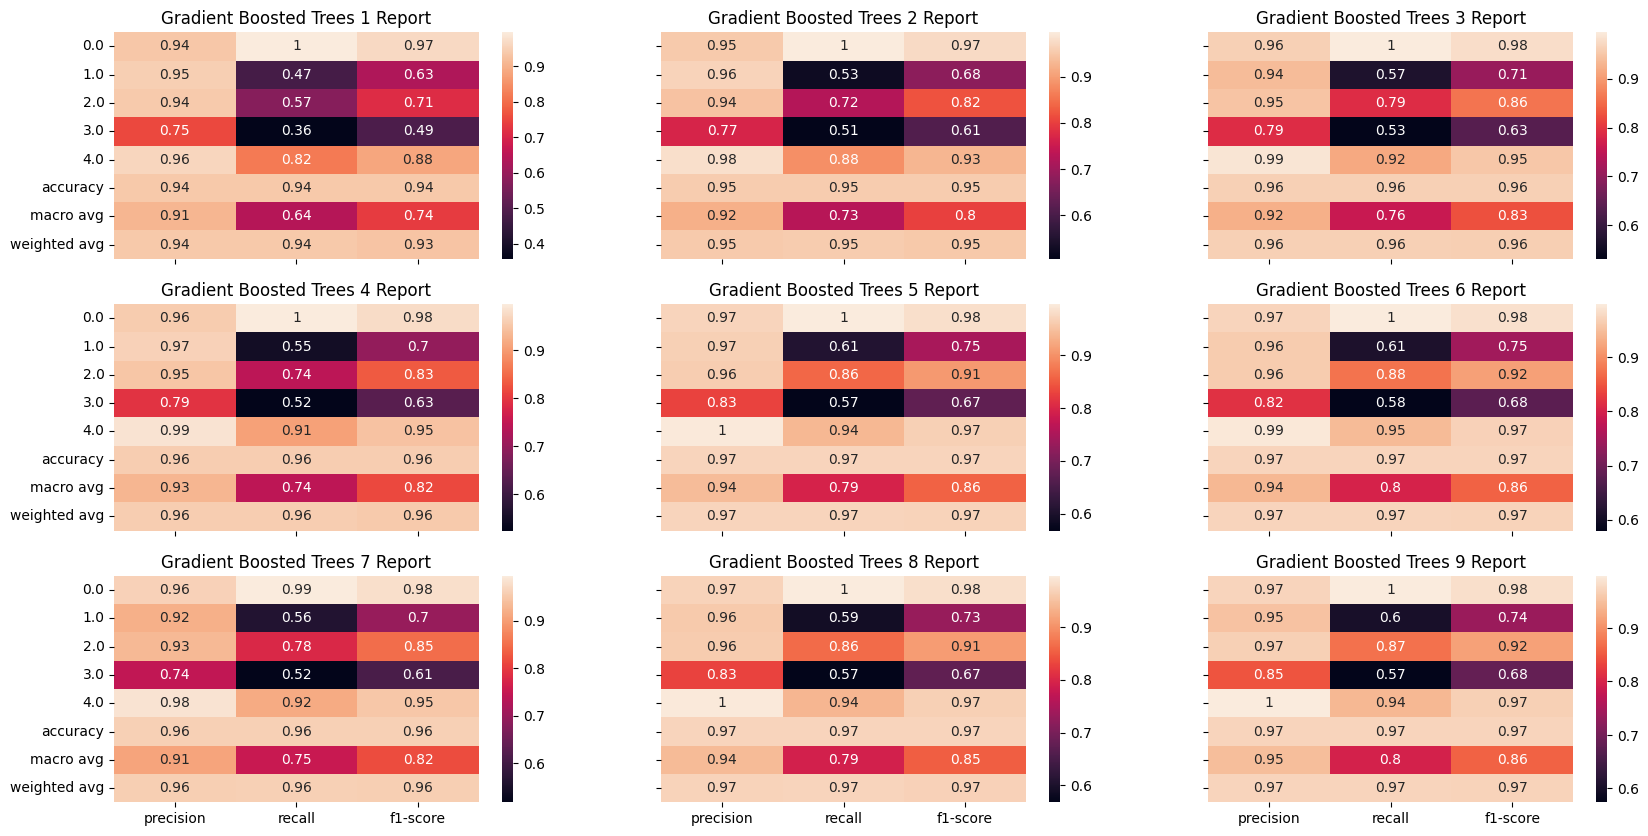

In [ ]:
# Define XGBClassifiers with different hyperparameters

gb_trees_1 = XGBClassifier(n_estimators = 60, max_depth = 5, learning_rate = 0.01)
gb_trees_2 = XGBClassifier(n_estimators = 60, max_depth = 5, learning_rate = 0.1)
gb_trees_3 = XGBClassifier(n_estimators = 60, max_depth = 5, learning_rate = 0.2)

gb_trees_4 = XGBClassifier(n_estimators = 120, max_depth = 10, learning_rate = 0.01)
gb_trees_5 = XGBClassifier(n_estimators = 120, max_depth = 10, learning_rate = 0.1)
gb_trees_6 = XGBClassifier(n_estimators = 120, max_depth = 10, learning_rate = 0.2)

gb_trees_7 = XGBClassifier(n_estimators = 80, max_depth = 15, learning_rate = 0.01)
gb_trees_8 = XGBClassifier(n_estimators = 80, max_depth = 15, learning_rate = 0.1)
gb_trees_9 = XGBClassifier(n_estimators = 80, max_depth = 15, learning_rate = 0.2)

# Fit the XGBClassifiers on the training data

gb_trees_1.fit(X_mb_train, y_mb_train)
gb_trees_2.fit(X_mb_train, y_mb_train)
gb_trees_3.fit(X_mb_train, y_mb_train)
gb_trees_4.fit(X_mb_train, y_mb_train)
gb_trees_5.fit(X_mb_train, y_mb_train)
gb_trees_6.fit(X_mb_train, y_mb_train)
gb_trees_7.fit(X_mb_train, y_mb_train)
gb_trees_8.fit(X_mb_train, y_mb_train)
gb_trees_9.fit(X_mb_train, y_mb_train)

# Generate classification reports for each XGBClassifier using the test data

gb_trees_1_report = classification_report(y_mb_test, gb_trees_1.predict(X_mb_test), output_dict=True)
gb_trees_2_report = classification_report(y_mb_test, gb_trees_2.predict(X_mb_test), output_dict=True)
gb_trees_3_report = classification_report(y_mb_test, gb_trees_3.predict(X_mb_test), output_dict=True)
gb_trees_4_report = classification_report(y_mb_test, gb_trees_4.predict(X_mb_test), output_dict=True)
gb_trees_5_report = classification_report(y_mb_test, gb_trees_5.predict(X_mb_test), output_dict=True)
gb_trees_6_report = classification_report(y_mb_test, gb_trees_6.predict(X_mb_test), output_dict=True)
gb_trees_7_report = classification_report(y_mb_test, gb_trees_7.predict(X_mb_test), output_dict=True)
gb_trees_8_report = classification_report(y_mb_test, gb_trees_8.predict(X_mb_test), output_dict=True)
gb_trees_9_report = classification_report(y_mb_test, gb_trees_9.predict(X_mb_test), output_dict=True)

# Create a 3x3 grid of subplots for displaying the classification reports

figure, axes = plt.subplots(3, 3, sharex = True, sharey = True)
figure.set_figwidth(20)
figure.set_figheight(10)

report = random_forest_1_report;

# For each subplot, set the report variable to the corresponding instance's report and plot it using a heatmap

for i in range(0, 3):
  for j in range(0, 3):
    if (i) * 3 + (j + 1) == 1:
        report = gb_trees_1_report
    elif (i) * 3 + (j + 1) == 2:
        report = gb_trees_2_report
    elif (i) * 3 + (j + 1) == 3:
        report = gb_trees_3_report
    elif (i) * 3 + (j + 1) == 4:
        report = gb_trees_4_report
    elif (i) * 3 + (j + 1) == 5:
        report = gb_trees_5_report    
    elif (i) * 3 + (j + 1) == 6:
        report = gb_trees_6_report  
    elif (i) * 3 + (j + 1) == 7:
        report = gb_trees_7_report  
    elif (i) * 3 + (j + 1) == 8:
        report = gb_trees_8_report  
    elif (i) * 3 + (j + 1) == 9:
        report = gb_trees_9_report  

    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, ax = axes[i][j])
    axes[i][j].set_title('Gradient Boosted Trees ' + str((i) * 3 + (j + 1)) + ' Report')
plt.show()

##### SVM Models

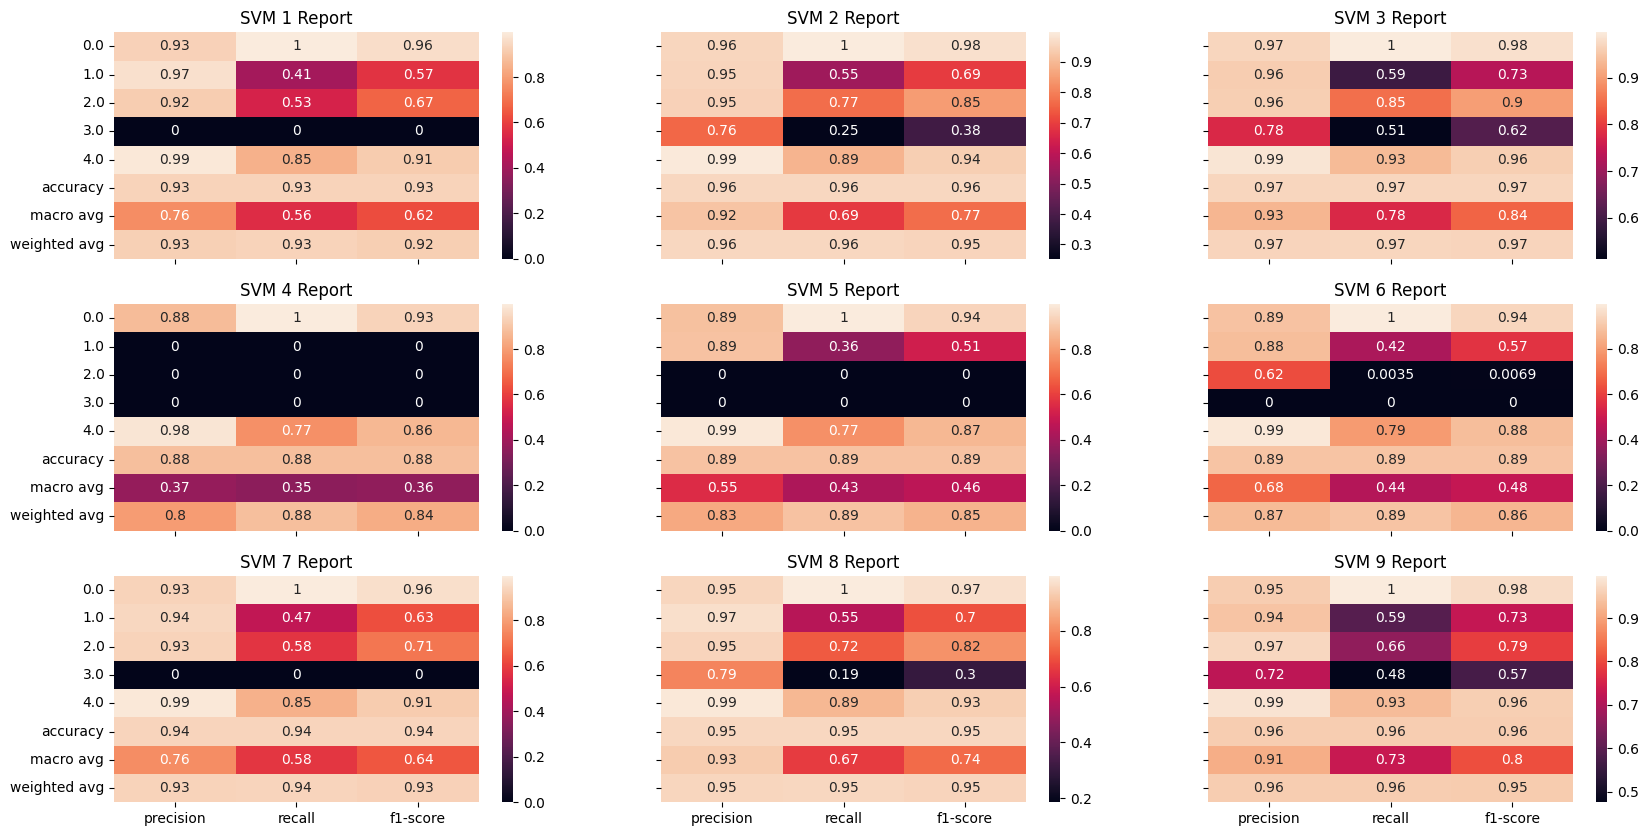

In [ ]:
# Define SVM Classifiers with different hyperparameters

svm_1 = SVC(kernel = 'rbf', C = 0.1)
svm_2 = SVC(kernel = 'rbf', C = 1)
svm_3 = SVC(kernel = 'rbf', C = 10)

svm_4 = SVC(kernel = 'linear', C = 0.1)
svm_5 = SVC(kernel = 'linear', C = 1)
svm_6 = SVC(kernel = 'linear', C = 10)

svm_7 = SVC(kernel = 'poly', C = 0.1)
svm_8 = SVC(kernel = 'poly', C = 1)
svm_9 = SVC(kernel = 'poly', C = 10)

# Fit the SVM on the training data

svm_1.fit(X_mb_train, y_mb_train)
svm_2.fit(X_mb_train, y_mb_train)
svm_3.fit(X_mb_train, y_mb_train)
svm_4.fit(X_mb_train, y_mb_train)
svm_5.fit(X_mb_train, y_mb_train)
svm_6.fit(X_mb_train, y_mb_train)
svm_7.fit(X_mb_train, y_mb_train)
svm_8.fit(X_mb_train, y_mb_train)
svm_9.fit(X_mb_train, y_mb_train)

# Generate classification reports for each SVM using the test data

svm_1_report = classification_report(y_mb_test, svm_1.predict(X_mb_test), output_dict=True)
svm_2_report = classification_report(y_mb_test, svm_2.predict(X_mb_test), output_dict=True)
svm_3_report = classification_report(y_mb_test, svm_3.predict(X_mb_test), output_dict=True)
svm_4_report = classification_report(y_mb_test, svm_4.predict(X_mb_test), output_dict=True)
svm_5_report = classification_report(y_mb_test, svm_5.predict(X_mb_test), output_dict=True)
svm_6_report = classification_report(y_mb_test, svm_6.predict(X_mb_test), output_dict=True)
svm_7_report = classification_report(y_mb_test, svm_7.predict(X_mb_test), output_dict=True)
svm_8_report = classification_report(y_mb_test, svm_8.predict(X_mb_test), output_dict=True)
svm_9_report = classification_report(y_mb_test, svm_9.predict(X_mb_test), output_dict=True)

# Create a 3x3 grid of subplots for displaying the classification reports

figure, axes = plt.subplots(3, 3, sharex = True, sharey = True)
figure.set_figwidth(20)
figure.set_figheight(10)

report = svm_1_report;

# For each subplot, set the report variable to the corresponding instance's report and plot it using a heatmap

for i in range(0, 3):
  for j in range(0, 3):
    if (i) * 3 + (j + 1) == 1:
        report = svm_1_report
    elif (i) * 3 + (j + 1) == 2:
        report = svm_2_report
    elif (i) * 3 + (j + 1) == 3:
        report = svm_3_report
    elif (i) * 3 + (j + 1) == 4:
        report = svm_4_report
    elif (i) * 3 + (j + 1) == 5:
        report = svm_5_report    
    elif (i) * 3 + (j + 1) == 6:
        report = svm_6_report  
    elif (i) * 3 + (j + 1) == 7:
        report = svm_7_report  
    elif (i) * 3 + (j + 1) == 8:
        report = svm_8_report  
    elif (i) * 3 + (j + 1) == 9:
        report = svm_9_report  

    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, ax = axes[i][j])
    axes[i][j].set_title('SVM ' + str((i) * 3 + (j + 1)) + ' Report')
plt.show()

#### Use GridSearch CV

##### Random Forest Search Model

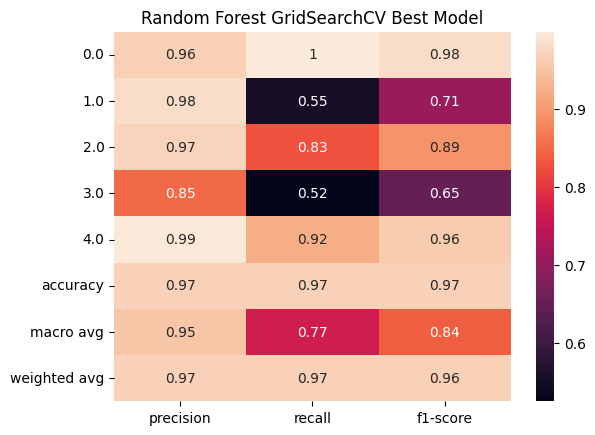

{'max_depth': 25, 'max_samples': 0.9, 'n_estimators': 200}
RandomForestClassifier(max_depth=25, max_samples=0.9, n_estimators=200)


In [ ]:
# Define a dictionary of hyperparameters for the Random Forest Classifier model
parameters = {
    'max_depth': [8, 13, 18, 25],
    'n_estimators': [80, 100, 150, 200],
    'max_samples': [0.5, 0.9]
}

# Initialize the GridSearchCV object with the Random Forest Classifier model, the hyperparameter dictionary, and other necessary parameters
random_forest_gridSearchCV = GridSearchCV(RandomForestClassifier(), parameters, refit = True, cv = 5)

# Train the GridSearchCV object on the training data
random_forest_gridSearchCV.fit(X_mb_train, y_mb_train)

# Generate a classification report for the best model identified by the GridSearchCV
random_forest_gridSearchCV_report = classification_report(y_mb_test, random_forest_gridSearchCV.predict(X_mb_test), output_dict=True)

# Create a heatmap of the classification report for better visualization
ax = plt.axes()
sns.heatmap(pd.DataFrame(random_forest_gridSearchCV_report).iloc[:-1, :].T, annot=True, ax = ax)

ax.set_title('Random Forest GridSearchCV Best Model')
plt.show()

# Print the best hyperparameters identified by the GridSearchCV
print(random_forest_gridSearchCV.best_params_)
print(random_forest_gridSearchCV.best_estimator_)

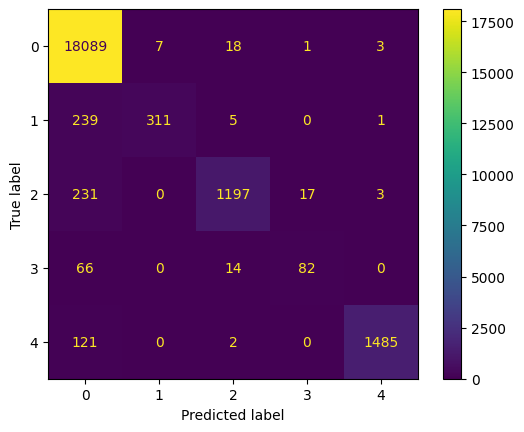

In [ ]:
# Confusion Matrix

random_forest_best = RandomForestClassifier(n_estimators = 200, max_depth = 25, max_samples = 0.9)
random_forest_best.fit(X_mb_train, y_mb_train)

random_forest_cm = confusion_matrix(y_mb_test, random_forest_best.predict(X_mb_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = random_forest_cm)
cm_display.plot()
plt.show()

##### Gradient Boosted Trees Search Model

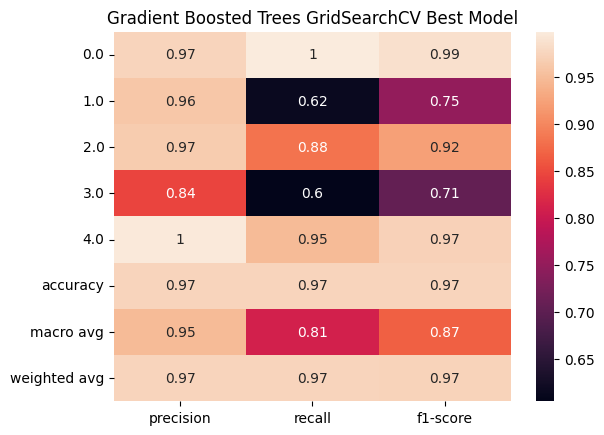

{'learning_rate': 0.2, 'max_depth': 13, 'n_estimators': 220}


In [ ]:
# XGBoost Classifier Initialization
estimator = XGBClassifier(objective= 'multi:softmax', nthread=-1, tree_method='gpu_hist', seed=42)

# Parameter grid for Grid Search Cross Validation
parameters = {
    'max_depth': [5, 13, 20, 25],
    'n_estimators': [70, 100, 170, 220],
    'learning_rate': [0.1, 0.2]
}

# Grid Search Cross Validation Initialization
gb_trees_gridSearchCV = GridSearchCV(estimator=estimator, param_grid=parameters, n_jobs = -1, cv = 3, refit = True)

# Fitting the Grid Search Cross Validation with training data
gb_trees_gridSearchCV.fit(X_mb_train, y_mb_train)

# Generating classification report for the test data
gb_trees_gridSearchCV_report = classification_report(y_mb_test, gb_trees_gridSearchCV.predict(X_mb_test), output_dict=True)

# Plotting Heatmap for Classification Report
ax = plt.axes()
sns.heatmap(pd.DataFrame(gb_trees_gridSearchCV_report).iloc[:-1, :].T, annot=True, ax = ax)

ax.set_title('Gradient Boosted Trees GridSearchCV Best Model')
plt.show()

# Printing the best parameters and estimator from the Grid Search Cross Validation
print(gb_trees_gridSearchCV.best_params_)
#print(gb_trees_gridSearchCV.best_estimator_)

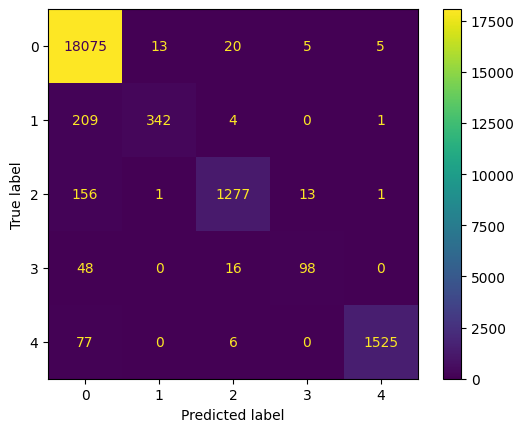

In [ ]:
# Confusion Matrix

gb_trees_best = XGBClassifier(n_estimators = 220, max_depth = 13, nthread=-1, tree_method='gpu_hist', learning_rate = 0.2)
gb_trees_best.fit(X_mb_train, y_mb_train)

gb_trees_cm = confusion_matrix(y_mb_test, gb_trees_best.predict(X_mb_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = gb_trees_cm)
cm_display.plot()
plt.show()

##### SVM Search Model

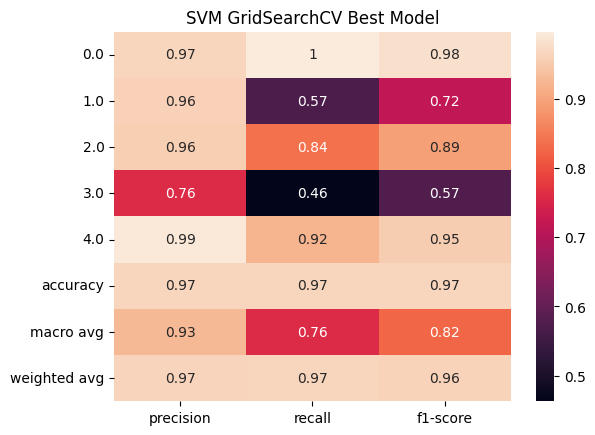

{'C': 4, 'kernel': 'rbf'}
SVC(C=4)


In [ ]:
# Define a dictionary of parameter ranges to search over
parameters = {'kernel':['poly', 'rbf'], 'C':[0.8, 1, 2, 3, 4, 0.9, 0.7]}

# Create a GridSearchCV object with the SVM classifier and the parameter ranges to search over
svm_gridSearchCV = GridSearchCV(SVC(), parameters, refit = True, cv = 3, n_jobs = -1)

# Train the GridSearchCV object on the training data
svm_gridSearchCV.fit(X_mb_train, y_mb_train)

# Generate a classification report on the test data for the best model found by GridSearchCV
svm_gridSearchCV_report = classification_report(y_mb_test, svm_gridSearchCV.predict(X_mb_test), output_dict=True)

# Create a heatmap of the classification report using Seaborn
ax = plt.axes()
sns.heatmap(pd.DataFrame(svm_gridSearchCV_report).iloc[:-1, :].T, annot=True, ax = ax)

ax.set_title('SVM GridSearchCV Best Model')
plt.show()

# Print the parameters of the best model found by GridSearchCV
print(svm_gridSearchCV.best_params_)
print(svm_gridSearchCV.best_estimator_)

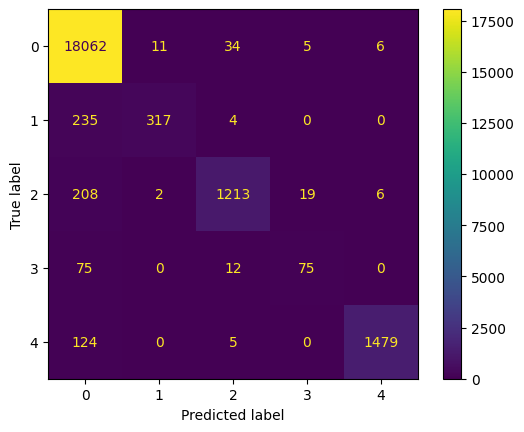

In [ ]:
# Confusion Matrix

svm_best = SVC(kernel = 'rbf', C = 4)
svm_best.fit(X_mb_train, y_mb_train)

svm_best_cm = confusion_matrix(y_mb_test, svm_best.predict(X_mb_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svm_best_cm)
cm_display.plot()
plt.show()

## Rezolvarea cerintelor - PTB Diagnostic ECG

### 1. Extragerea atributelor [2p]

##### Feature Engineering

In [6]:
# For each feature, compute a set of statistics and append them to the training and testing sets

X_train = X_pt_train
X_test = X_pt_test

# Compute the mean
X_train["mean"] = X_pt_train.apply(lambda x: x.mean(), axis=1)
X_test["mean"] = X_pt_test.apply(lambda x: x.mean(), axis=1)

# Compute the standard deviation
X_train['std'] = X_pt_train.apply(lambda x: x.std(), axis=1)
X_test['std'] = X_pt_test.apply(lambda x: x.std(), axis=1)

# Compute the average absolute difference from the mean
X_train['aad'] = X_pt_train.apply(lambda x: np.mean(np.absolute(x - np.mean(x))), axis=1)
X_test['aad'] = X_pt_test.apply(lambda x: np.mean(np.absolute(x - np.mean(x))), axis=1)

# Compute the minimum
X_train['min'] = X_pt_train.apply(lambda x: x.min(), axis=1)
X_test['min'] = X_pt_test.apply(lambda x: x.min(), axis=1)

# Compute the maximum
X_train['max'] = X_pt_train.apply(lambda x: x.max(), axis=1)
X_test['max'] = X_pt_test.apply(lambda x: x.max(), axis=1)

# Compute the difference between the maximum and minimum
X_train['maxmin_diff'] = X_train['max'] - X_train['min']
X_test['maxmin_diff'] = X_test['max'] - X_test['min']

# Compute the median
X_train['median'] = X_pt_train.apply(lambda x: np.median(x), axis=1)
X_test['median'] = X_pt_test.apply(lambda x: np.median(x), axis=1)

# Compute the median absolute deviation from the median
X_train['mad'] = X_pt_train.apply(lambda x: np.median(np.absolute(x - np.median(x))), axis=1)
X_test['mad'] = X_pt_test.apply(lambda x: np.median(np.absolute(x - np.median(x))), axis=1)

# Compute the interquartile range
X_train['IQR'] = X_pt_train.apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25), axis=1)
X_test['IQR'] = X_pt_test.apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25), axis=1)

# Compute the number of negative values
X_train['neg_count'] = X_pt_train.apply(lambda x: np.sum(x < 0), axis=1)
X_test['neg_count'] = X_pt_test.apply(lambda x: np.sum(x < 0), axis=1)

# Compute the number of positive values
X_train['pos_count'] = X_pt_train.apply(lambda x: np.sum(x > 0), axis=1)
X_test['pos_count'] = X_pt_test.apply(lambda x: np.sum(x > 0), axis=1)

# Compute the number of values above the mean
X_train['above_mean'] = X_pt_train.apply(lambda x: np.sum(x > x.mean()), axis=1)
X_test['above_mean'] = X_pt_test.apply(lambda x: np.sum(x > x.mean()), axis=1)

# Compute the number of peaks
X_train['peak_count'] = X_pt_train.apply(lambda x: len(find_peaks(x)[0]), axis=1)
X_test['peak_count'] = X_pt_test.apply(lambda x: len(find_peaks(x)[0]), axis=1)

# Compute the skewness
X_train['skewness'] = X_pt_train.apply(lambda x: skew(x), axis=1)
X_test['skewness'] = X_pt_test.apply(lambda x: skew(x), axis=1)

# Compute the kurtosis
X_train['kurtosis'] = X_pt_train.apply(lambda x: kurtosis(x), axis=1)
X_test['kurtosis'] = X_pt_test.apply(lambda x: kurtosis(x), axis=1)

x_list_fft = X_pt_train.apply(lambda x: np.abs(np.fft.fft(x))[1:], axis=1)
x_test_list_fft = X_pt_test.apply(lambda x: np.abs(np.fft.fft(x))[1:], axis=1)

# Compute statistical features on the raw signals in frequency domain
# Mean of the FFT
X_train['mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_test['mean_fft'] = pd.Series(x_test_list_fft).apply(lambda x: x.mean())

# Standard deviation of the FFT
X_train['std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_test['std_fft'] = pd.Series(x_test_list_fft).apply(lambda x: x.std())

# Average absolute difference of the FFT
X_train['aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['aad_fft'] = pd.Series(x_test_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# Minimum value of the FFT
X_train['min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_test['min_fft'] = pd.Series(x_test_list_fft).apply(lambda x: x.min())

# Maximum value of the FFT
X_train['max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_test['max_fft'] = pd.Series(x_test_list_fft).apply(lambda x: x.max())

# Maximum-minimum difference of the FFT
X_train['maxmin_diff_fft'] = X_train['max_fft'] - X_train['min_fft']
X_test['maxmin_diff_fft'] = X_test['max_fft'] - X_test['min_fft']

# Median of the FFT
X_train['median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_test['median_fft'] = pd.Series(x_test_list_fft).apply(lambda x: np.median(x))

# Median absolute deviation of the FFT
X_train['mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['mad_fft'] = pd.Series(x_test_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# Interquartile range of the FFT
X_train['IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['IQR_fft'] = pd.Series(x_test_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# Number of values in the FFT that are above the mean
X_train['above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['above_mean_fft'] = pd.Series(x_test_list_fft).apply(lambda x: np.sum(x > x.mean()))

# Calculate the number of peaks in the FFT of the signal
X_train['peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['peak_count_fft'] = pd.Series(x_test_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# Calculate the skewness of the FFT signal
X_train['skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: skew(x))
X_test['skewness_fft'] = pd.Series(x_test_list_fft).apply(lambda x: skew(x))

# Calculate the kurtosis of the FFT signal
X_train['kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: kurtosis(x))
X_test['kurtosis_fft'] = pd.Series(x_test_list_fft).apply(lambda x: kurtosis(x))

X_pt_test = X_test
X_pt_train = X_train
X_pt_train

10        11        12        13        14        15        16  \
0      0.115942  0.129227  0.130435  0.126812  0.128824  0.128422  0.135266   
1      0.210815  0.212083  0.208703  0.202788  0.209125  0.209125  0.201521   
2      0.085227  0.080579  0.078254  0.078512  0.072572  0.076705  0.072831   
3      0.270686  0.283688  0.276596  0.277778  0.281915  0.295508  0.301418   
4      0.081524  0.088278  0.083936  0.093102  0.104679  0.112397  0.106126   
...         ...       ...       ...       ...       ...       ...       ...   
11635  0.166667  0.169679  0.184739  0.158635  0.181727  0.178715  0.187751   
11636  0.794389  0.833752  0.775963  0.835846  0.813233  0.791457  0.806951   
11637  0.187067  0.202079  0.191686  0.204965  0.188222  0.196305  0.224596   
11638  0.429218  0.444085  0.450549  0.445378  0.446671  0.471881  0.485456   
11639  0.090004  0.083783  0.086271  0.098714  0.096640  0.100373  0.101203   

             17        18        19  ...    min_fft     max_fft  \
0      0.131240  0.138084  0.143317  ...  16.995090  341.330741   
1      0.206168  0.220110  0.213773  ...  18.722563  319.163793   
2      0.071798  0.079029  0.071798  ...  44.046808  292.272961   
3      0.291962  0.293735  0.296099  ...  47.171402  293.112941   
4      0.107574  0.124940  0.092619  ...  57.305274  266.216707   
...         ...       ...       ...  ...        ...         ...   
11635  0.206827  0.192771  0.230924  ...   1.191375  343.881506   
11636  0.828308  0.806114  0.809883  ...  39.938908  263.929131   
11637  0.227483  0.228637  0.207852  ...  10.328381  330.597333   
11638  0.500970  0.524887  0.519069  ...  15.774349  337.671316   
11639  0.105765  0.113646  0.127748  ...  39.662675  315.128926   

       maxmin_diff_fft  median_fft    mad_fft     IQR_fft  above_mean_fft  \
0           324.335651  206.605280  65.322382  147.234235             100   
1           300.441231  179.800591  59.462082  116.843131              98   
2           248.226154  176.205754  51.305315  114.305343              98   
3           245.941539  176.044509  51.565582  115.912962              98   
4           208.911433  160.049078  44.875527   94.243279              96   
...                ...         ...        ...         ...             ...   
11635       342.690131  198.662167  69.691012  131.886031             100   
11636       223.990223   95.078672  35.152453   68.954409              78   
11637       320.268952  189.014121  64.353038  124.570504              98   
11638       321.896966  201.122138  66.951337  140.801840             100   
11639       275.466252  192.068429  57.105187  130.530789             100   

       peak_count_fft  skewness_fft  kurtosis_fft  
0                   5     -0.283497     -1.053008  
1                   7     -0.120162     -1.004526  
2                   3     -0.130184     -1.099008  
3                   3     -0.136104     -1.111583  
4                   5     -0.028272     -1.060388  
...               ...           ...           ...  
11635               5     -0.190231     -0.976446  
11636               7      0.938618      0.174773  
11637               5     -0.157741     -0.995219  
11638               7     -0.254119     -1.054823  
11639               5     -0.232937     -1.133346  

[11640 rows x 196 columns]

In [ ]:
X_pt_train

mean       std       aad  min       max  maxmin_diff    median  \
0      0.116654  0.132881  0.076465  0.0  0.934380     0.934380  0.100040   
1      0.139990  0.141236  0.099202  0.0  1.000000     1.000000  0.178707   
2      0.086532  0.116658  0.083114  0.0  0.885072     0.885072  0.072185   
3      0.167891  0.172661  0.156701  0.0  0.908392     0.908392  0.213357   
4      0.068732  0.125331  0.077678  0.0  1.000000     1.000000  0.000000   
...         ...       ...       ...  ...       ...          ...       ...   
11635  0.209636  0.171942  0.125501  0.0  1.000000     1.000000  0.219378   
11636  0.302355  0.395615  0.377745  0.0  0.881910     0.881910  0.000000   
11637  0.165615  0.139573  0.099135  0.0  1.000000     1.000000  0.187644   
11638  0.313837  0.217958  0.167373  0.0  0.925663     0.925663  0.361668   
11639  0.087380  0.135630  0.079589  0.0  0.985068     0.985068  0.071340   

            mad       IQR  neg_count  ...    min_fft     max_fft  \
0      0.038043  0.085218          0  ...  16.995090  341.330741   
1      0.033376  0.202788          0  ...  18.722563  319.163793   
2      0.072185  0.170713          0  ...  44.046808  292.272961   
3      0.173168  0.308658          0  ...  47.171402  293.112941   
4      0.000000  0.107815          0  ...  57.305274  266.216707   
...         ...       ...        ...  ...        ...         ...   
11635  0.092871  0.200552          0  ...   1.191375  343.881506   
11636  0.000000  0.806114          0  ...  39.938908  263.929131   
11637  0.058314  0.226905          0  ...  10.328381  330.597333   
11638  0.068197  0.418390          0  ...  15.774349  337.671316   
11639  0.071340  0.102966          0  ...  39.662675  315.128926   

       maxmin_diff_fft  median_fft    mad_fft     IQR_fft  above_mean_fft  \
0           324.335651  206.605280  65.322382  147.234235             100   
1           300.441231  179.800591  59.462082  116.843131              98   
2           248.226154  176.205754  51.305315  114.305343              98   
3           245.941539  176.044509  51.565582  115.912962              98   
4           208.911433  160.049078  44.875527   94.243279              96   
...                ...         ...        ...         ...             ...   
11635       342.690131  198.662167  69.691012  131.886031             100   
11636       223.990223   95.078672  35.152453   68.954409              78   
11637       320.268952  189.014121  64.353038  124.570504              98   
11638       321.896966  201.122138  66.951337  140.801840             100   
11639       275.466252  192.068429  57.105187  130.530789             100   

       peak_count_fft  skewness_fft  kurtosis_fft  
0                   5     -0.283497     -1.053008  
1                   7     -0.120162     -1.004526  
2                   3     -0.130184     -1.099008  
3                   3     -0.136104     -1.111583  
4                   5     -0.028272     -1.060388  
...               ...           ...           ...  
11635               5     -0.190231     -0.976446  
11636               7      0.938618      0.174773  
11637               5     -0.157741     -0.995219  
11638               7     -0.254119     -1.054823  
11639               5     -0.232937     -1.133346  

[11640 rows x 28 columns]

In [ ]:
X_pt_test

mean       std       aad  min       max  maxmin_diff    median  \
0     0.172992  0.153511  0.102413  0.0  0.911683     0.911683  0.150209   
1     0.098280  0.136332  0.092546  0.0  0.936818     0.936818  0.091215   
2     0.098025  0.127370  0.069503  0.0  1.000000     1.000000  0.057490   
3     0.215354  0.179954  0.144398  0.0  1.000000     1.000000  0.175109   
4     0.088683  0.121355  0.079689  0.0  0.955448     0.955448  0.067901   
...        ...       ...       ...  ...       ...          ...       ...   
2905  0.079402  0.124914  0.076919  0.0  0.965638     0.965638  0.043972   
2906  0.093350  0.139725  0.088502  0.0  0.990544     0.990544  0.098345   
2907  0.244053  0.221831  0.184908  0.0  1.000000     1.000000  0.291429   
2908  0.141531  0.144147  0.091191  0.0  0.943820     0.943820  0.137475   
2909  0.066215  0.074952  0.055961  0.0  0.327178     0.327178  0.061454   

           mad       IQR  neg_count  ...    min_fft     max_fft  \
0     0.057719  0.116481          0  ...  11.065579  345.607873   
1     0.091215  0.146860          0  ...  56.446676  296.924588   
2     0.020385  0.057715          0  ...  10.549613  388.833667   
3     0.118669  0.272069          0  ...   4.006406  356.593086   
4     0.067901  0.129227          0  ...  40.704581  303.765249   
...        ...       ...        ...  ...        ...         ...   
2905  0.043972  0.120850          0  ...  28.737907  320.152898   
2906  0.098345  0.124941          0  ...  55.511802  291.601668   
2907  0.191429  0.362143          0  ...  33.348806  314.045486   
2908  0.047588  0.169366          0  ...  21.853021  331.366671   
2909  0.061454  0.093191          0  ...  31.824663  307.394412   

      maxmin_diff_fft  median_fft    mad_fft     IQR_fft  above_mean_fft  \
0          334.542294  215.359736  68.897849  154.937710             100   
1          240.477912  187.103720  54.017605  121.422671              98   
2          378.284054  237.001263  74.405528  175.394683             102   
3          352.586680  199.797758  71.018881  144.753207              98   
4          263.060668  183.594516  55.248032  124.101665              98   
...               ...         ...        ...         ...             ...   
2905       291.414990  188.944791  60.252998  131.118928             100   
2906       236.089866  184.252066  49.694000  118.095353             100   
2907       280.696680  188.330269  58.446332  128.745743             100   
2908       309.513650  196.947889  63.102589  139.218503             100   
2909       275.569749  185.395358  60.157708  126.081543             100   

      peak_count_fft  skewness_fft  kurtosis_fft  
0                  5     -0.319972     -1.054864  
1                  3     -0.201834     -1.184795  
2                  3     -0.361154     -1.049350  
3                  5     -0.125545     -0.989296  
4                  5     -0.180887     -1.113484  
...              ...           ...           ...  
2905               5     -0.198888     -1.066889  
2906               5     -0.180317     -1.169272  
2907               5     -0.192905     -1.094048  
2908               7     -0.235954     -1.058421  
2909               3     -0.184885     -1.102743  

[2910 rows x 28 columns]

In [ ]:
y_pt_train

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11635    1.0
11636    1.0
11637    1.0
11638    0.0
11639    1.0
Name: 187, Length: 11640, dtype: float64

In [7]:
# Suppressing warning messages

warnings.filterwarnings('ignore')

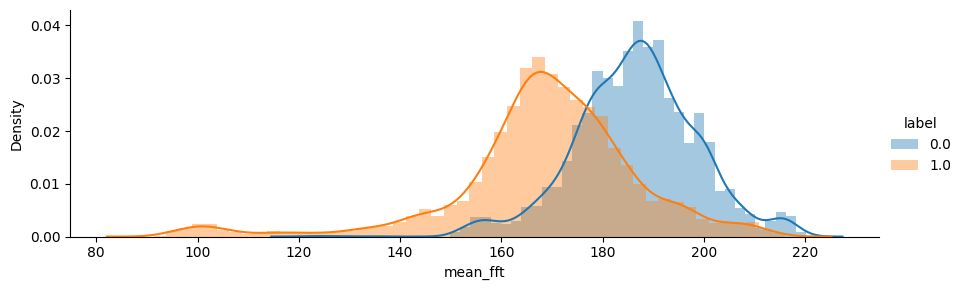

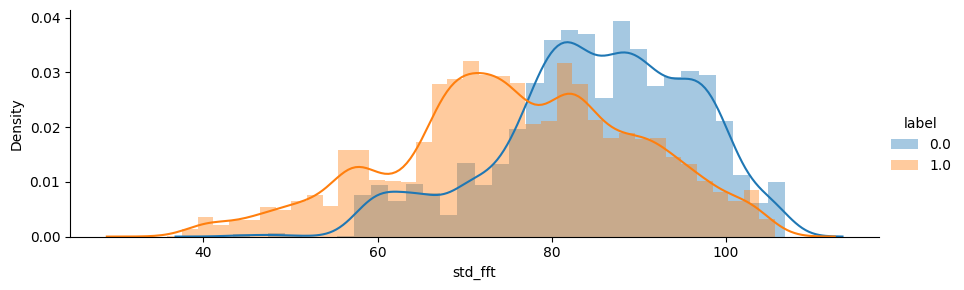

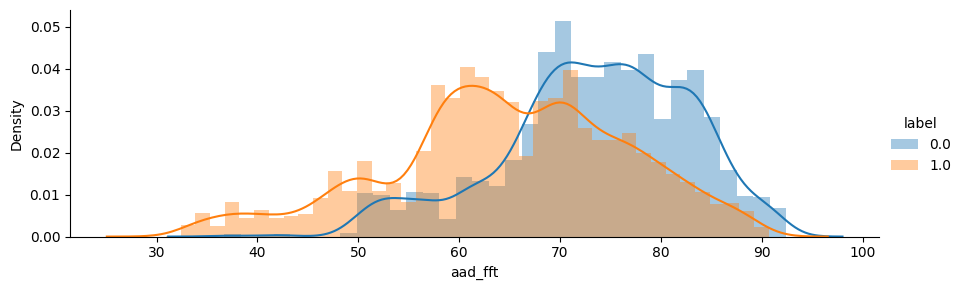

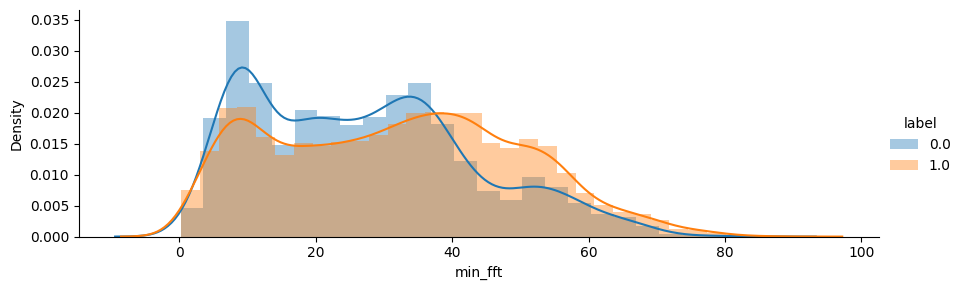

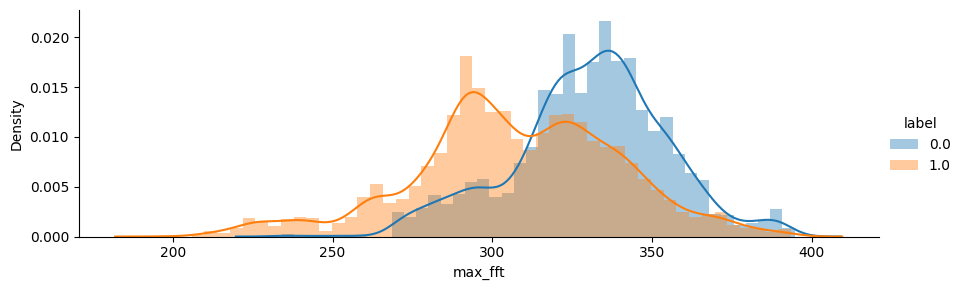

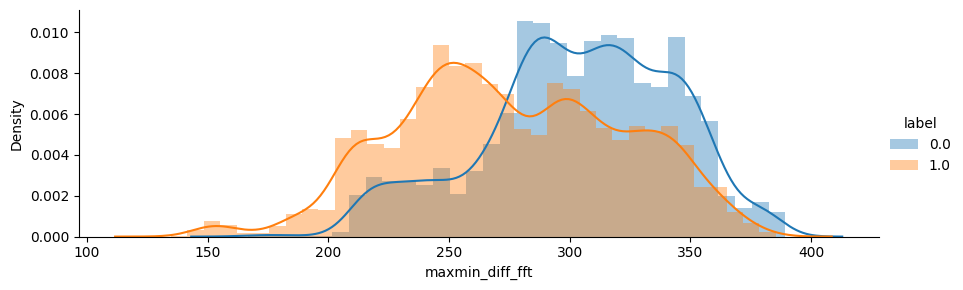

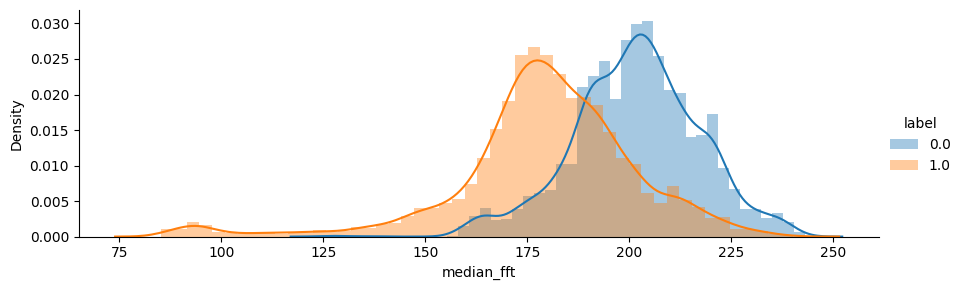

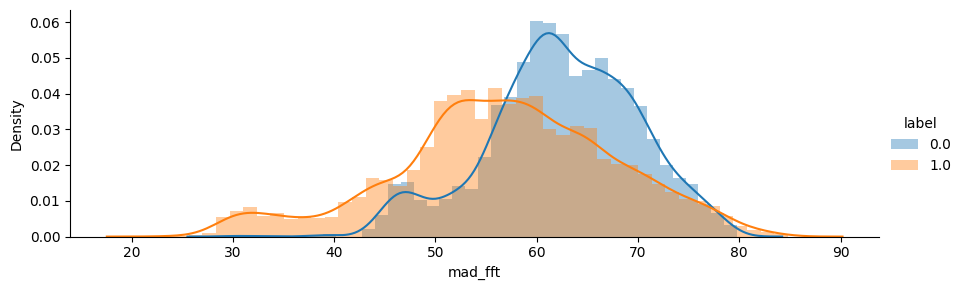

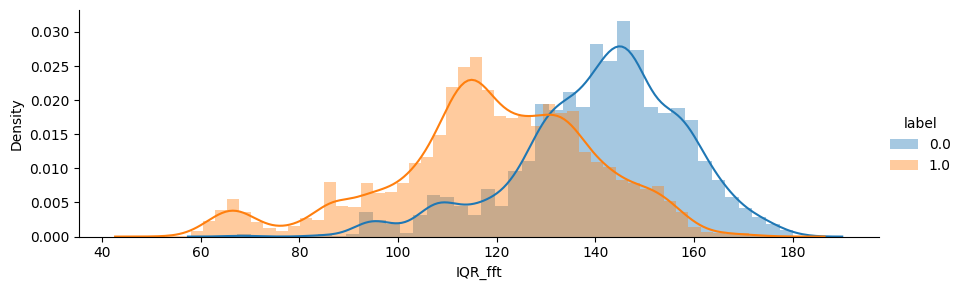

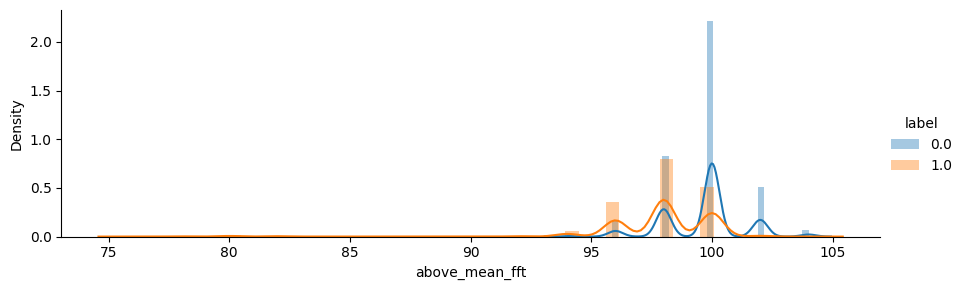

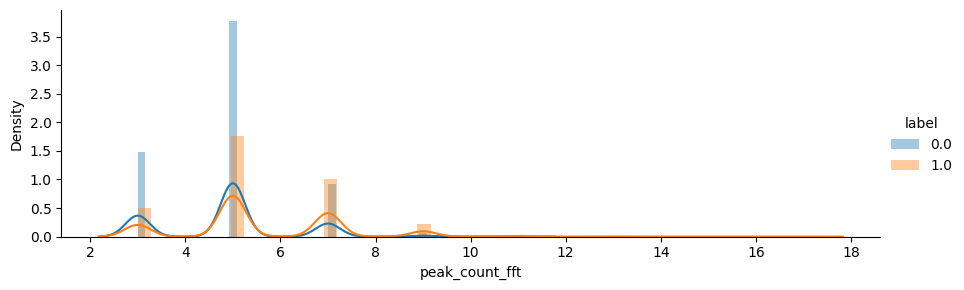

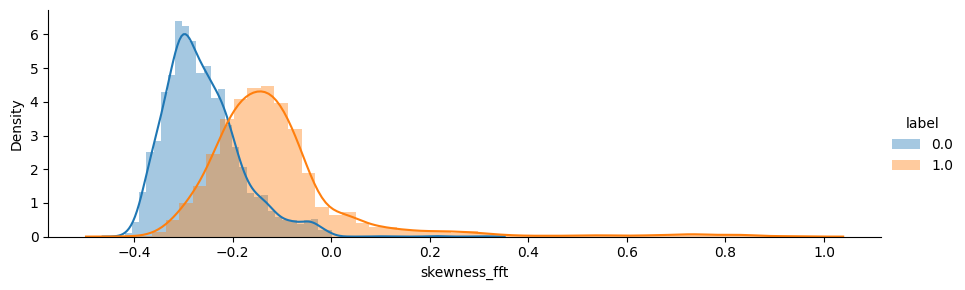

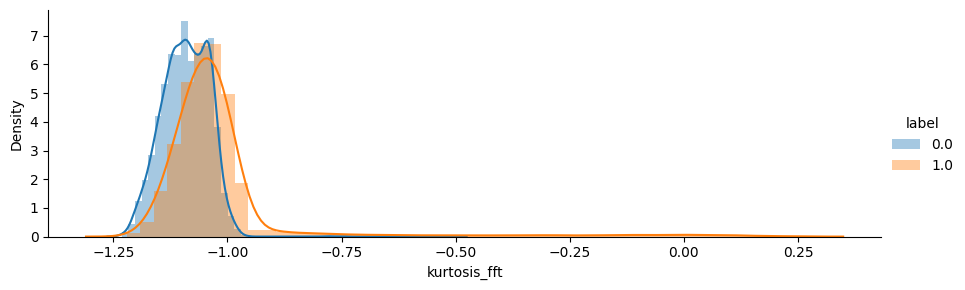

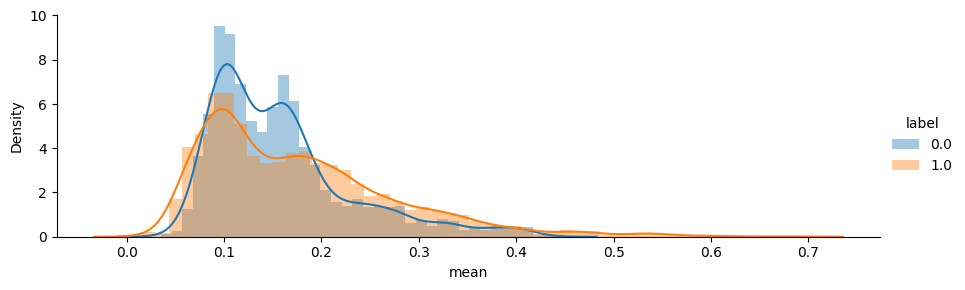

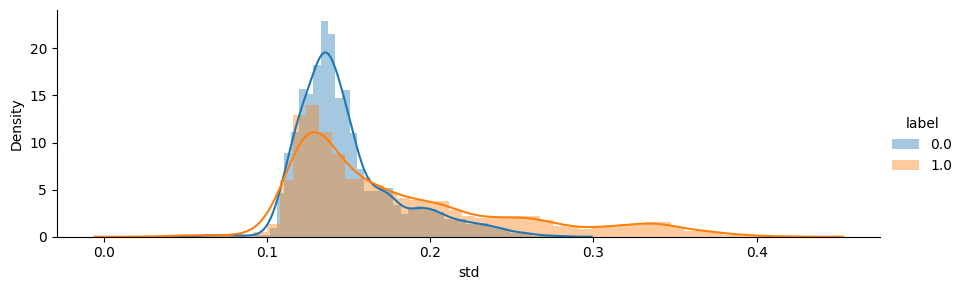

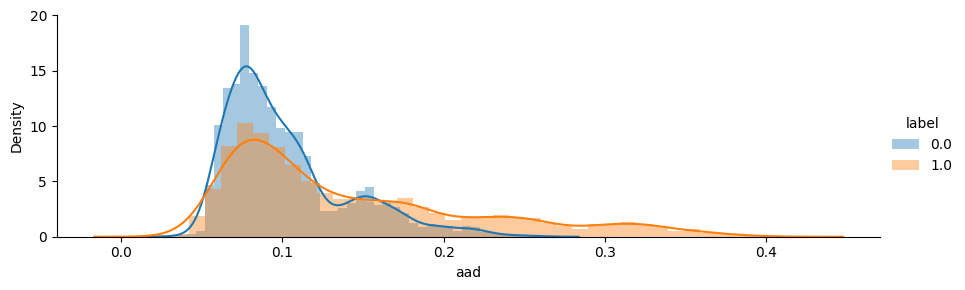

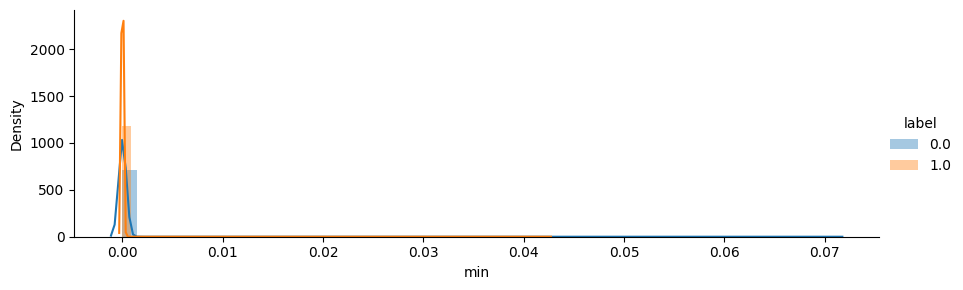

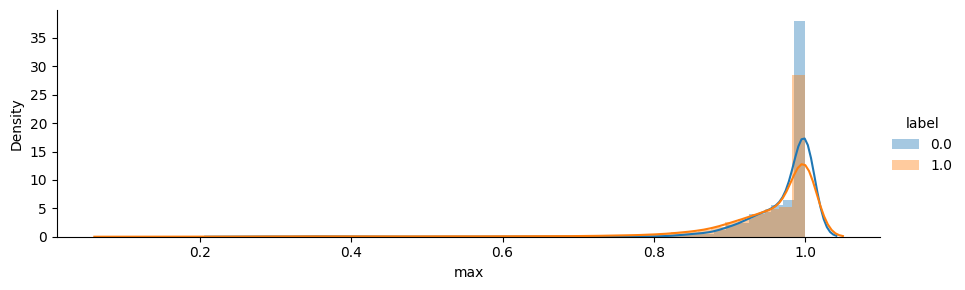

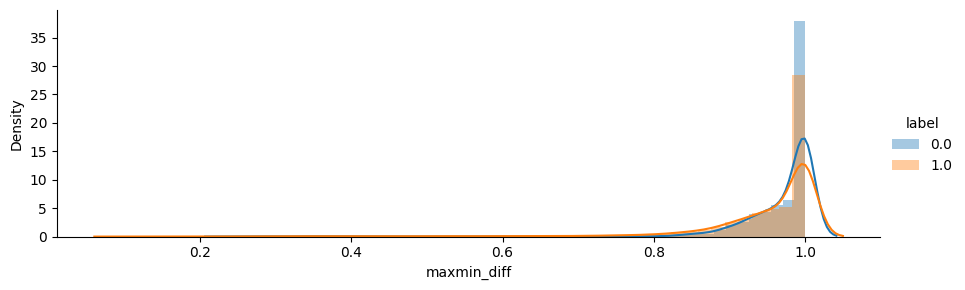

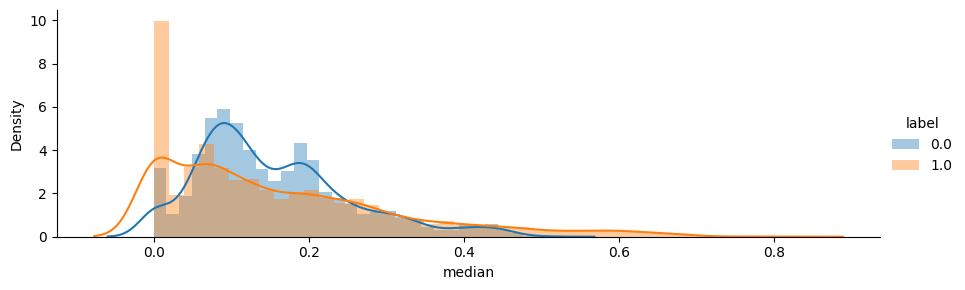

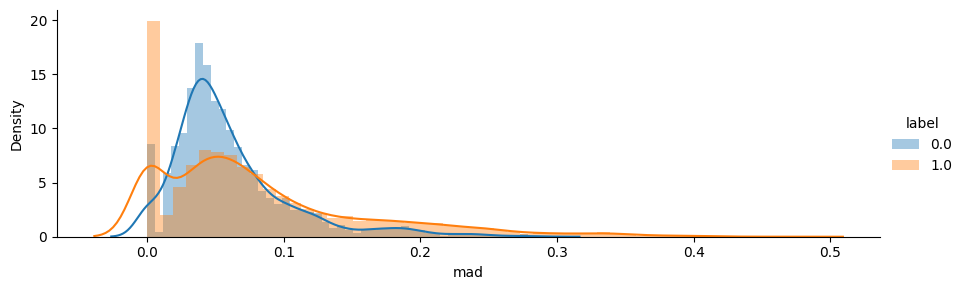

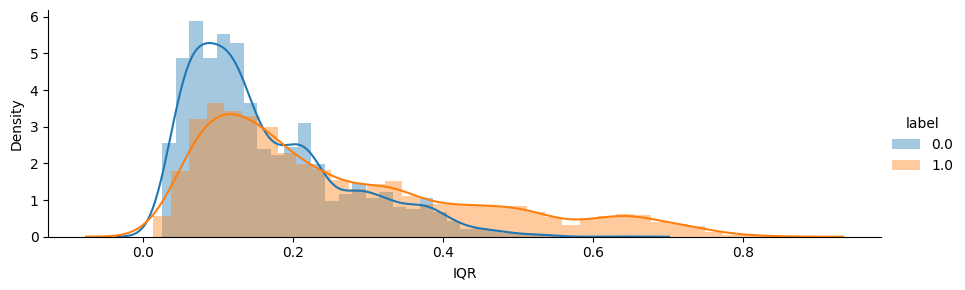

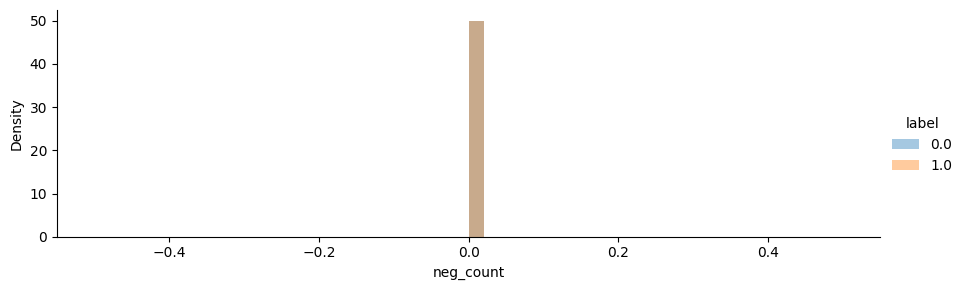

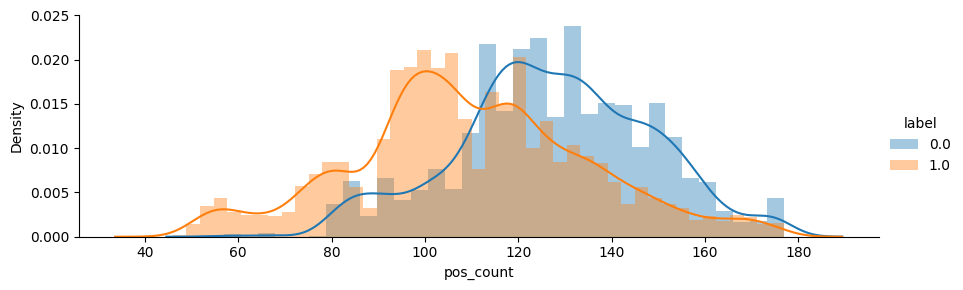

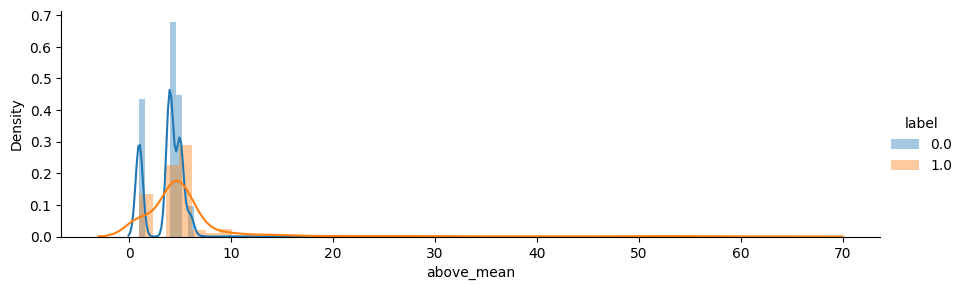

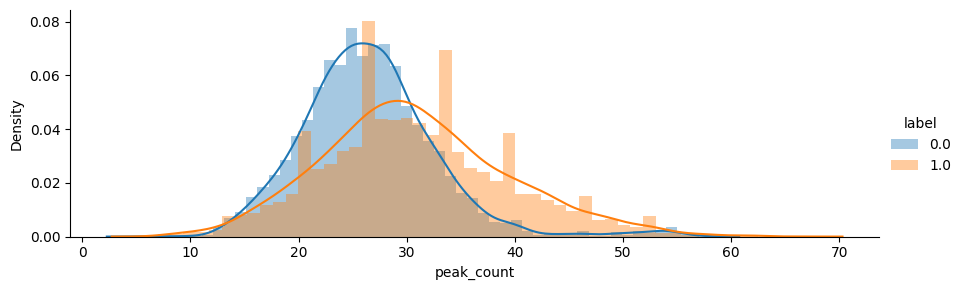

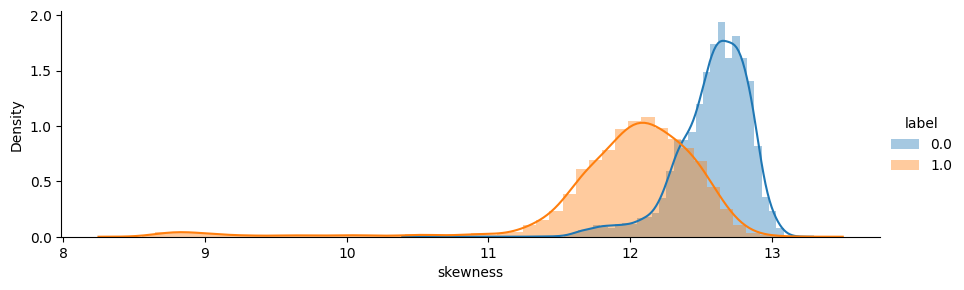

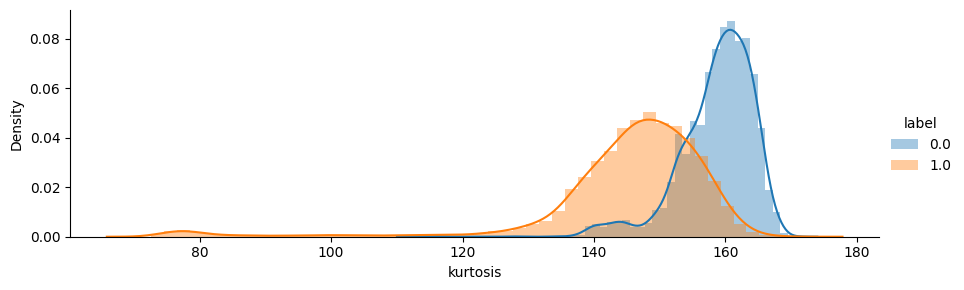

In [ ]:
data = X_pt_train
data['label'] = y_pt_train

# Define the new list of features
columns_features = ["mean_fft", "std_fft", "aad_fft", "min_fft", "max_fft", "maxmin_diff_fft", "median_fft", "mad_fft", "IQR_fft", "above_mean_fft", "peak_count_fft", "skewness_fft", "kurtosis_fft",
                    "mean", "std", "aad", "min", "max", "maxmin_diff", "median", "mad", "IQR", "neg_count", "pos_count", "above_mean", "peak_count", "skewness","kurtosis"];


for feature_to_verify in columns_features:
  # Apply a lambda function to obtain means of each feature's dimension and label
  means = data.apply(lambda x: pd.Series([x[feature_to_verify],
                                            x["label"]], index=[feature_to_verify, "label"]), axis=1)
  # Reset index and drop original index
  means = means.reset_index()
  means = means.drop(['index'], axis=1)

  # Plot distribution plots of means for each dimension of the feature
  g = sns.FacetGrid(means, hue="label", aspect=3).map(sns.distplot, feature_to_verify).add_legend()

In [8]:
columns_features = ["mean_fft", "std_fft", "aad_fft", "min_fft", "max_fft", "maxmin_diff_fft", "median_fft", "mad_fft", "IQR_fft", "above_mean_fft", "peak_count_fft", "skewness_fft", "kurtosis_fft",
                    "mean", "std", "aad", "min", "max", "maxmin_diff", "median", "mad", "IQR", "neg_count", "pos_count", "above_mean", "peak_count", "skewness","kurtosis"];

X_pt_train[columns_features] = MinMaxScaler().fit_transform(X_pt_train[columns_features])
X_pt_test[columns_features] = MinMaxScaler().fit_transform(X_pt_test[columns_features])

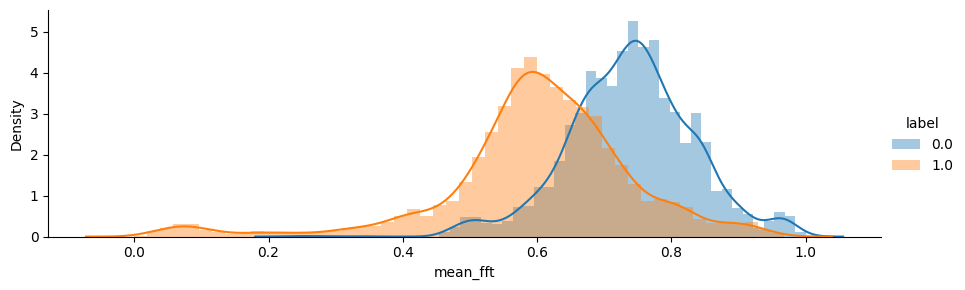

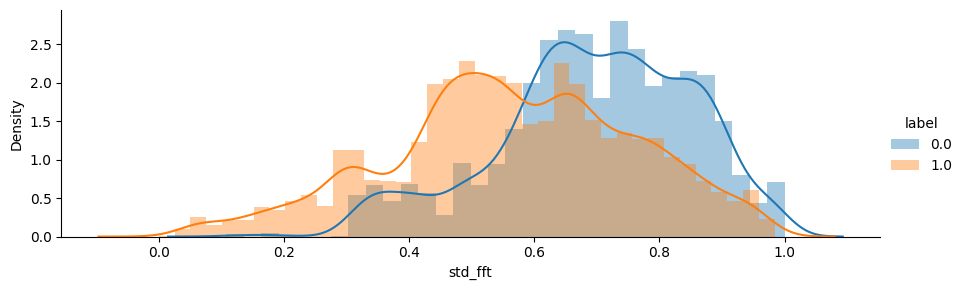

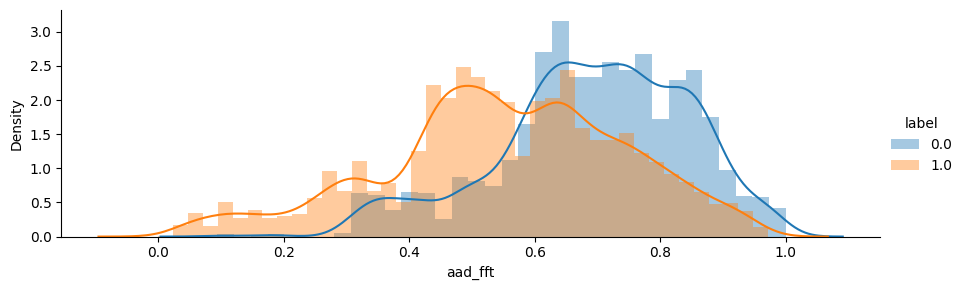

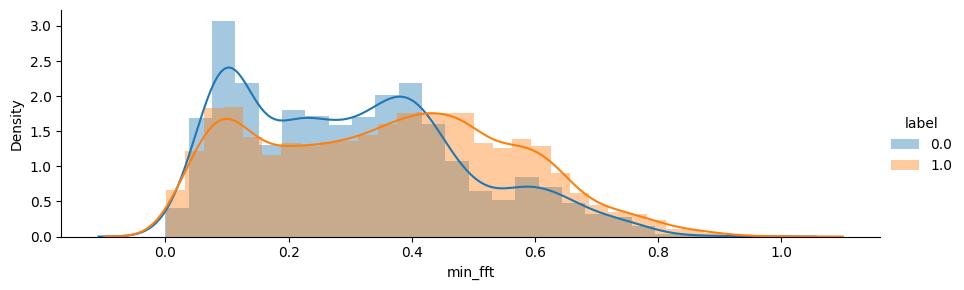

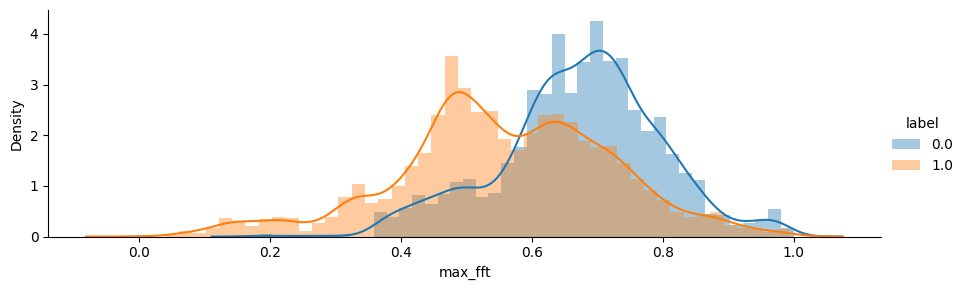

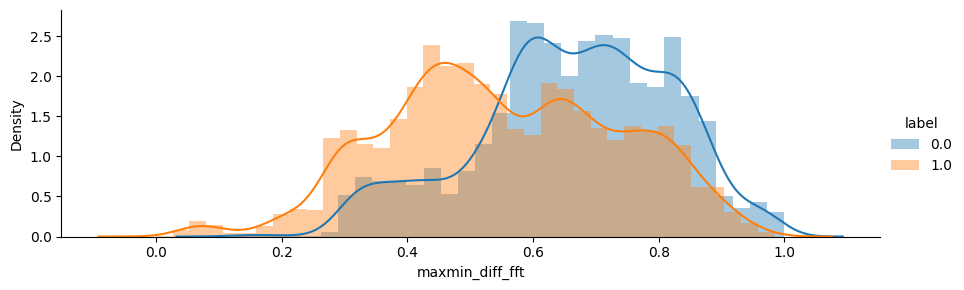

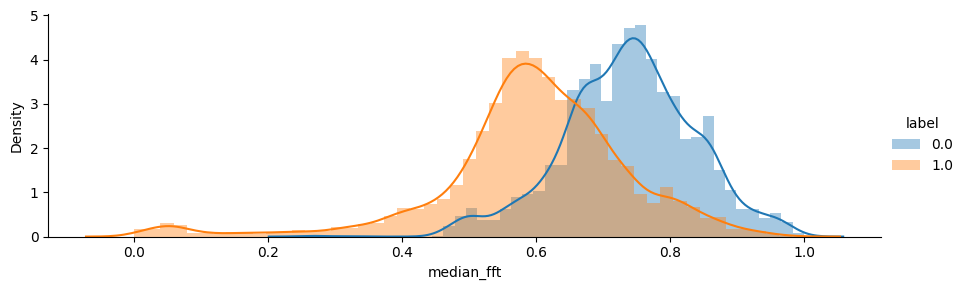

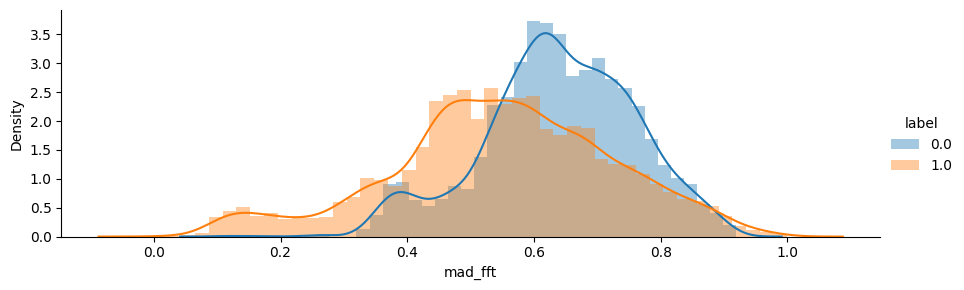

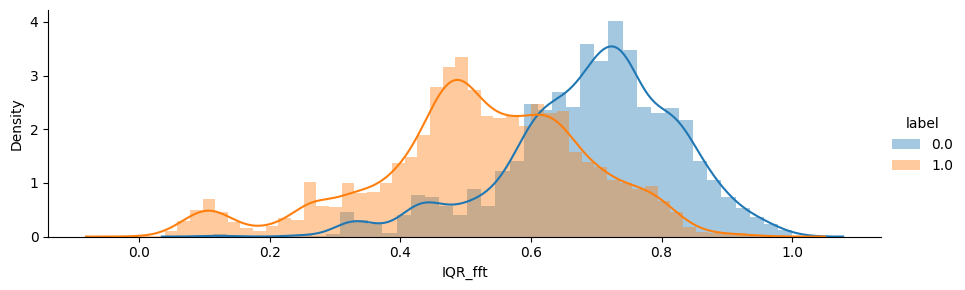

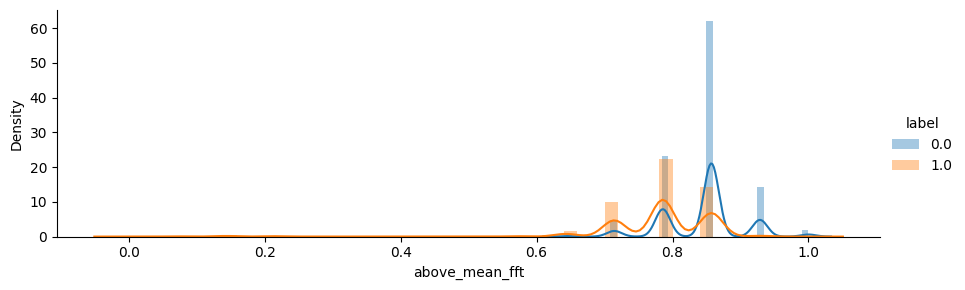

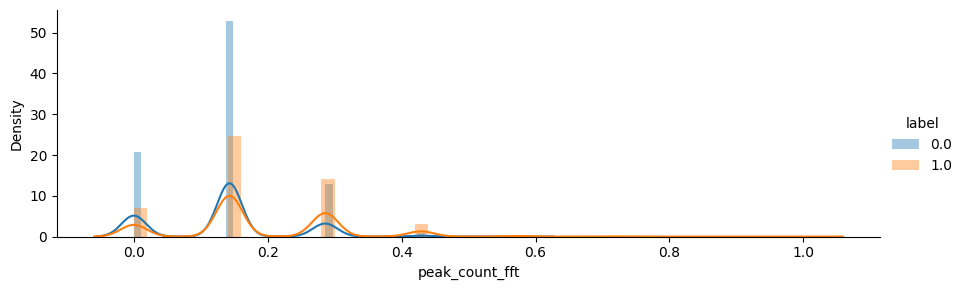

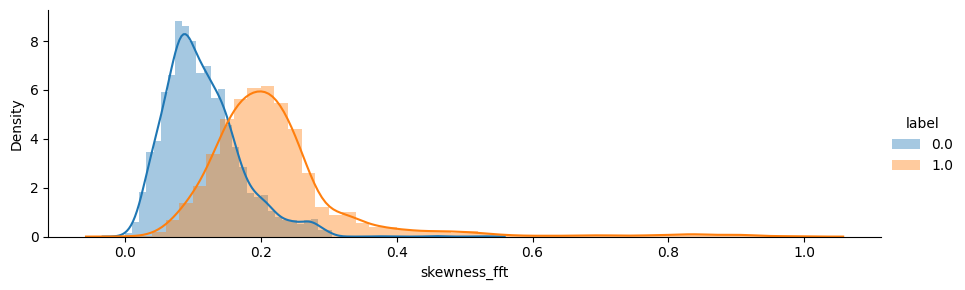

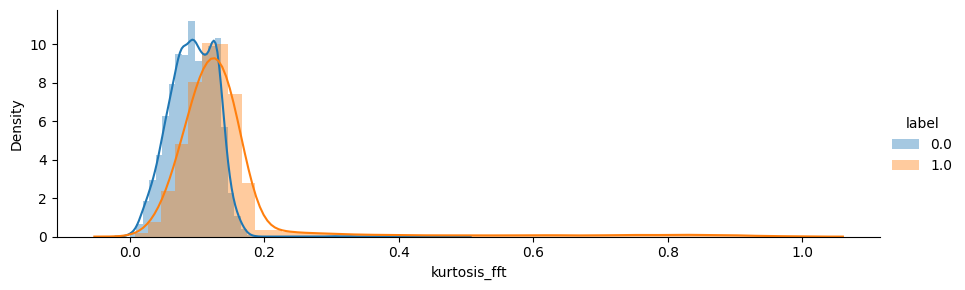

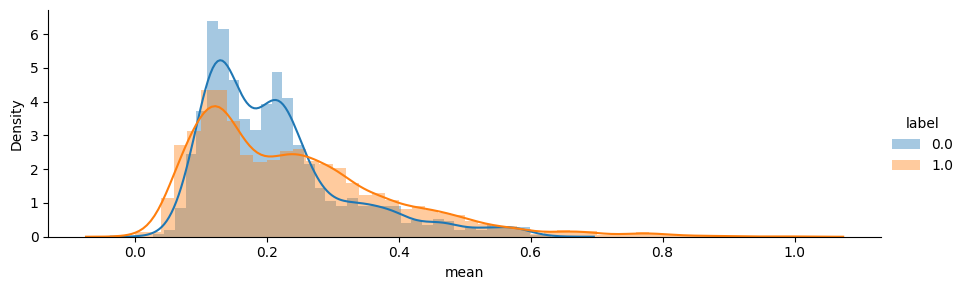

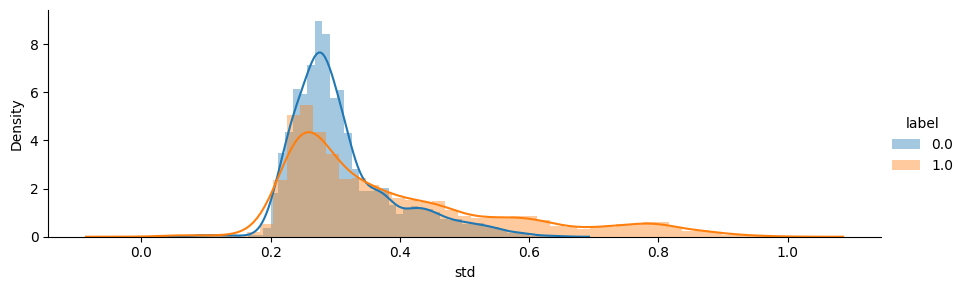

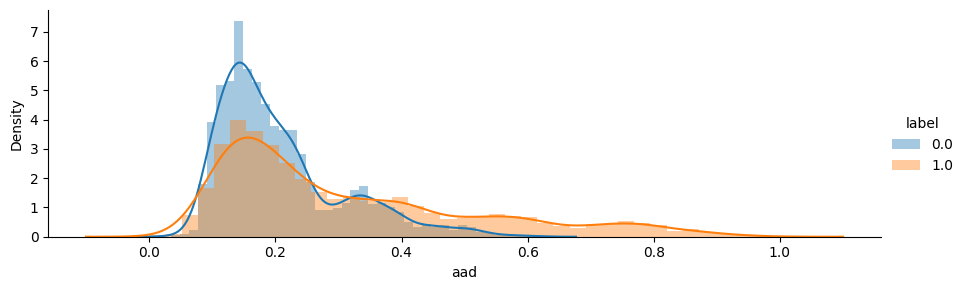

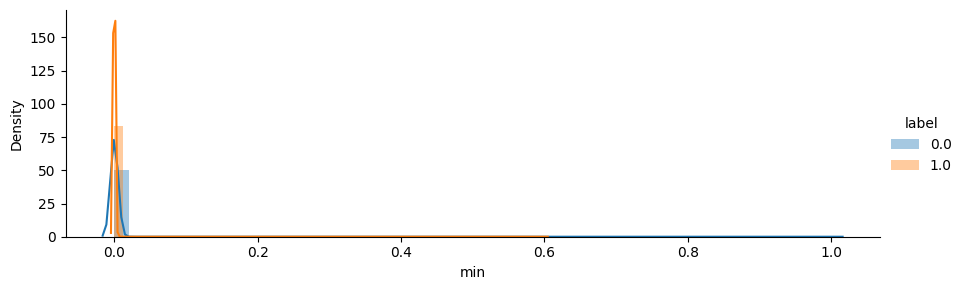

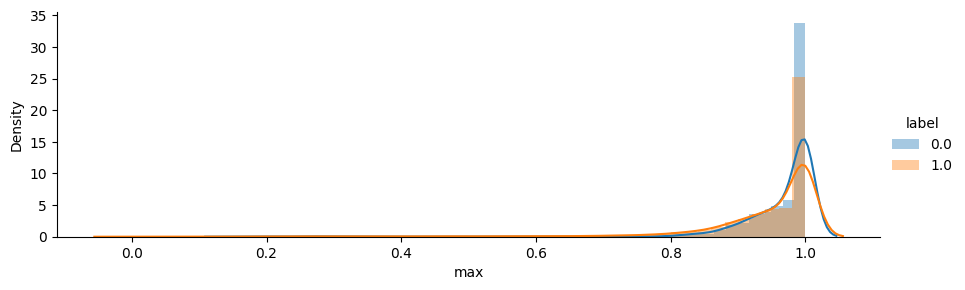

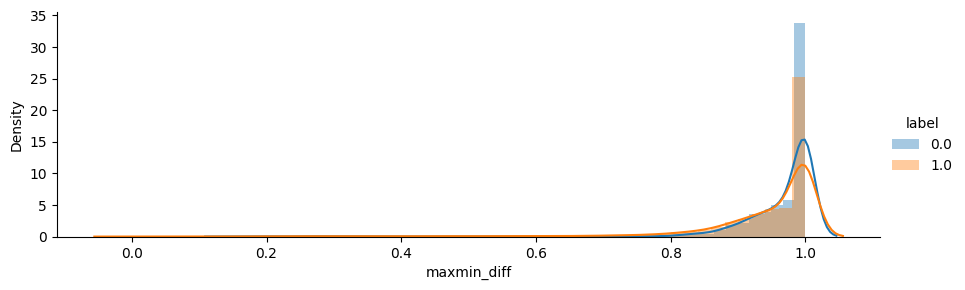

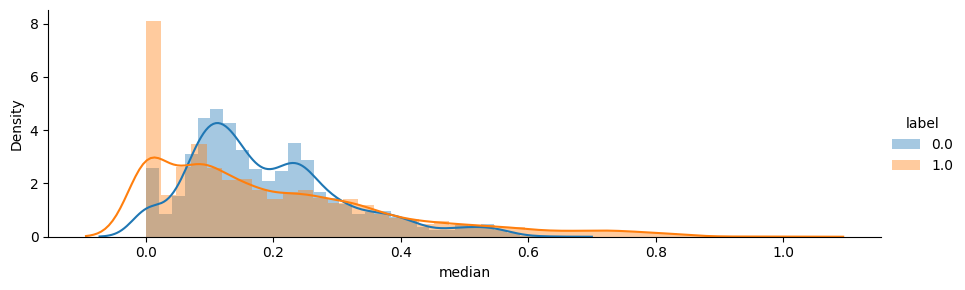

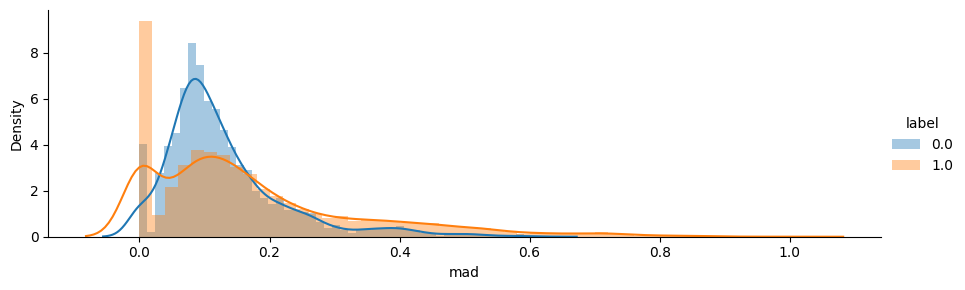

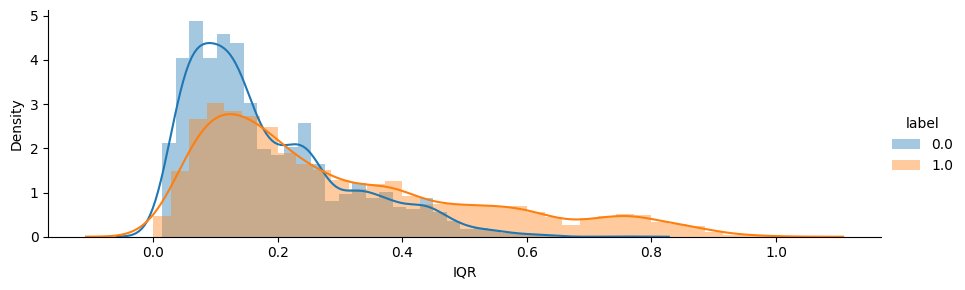

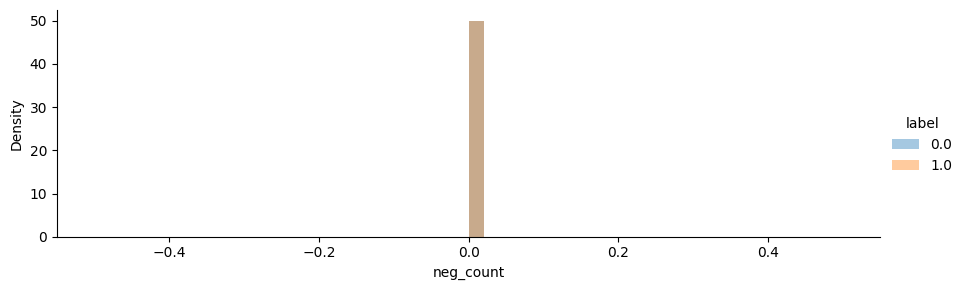

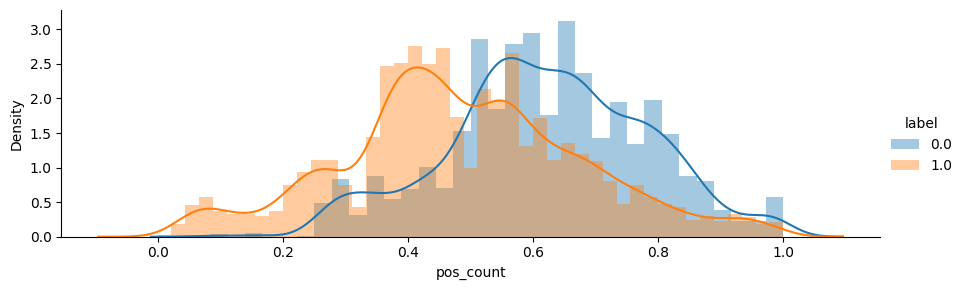

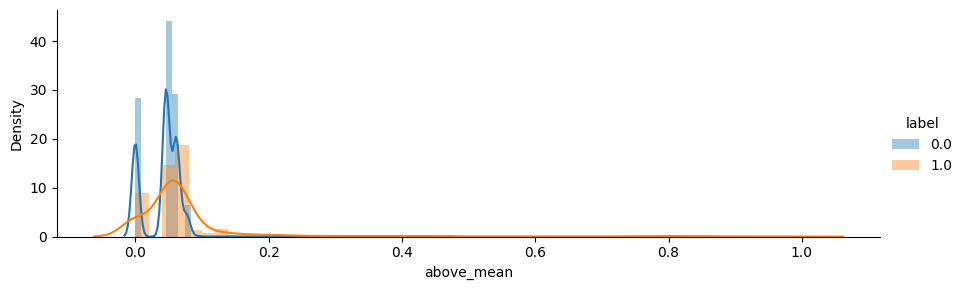

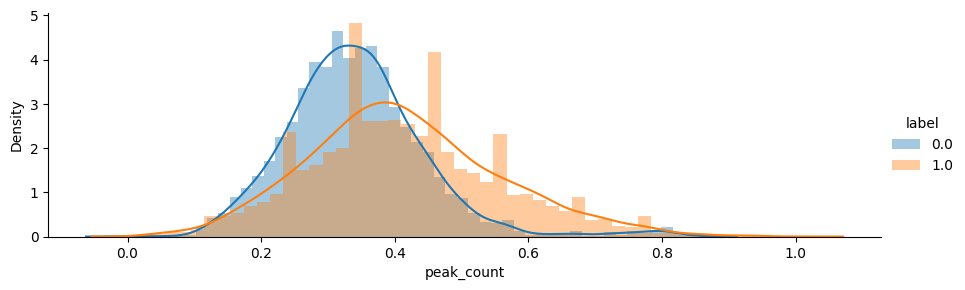

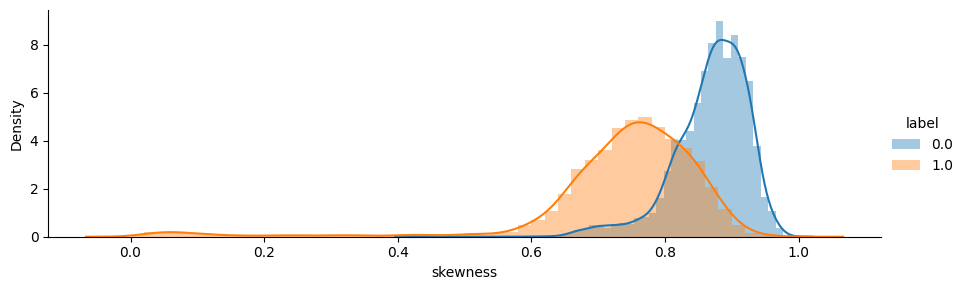

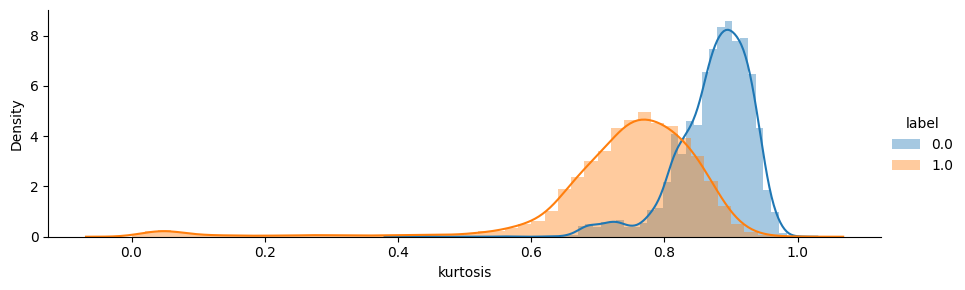

In [ ]:
data = X_pt_train
data['label'] = y_pt_train

# Define the new list of features
columns_features = ["mean_fft", "std_fft", "aad_fft", "min_fft", "max_fft", "maxmin_diff_fft", "median_fft", "mad_fft", "IQR_fft", "above_mean_fft", "peak_count_fft", "skewness_fft", "kurtosis_fft",
                    "mean", "std", "aad", "min", "max", "maxmin_diff", "median", "mad", "IQR", "neg_count", "pos_count", "above_mean", "peak_count", "skewness","kurtosis"];


for feature_to_verify in columns_features:
  # Apply a lambda function to obtain means of each feature's dimension and label
  means = data.apply(lambda x: pd.Series([x[feature_to_verify],
                                            x["label"]], index=[feature_to_verify, "label"]), axis=1)
  # Reset index and drop original index
  means = means.reset_index()
  means = means.drop(['index'], axis=1)

  # Plot distribution plots of means for each dimension of the feature
  g = sns.FacetGrid(means, hue="label", aspect=3).map(sns.distplot, feature_to_verify).add_legend()

#### Variance Threshold 

In [9]:
# Define a function to select features with a variance threshold

def variance_threshold_selector(data, threshold=0.04):
    # Instantiate a VarianceThreshold object with the given threshold
    selector = VarianceThreshold(threshold)

    # Fit the selector on the data to identify the features with low variance
    selector.fit(data)
    
    # Print the selected features identified by the selector
    print(selector.get_support())

    # Return a list of features with variance lower than the given threshold
    return [column for column in data.columns 
          if column not in data.columns[selector.get_support()]]

In [10]:
# List of features to consider
columns_features = ["mean_fft", "std_fft", "aad_fft", "min_fft", "max_fft", "maxmin_diff_fft", "median_fft", "mad_fft", "IQR_fft", "above_mean_fft", "peak_count_fft", "skewness_fft", "kurtosis_fft",
                    "mean", "std", "aad", "min", "max", "maxmin_diff", "median", "mad", "IQR", "neg_count", "pos_count", "above_mean", "peak_count", "skewness","kurtosis"];

# Selecting the prepared dataset with only the final columns
X_prepared = X_pt_train[columns_features]

# Printing the selected columns and their count
print(X_prepared.columns)
print(len(X_prepared.columns))

# Applying the variance threshold selector to remove low-variance features
X_train_still = variance_threshold_selector(X_prepared, threshold = 0.015)

# Dropping the low-variance features from the dataset
X_prepared = X_prepared.drop(X_train_still, axis = 1)
X_pt_test = X_pt_test.drop(X_train_still, axis = 1)

# Printing the final columns after applying variance threshold and their count
print(X_prepared.columns)
print(len(X_prepared.columns))

Index(['mean_fft', 'std_fft', 'aad_fft', 'min_fft', 'max_fft',
       'maxmin_diff_fft', 'median_fft', 'mad_fft', 'IQR_fft', 'above_mean_fft',
       'peak_count_fft', 'skewness_fft', 'kurtosis_fft', 'mean', 'std', 'aad',
       'min', 'max', 'maxmin_diff', 'median', 'mad', 'IQR', 'neg_count',
       'pos_count', 'above_mean', 'peak_count', 'skewness', 'kurtosis'],
      dtype='object')
28
[ True  True  True  True  True  True  True  True  True False False False
 False  True  True  True False False False  True  True  True False  True
 False  True  True  True]
Index(['mean_fft', 'std_fft', 'aad_fft', 'min_fft', 'max_fft',
       'maxmin_diff_fft', 'median_fft', 'mad_fft', 'IQR_fft', 'mean', 'std',
       'aad', 'median', 'mad', 'IQR', 'pos_count', 'peak_count', 'skewness',
       'kurtosis'],
      dtype='object')
19


In [11]:
X_pt_train = X_pt_train.drop(X_train_still, axis = 1)

In [12]:
X_pt_train

10        11        12        13        14        15        16  \
0      0.115942  0.129227  0.130435  0.126812  0.128824  0.128422  0.135266   
1      0.210815  0.212083  0.208703  0.202788  0.209125  0.209125  0.201521   
2      0.085227  0.080579  0.078254  0.078512  0.072572  0.076705  0.072831   
3      0.270686  0.283688  0.276596  0.277778  0.281915  0.295508  0.301418   
4      0.081524  0.088278  0.083936  0.093102  0.104679  0.112397  0.106126   
...         ...       ...       ...       ...       ...       ...       ...   
11635  0.166667  0.169679  0.184739  0.158635  0.181727  0.178715  0.187751   
11636  0.794389  0.833752  0.775963  0.835846  0.813233  0.791457  0.806951   
11637  0.187067  0.202079  0.191686  0.204965  0.188222  0.196305  0.224596   
11638  0.429218  0.444085  0.450549  0.445378  0.446671  0.471881  0.485456   
11639  0.090004  0.083783  0.086271  0.098714  0.096640  0.100373  0.101203   

             17        18        19  ...  kurtosis  mean_fft   std_fft  \
0      0.131240  0.138084  0.143317  ...  0.868469  0.760763  0.775551   
1      0.206168  0.220110  0.213773  ...  0.699424  0.595584  0.649537   
2      0.071798  0.079029  0.071798  ...  0.774256  0.580911  0.482404   
3      0.291962  0.293735  0.296099  ...  0.797938  0.592160  0.470151   
4      0.107574  0.124940  0.092619  ...  0.707239  0.487001  0.314764   
...         ...       ...       ...  ...       ...       ...       ...   
11635  0.206827  0.192771  0.230924  ...  0.742777  0.705154  0.798420   
11636  0.828308  0.806114  0.809883  ...  0.021471  0.134325  0.274629   
11637  0.227483  0.228637  0.207852  ...  0.721626  0.647132  0.723764   
11638  0.500970  0.524887  0.519069  ...  0.832834  0.724715  0.746709   
11639  0.105765  0.113646  0.127748  ...  0.875534  0.685703  0.590981   

        aad_fft   min_fft   max_fft  maxmin_diff_fft  median_fft   mad_fft  \
0      0.766928  0.190554  0.729056         0.744592    0.769430  0.685128   
1      0.625455  0.210138  0.616376         0.650707    0.599342  0.590371   
2      0.477637  0.497237  0.479685         0.445547    0.576531  0.458482   
3      0.468682  0.532660  0.483954         0.436570    0.575507  0.462691   
4      0.309252  0.647547  0.347235         0.291074    0.474009  0.354518   
...         ...       ...       ...              ...         ...       ...   
11635  0.768595  0.011389  0.742022         0.816709    0.719027  0.755765   
11636  0.210672  0.450666  0.335607         0.350320    0.061741  0.197303   
11637  0.697118  0.114974  0.674496         0.728613    0.657806  0.669454   
11638  0.736078  0.176715  0.710454         0.735010    0.734637  0.711467   
11639  0.592726  0.447534  0.595866         0.552577    0.677187  0.552262   

        IQR_fft  
0      0.741225  
1      0.502090  
2      0.482121  
3      0.494771  
4      0.324261  
...         ...  
11635  0.620456  
11636  0.125273  
11637  0.562893  
11638  0.690611  
11639  0.609792  

[11640 rows x 187 columns]

In [12]:
# Sort columns in ascending order

X_pt_train.columns = X_pt_train.columns.astype(str)
X_pt_test.columns = X_pt_test.columns.astype(str)

X_pt_train = X_pt_train.reindex(sorted(X_pt_train.columns), axis=1)
X_pt_test = X_pt_test.reindex(sorted(X_pt_test.columns), axis=1)

X_pt_train

10       100       101       102       103       104       105  \
0      0.115942  0.062399  0.067633  0.066828  0.062802  0.062802  0.051127   
1      0.210815  1.000000  0.891424  0.526827  0.329109  0.266160  0.239966   
2      0.085227  0.066374  0.064050  0.000000  0.000000  0.000000  0.000000   
3      0.270686  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.081524  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
11635  0.166667  0.346386  0.404618  0.462851  0.476908  0.513052  0.412651   
11636  0.794389  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11637  0.187067  0.154157  0.155312  0.151270  0.172633  0.136259  0.191686   
11638  0.429218  0.342599  0.329024  0.330963  0.334842  0.338720  0.331610   
11639  0.090004  0.119038  0.002074  0.000000  0.016176  0.038158  0.046454   

            106       107       108  ...      mean  mean_fft    median  \
0      0.053945  0.054348  0.061594  ...  0.149951  0.760763  0.123136   
1      0.210815  0.212083  0.200676  ...  0.184795  0.595584  0.219965   
2      0.000000  0.000000  0.000000  ...  0.104976  0.580911  0.088850   
3      0.000000  0.000000  0.000000  ...  0.226454  0.592160  0.262614   
4      0.000000  0.000000  0.000000  ...  0.078399  0.487001  0.000000   
...         ...       ...       ...  ...       ...       ...       ...   
11635  0.337349  0.289157  0.203815  ...  0.288785  0.705154  0.270025   
11636  0.000000  0.000000  0.000000  ...  0.427225  0.134325  0.000000   
11637  0.312933  0.612587  1.000000  ...  0.223056  0.647132  0.230965   
11638  0.310924  0.314803  0.300582  ...  0.444369  0.724715  0.445165   
11639  0.055164  0.053920  0.051431  ...  0.106242  0.685703  0.087810   

       median_fft   min_fft  peak_count  pos_count  skewness       std  \
0        0.769430  0.190554    0.400000   0.687023  0.855997  0.268343   
1        0.599342  0.210138    0.550000   0.541985  0.691592  0.289696   
2        0.576531  0.497237    0.350000   0.404580  0.778476  0.226880   
3        0.575507  0.532660    0.316667   0.396947  0.803632  0.370010   
4        0.474009  0.647547    0.300000   0.259542  0.727309  0.249047   
...           ...       ...         ...        ...       ...       ...   
11635    0.719027  0.011389    0.616667   0.702290  0.727750  0.368171   
11636    0.061741  0.450666    0.300000   0.167939  0.023948  0.939820   
11637    0.657806  0.114974    0.583333   0.618321  0.710329  0.285447   
11638    0.734637  0.176715    0.450000   0.656489  0.820554  0.485776   
11639    0.677187  0.447534    0.283333   0.511450  0.875459  0.275368   

        std_fft  
0      0.775551  
1      0.649537  
2      0.482404  
3      0.470151  
4      0.314764  
...         ...  
11635  0.798420  
11636  0.274629  
11637  0.723764  
11638  0.746709  
11639  0.590981  

[11640 rows x 187 columns]

In [14]:
X_pt_test

10       100       101       102       103       104       105  \
0     0.140473  0.358832  0.288595  0.249652  0.239221  0.158554  0.103616   
1     0.127868  0.141030  0.148928  0.000000  0.000000  0.000000  0.000000   
2     0.049015  0.038937  0.038479  0.034814  0.034814  0.034814  0.032524   
3     0.160637  0.109986  0.114327  0.167873  0.185239  0.183792  0.186686   
4     0.128288  0.066023  0.060386  0.060923  0.056361  0.052603  0.058239   
...        ...       ...       ...       ...       ...       ...       ...   
2905  0.052999  0.514852  0.965638  0.831101  0.501456  0.386721  0.225393   
2906  0.098345  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2907  0.227619  0.020000  0.156190  0.260000  0.278095  0.291429  0.269524   
2908  0.116986  0.087905  0.105089  0.122274  0.111699  0.120291  0.149372   
2909  0.148875  0.047317  0.066936  0.000000  0.021350  0.050779  0.078477   

           106       107       108  ...      mean  mean_fft    median  \
0     0.098053  0.091794  0.094576  ...  0.200576  0.794305  0.186574   
1     0.000000  0.000000  0.000000  ...  0.098879  0.650679  0.113298   
2     0.032066  0.034814  0.033898  ...  0.098531  0.974214  0.071408   
3     0.172214  0.224313  0.354559  ...  0.258239  0.753456  0.217502   
4     0.059850  0.059313  0.063875  ...  0.085816  0.622591  0.084340   
...        ...       ...       ...  ...       ...       ...       ...   
2905  0.156086  0.069307  0.042516  ...  0.073182  0.651043  0.054618   
2906  0.000000  0.000000  0.000000  ...  0.092168  0.624064  0.122154   
2907  0.307619  0.289524  0.292381  ...  0.297305  0.637514  0.361983   
2908  0.138797  0.000000  0.103106  ...  0.157752  0.695807  0.170758   
2909  0.089440  0.096365  0.118869  ...  0.055232  0.621982  0.076332   

      median_fft   min_fft  peak_count  pos_count  skewness       std  \
0       0.808515  0.128215    0.379310   0.730159  0.890457  0.344197   
1       0.632259  0.685326    0.155172   0.380952  0.923776  0.299196   
2       0.943511  0.121880    0.379310   0.984127  0.938862  0.275718   
3       0.711442  0.041554    0.741379   0.793651  0.701386  0.413465   
4       0.610369  0.492072    0.310345   0.436508  0.835363  0.259961   
...          ...       ...         ...        ...       ...       ...   
2905    0.643743  0.345165    0.396552   0.531746  0.808659  0.269284   
2906    0.614471  0.673849    0.189655   0.357143  0.894829  0.308084   
2907    0.639910  0.401770    0.362069   0.492063  0.819692  0.523163   
2908    0.693665  0.260644    0.413793   0.603175  0.827805  0.319668   
2909    0.621602  0.383059    0.379310   0.476190  0.804172  0.138408   

       std_fft  
0     0.809829  
1     0.442299  
2     0.984068  
3     0.852352  
4     0.517080  
...        ...  
2905  0.625765  
2906  0.417441  
2907  0.579831  
2908  0.696965  
2909  0.566550  

[2910 rows x 187 columns]

In [ ]:
print(len(y_pt_train))
y_pt_train

11640


0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11635    1.0
11636    1.0
11637    1.0
11638    0.0
11639    1.0
Name: 187, Length: 11640, dtype: float64

In [ ]:
print(len(y_pt_test))
y_pt_test

2910


0       1.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
2905    1.0
2906    1.0
2907    1.0
2908    0.0
2909    1.0
Name: 187, Length: 2910, dtype: float64

### **Algoritmi propuși și evaluarea acestora [2p]**

Pentru analiza celor două seturi de date veți folosi următorii algoritmi:

● RandomForest - folosiți implementarea din scikit-learn [0.5p]

● GradientBoosted Trees - folosiți implementarea din biblioteca xgboost [0.75p]

● SVM - folosiți implementarea din scikit-learn [0.75p]

Folosiți înțelegerea datelor câștigată la pasul 3.1 pentru a determina dacă este necesară
standardizarea datelor. Acest pas este unul des întâlnit etapă de pre-procesare a datelor
înainte de antrenarea unui clasificator, în vederea uniformizării valorilor numerice aferente
fiecărui tip de atribut (e.g. nu este dorit ca unele atribute sa aibă valori de ordinul miilor, iar
altele de ordinul unităților).

Partea de extragere a atributelor propusă în secțiunea 3.2.2 poate duce la un număr mare
de atribute extrase. Frecvent se întâmplă ca nu toate atributele să aibă o contribuție
importantă în cadrul predicției.
Ca atare, investigați aplicarea tehnicilor de selectare a atributelor (eng. Feature selection)
oferite în scikit-learn. Folosiți cel puțin una din metodele Variance Threshold sau Select
Percentile.

Fiecare algoritm din cei propuși are o serie de hiper-parametrii care influențează
funcționarea acestuia. Pentru a găsi valorile potrivite pentru aceștia veți folosi o procedură
de căutare a hiper-parametrilor pe bază de Grid Search cu Cross Validation.
Setul minim de hiper-parametrii de căutat este:

● SVM: tipul de kernel, parametru C de regularizare

● RandomForest: numărul de arbori, adâncimea maximă a unui arbore, procentul din
input folosit la antrenarea fiecărui arbore

● GradientBoostedTrees: numărul de arbori, adâncimea maximă a unui arbore,
learning rate



# **Evaluarea algoritmilor**
În raportul vostru trebuie sa prezentați următoarele:

● Rezultatul procedurii de feature selection: numărul total de feature-uri considerate și
numărul total de feature-uri utilizate la antrenare (ca urmare a procedurii de feature
selection)

● Pentru fiecare algoritm, realizați un tabel în care să prezentați media si varianța
pentru acuratețea generală de clasificare, precizie / recall / F1 la nivelul fiecărei
clase în parte

○ Pe linii va fi indexată configurația de hiper-parametrii rezultată din procedura
de GridSearch.

○ Pe coloane vor fi prezentate metricile cerute

○ Relevați prin bolduire valorile maxime pentru fiecare metrică

● Pentru cea mai bună variantă a hiper-parametrilor, pentru fiecare algoritm,
realizați o matrice de confuzie peste clase.

In [15]:
# Create RandomForest Model
random_forest = RandomForestClassifier(n_estimators = 100, max_depth = 10)

# Create XGB Model
gradient_boosted_trees = XGBClassifier(booster='gbtree', n_estimators=100, eta=0.3, max_depth=6, gamma = 0, reg_lambda = 1)

# Create SVM_rbf Model
svm_rbf = SVC(kernel = 'rbf')

# Creaate SVM_linear Model
smv_linear = SVC(kernel ='linear', C = 1)

In [16]:
# Fit RandomForest Model
random_forest.fit(X_pt_train, y_pt_train)

# Fit XGB Model
gradient_boosted_trees.fit(X_pt_train, y_pt_train)

# Fit SVM_rbf Model
svm_rbf.fit(X_pt_train, y_pt_train)

# Fit SVM_linear Model
smv_linear.fit(X_pt_train, y_pt_train)

print("Training finished.")

Training finished.


In [17]:
# Calculate errors
random_forest_error = 1 - accuracy_score(y_pt_test, random_forest.predict(X_pt_test))
gradient_boosted_trees_error = 1 - accuracy_score(y_pt_test, gradient_boosted_trees.predict(X_pt_test))
svm_rbf_error = 1 - accuracy_score(y_pt_test, svm_rbf.predict(X_pt_test))
smv_linear_error = 1 - accuracy_score(y_pt_test, smv_linear.predict(X_pt_test))

# Calculate accuracy
random_forest_accuracy = 1 - random_forest_error
gradient_boosted_trees_accuracy = 1 - gradient_boosted_trees_error
svm_rbf_accuracy = 1 - svm_rbf_error
smv_linear_accuracy = 1 - smv_linear_error

# Calculate the classification report
random_forest_report = classification_report(y_pt_test, random_forest.predict(X_pt_test), output_dict=True)
gradient_boosted_trees_report = classification_report(y_pt_test, gradient_boosted_trees.predict(X_pt_test), output_dict=True)
svm_rbf_report = classification_report(y_pt_test, svm_rbf.predict(X_pt_test), output_dict=True)
smv_linear_report = classification_report(y_pt_test, smv_linear.predict(X_pt_test), output_dict=True)

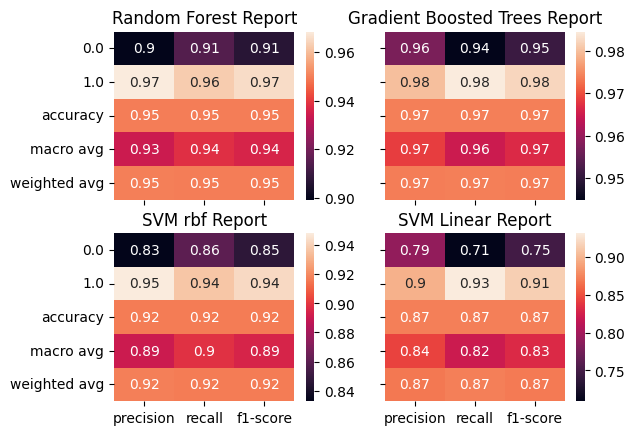

In [18]:
# Create a figure and four subplots arranged in a 2x2 grid with shared x and y axes
figure, axes = plt.subplots(2, 2, sharex = True, sharey = True)

sns.heatmap(pd.DataFrame(random_forest_report).iloc[:-1, :].T, annot=True, ax = axes[0][0])
axes[0][0].set_title('Random Forest Report')

sns.heatmap(pd.DataFrame(gradient_boosted_trees_report).iloc[:-1, :].T, annot=True, ax = axes[0][1])
axes[0][1].set_title('Gradient Boosted Trees Report')

sns.heatmap(pd.DataFrame(svm_rbf_report).iloc[:-1, :].T, annot=True, ax = axes[1][0])
axes[1][0].set_title('SVM rbf Report')

sns.heatmap(pd.DataFrame(smv_linear_report).iloc[:-1, :].T, annot=True, ax = axes[1][1])
axes[1][1].set_title('SVM Linear Report')
plt.show()

#### Try new models

##### Random Forest Models

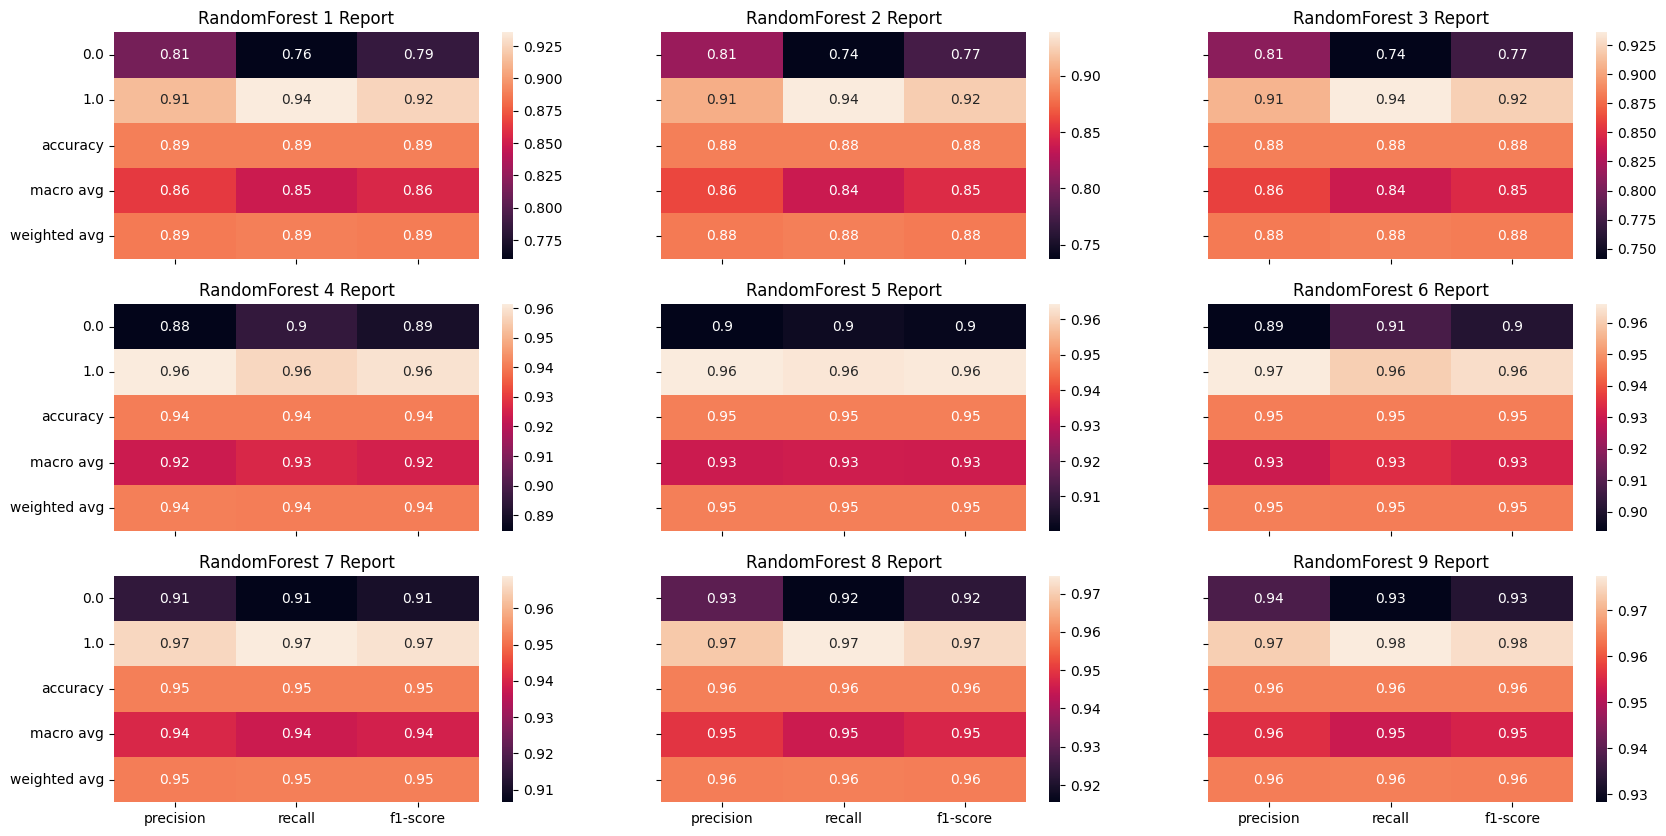

In [19]:
# Define several instances of Random Forest classifier with different hyperparameters

random_forest_1 = RandomForestClassifier(n_estimators = 60, max_depth = 5, max_samples = 0.3)
random_forest_2 = RandomForestClassifier(n_estimators = 60, max_depth = 5, max_samples = 0.6)
random_forest_3 = RandomForestClassifier(n_estimators = 60, max_depth = 5, max_samples = 0.9)

random_forest_4 = RandomForestClassifier(n_estimators = 120, max_depth = 10, max_samples = 0.3)
random_forest_5 = RandomForestClassifier(n_estimators = 120, max_depth = 10, max_samples = 0.6)
random_forest_6 = RandomForestClassifier(n_estimators = 120, max_depth = 10, max_samples = 0.9)

random_forest_7 = RandomForestClassifier(n_estimators = 80, max_depth = 15, max_samples = 0.3)
random_forest_8 = RandomForestClassifier(n_estimators = 80, max_depth = 15, max_samples = 0.6)
random_forest_9 = RandomForestClassifier(n_estimators = 80, max_depth = 15, max_samples = 0.9)

# Train each instance on the training data

random_forest_1.fit(X_pt_train, y_pt_train)
random_forest_2.fit(X_pt_train, y_pt_train)
random_forest_3.fit(X_pt_train, y_pt_train)
random_forest_4.fit(X_pt_train, y_pt_train)
random_forest_5.fit(X_pt_train, y_pt_train)
random_forest_6.fit(X_pt_train, y_pt_train)
random_forest_7.fit(X_pt_train, y_pt_train)
random_forest_8.fit(X_pt_train, y_pt_train)
random_forest_9.fit(X_pt_train, y_pt_train)

# Evaluate the performance of each instance on the test data using classification_report

random_forest_1_report = classification_report(y_pt_test, random_forest_1.predict(X_pt_test), output_dict=True)
random_forest_2_report = classification_report(y_pt_test, random_forest_2.predict(X_pt_test), output_dict=True)
random_forest_3_report = classification_report(y_pt_test, random_forest_3.predict(X_pt_test), output_dict=True)
random_forest_4_report = classification_report(y_pt_test, random_forest_4.predict(X_pt_test), output_dict=True)
random_forest_5_report = classification_report(y_pt_test, random_forest_5.predict(X_pt_test), output_dict=True)
random_forest_6_report = classification_report(y_pt_test, random_forest_6.predict(X_pt_test), output_dict=True)
random_forest_7_report = classification_report(y_pt_test, random_forest_7.predict(X_pt_test), output_dict=True)
random_forest_8_report = classification_report(y_pt_test, random_forest_8.predict(X_pt_test), output_dict=True)
random_forest_9_report = classification_report(y_pt_test, random_forest_9.predict(X_pt_test), output_dict=True)

# Create a 3x3 grid of subplots and plot the classification reports of the instances

figure, axes = plt.subplots(3, 3, sharex = True, sharey = True)
figure.set_figwidth(20)
figure.set_figheight(10)

report = random_forest_1_report;

# For each subplot, set the report variable to the corresponding instance's report and plot it using a heatmap
for i in range(0, 3):
  for j in range(0, 3):
    if (i) * 3 + (j + 1) == 1:
        report = random_forest_1_report
    elif (i) * 3 + (j + 1) == 2:
        report = random_forest_2_report
    elif (i) * 3 + (j + 1) == 3:
        report = random_forest_3_report
    elif (i) * 3 + (j + 1) == 4:
        report = random_forest_4_report
    elif (i) * 3 + (j + 1) == 5:
        report = random_forest_5_report    
    elif (i) * 3 + (j + 1) == 6:
        report = random_forest_6_report  
    elif (i) * 3 + (j + 1) == 7:
        report = random_forest_7_report  
    elif (i) * 3 + (j + 1) == 8:
        report = random_forest_8_report  
    elif (i) * 3 + (j + 1) == 9:
        report = random_forest_9_report  

    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, ax = axes[i][j])
    axes[i][j].set_title('RandomForest ' + str((i) * 3 + (j + 1)) + ' Report')
plt.show()

##### Gradient Boosted Trees Models

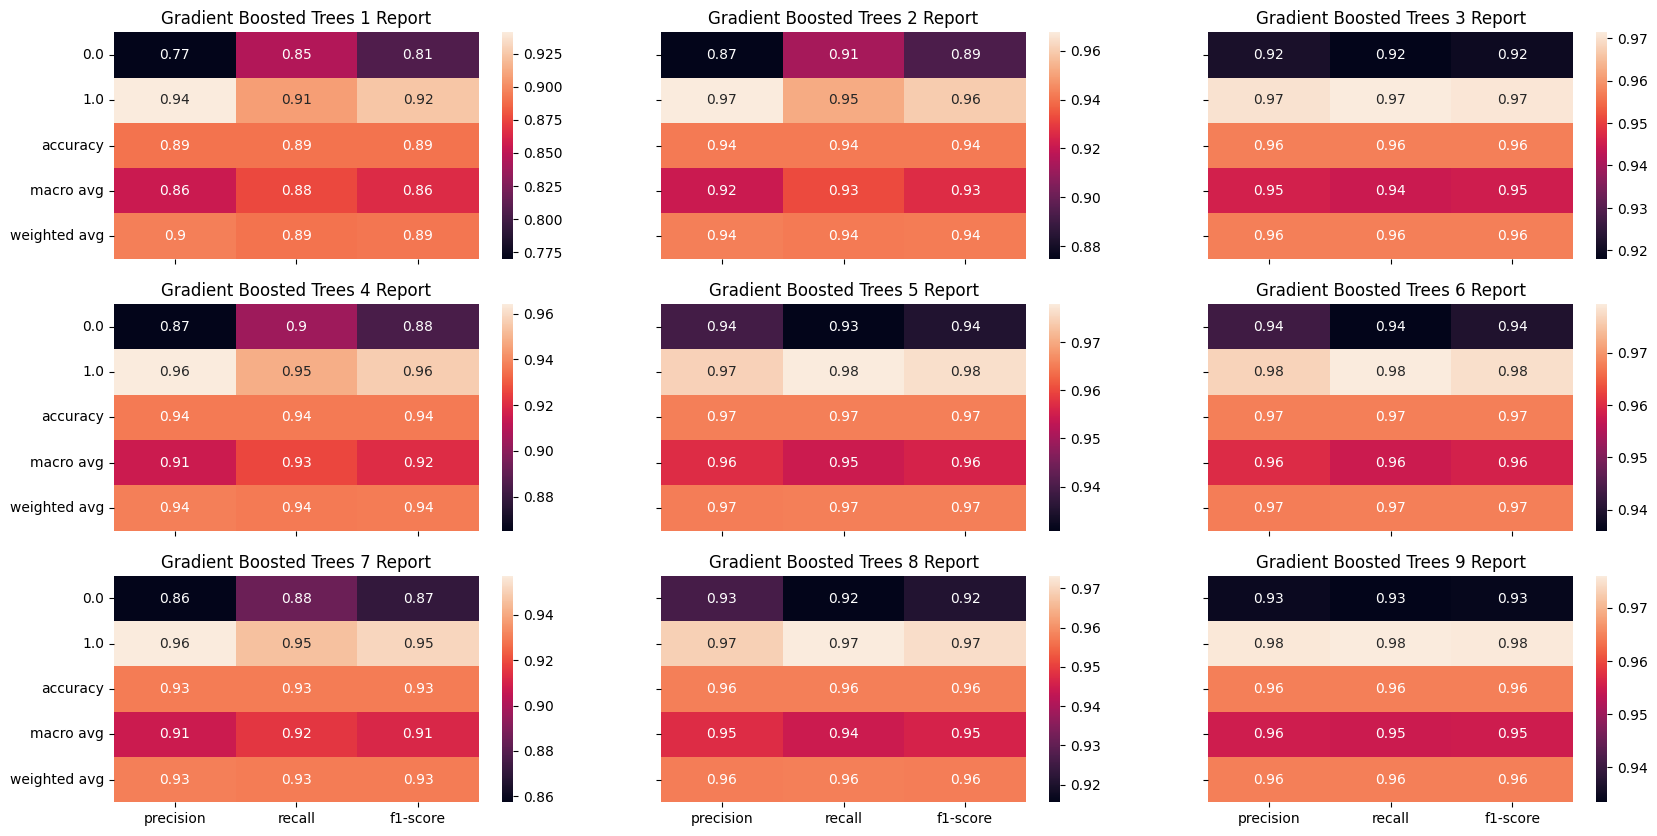

In [13]:
# Define XGBClassifiers with different hyperparameters

gb_trees_1 = XGBClassifier(n_estimators = 60, max_depth = 5, learning_rate = 0.01, nthread=-1, tree_method='gpu_hist')
gb_trees_2 = XGBClassifier(n_estimators = 60, max_depth = 5, learning_rate = 0.1, nthread=-1, tree_method='gpu_hist')
gb_trees_3 = XGBClassifier(n_estimators = 60, max_depth = 5, learning_rate = 0.2, nthread=-1, tree_method='gpu_hist')

gb_trees_4 = XGBClassifier(n_estimators = 120, max_depth = 10, learning_rate = 0.01, nthread=-1, tree_method='gpu_hist')
gb_trees_5 = XGBClassifier(n_estimators = 120, max_depth = 10, learning_rate = 0.1, nthread=-1, tree_method='gpu_hist')
gb_trees_6 = XGBClassifier(n_estimators = 120, max_depth = 10, learning_rate = 0.2, nthread=-1, tree_method='gpu_hist')

gb_trees_7 = XGBClassifier(n_estimators = 80, max_depth = 15, learning_rate = 0.01, nthread=-1, tree_method='gpu_hist')
gb_trees_8 = XGBClassifier(n_estimators = 80, max_depth = 15, learning_rate = 0.1, nthread=-1, tree_method='gpu_hist')
gb_trees_9 = XGBClassifier(n_estimators = 80, max_depth = 15, learning_rate = 0.2, nthread=-1, tree_method='gpu_hist')

# Fit the XGBClassifiers on the training data

gb_trees_1.fit(X_pt_train, y_pt_train)
gb_trees_2.fit(X_pt_train, y_pt_train)
gb_trees_3.fit(X_pt_train, y_pt_train)
gb_trees_4.fit(X_pt_train, y_pt_train)
gb_trees_5.fit(X_pt_train, y_pt_train)
gb_trees_6.fit(X_pt_train, y_pt_train)
gb_trees_7.fit(X_pt_train, y_pt_train)
gb_trees_8.fit(X_pt_train, y_pt_train)
gb_trees_9.fit(X_pt_train, y_pt_train)

# Generate classification reports for each XGBClassifier using the test data

gb_trees_1_report = classification_report(y_pt_test, gb_trees_1.predict(X_pt_test), output_dict=True)
gb_trees_2_report = classification_report(y_pt_test, gb_trees_2.predict(X_pt_test), output_dict=True)
gb_trees_3_report = classification_report(y_pt_test, gb_trees_3.predict(X_pt_test), output_dict=True)
gb_trees_4_report = classification_report(y_pt_test, gb_trees_4.predict(X_pt_test), output_dict=True)
gb_trees_5_report = classification_report(y_pt_test, gb_trees_5.predict(X_pt_test), output_dict=True)
gb_trees_6_report = classification_report(y_pt_test, gb_trees_6.predict(X_pt_test), output_dict=True)
gb_trees_7_report = classification_report(y_pt_test, gb_trees_7.predict(X_pt_test), output_dict=True)
gb_trees_8_report = classification_report(y_pt_test, gb_trees_8.predict(X_pt_test), output_dict=True)
gb_trees_9_report = classification_report(y_pt_test, gb_trees_9.predict(X_pt_test), output_dict=True)

# Create a 3x3 grid of subplots for displaying the classification reports

figure, axes = plt.subplots(3, 3, sharex = True, sharey = True)
figure.set_figwidth(20)
figure.set_figheight(10)

report = gb_trees_1_report;

# For each subplot, set the report variable to the corresponding instance's report and plot it using a heatmap

for i in range(0, 3):
  for j in range(0, 3):
    if (i) * 3 + (j + 1) == 1:
        report = gb_trees_1_report
    elif (i) * 3 + (j + 1) == 2:
        report = gb_trees_2_report
    elif (i) * 3 + (j + 1) == 3:
        report = gb_trees_3_report
    elif (i) * 3 + (j + 1) == 4:
        report = gb_trees_4_report
    elif (i) * 3 + (j + 1) == 5:
        report = gb_trees_5_report    
    elif (i) * 3 + (j + 1) == 6:
        report = gb_trees_6_report  
    elif (i) * 3 + (j + 1) == 7:
        report = gb_trees_7_report  
    elif (i) * 3 + (j + 1) == 8:
        report = gb_trees_8_report  
    elif (i) * 3 + (j + 1) == 9:
        report = gb_trees_9_report  

    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, ax = axes[i][j])
    axes[i][j].set_title('Gradient Boosted Trees ' + str((i) * 3 + (j + 1)) + ' Report')
plt.show()

##### SVM Search Model

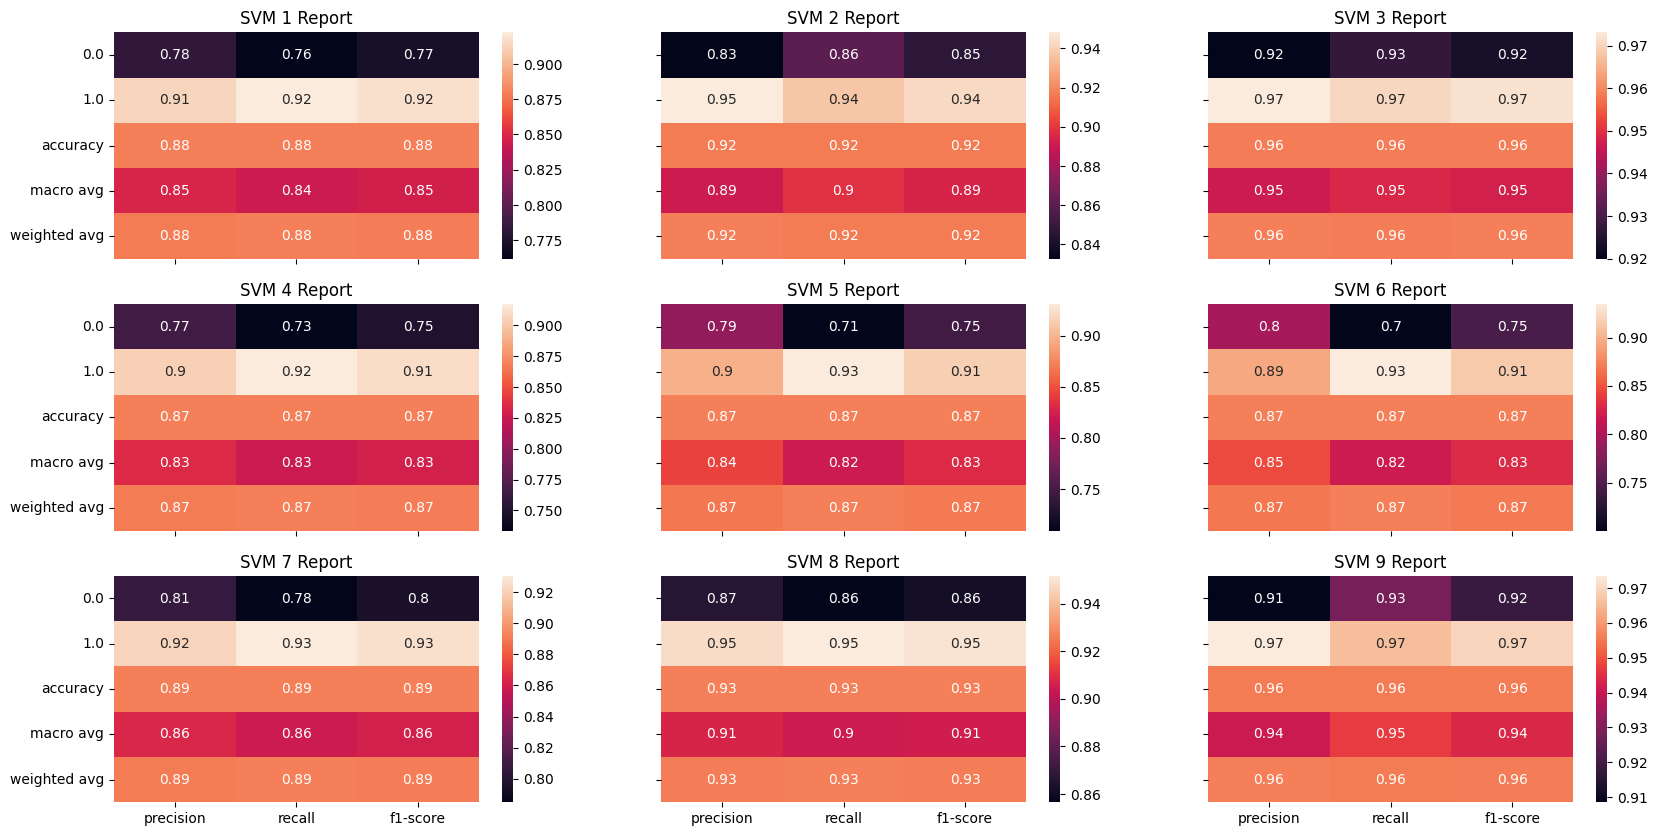

In [22]:
# Define SVM Classifiers with different hyperparameters

svm_1 = SVC(kernel = 'rbf', C = 0.1)
svm_2 = SVC(kernel = 'rbf', C = 1)
svm_3 = SVC(kernel = 'rbf', C = 10)

svm_4 = SVC(kernel = 'linear', C = 0.1)
svm_5 = SVC(kernel = 'linear', C = 1)
svm_6 = SVC(kernel = 'linear', C = 10)

svm_7 = SVC(kernel = 'poly', C = 0.1)
svm_8 = SVC(kernel = 'poly', C = 1)
svm_9 = SVC(kernel = 'poly', C = 10)

# Fit the SVM on the training data

svm_1.fit(X_pt_train, y_pt_train)
svm_2.fit(X_pt_train, y_pt_train)
svm_3.fit(X_pt_train, y_pt_train)
svm_4.fit(X_pt_train, y_pt_train)
svm_5.fit(X_pt_train, y_pt_train)
svm_6.fit(X_pt_train, y_pt_train)
svm_7.fit(X_pt_train, y_pt_train)
svm_8.fit(X_pt_train, y_pt_train)
svm_9.fit(X_pt_train, y_pt_train)

# Generate classification reports for each SVM using the test data

svm_1_report = classification_report(y_pt_test, svm_1.predict(X_pt_test), output_dict=True)
svm_2_report = classification_report(y_pt_test, svm_2.predict(X_pt_test), output_dict=True)
svm_3_report = classification_report(y_pt_test, svm_3.predict(X_pt_test), output_dict=True)
svm_4_report = classification_report(y_pt_test, svm_4.predict(X_pt_test), output_dict=True)
svm_5_report = classification_report(y_pt_test, svm_5.predict(X_pt_test), output_dict=True)
svm_6_report = classification_report(y_pt_test, svm_6.predict(X_pt_test), output_dict=True)
svm_7_report = classification_report(y_pt_test, svm_7.predict(X_pt_test), output_dict=True)
svm_8_report = classification_report(y_pt_test, svm_8.predict(X_pt_test), output_dict=True)
svm_9_report = classification_report(y_pt_test, svm_9.predict(X_pt_test), output_dict=True)

# Create a 3x3 grid of subplots for displaying the classification reports

figure, axes = plt.subplots(3, 3, sharex = True, sharey = True)
figure.set_figwidth(20)
figure.set_figheight(10)

report = svm_1_report;

# For each subplot, set the report variable to the corresponding instance's report and plot it using a heatmap

for i in range(0, 3):
  for j in range(0, 3):
    if (i) * 3 + (j + 1) == 1:
        report = svm_1_report
    elif (i) * 3 + (j + 1) == 2:
        report = svm_2_report
    elif (i) * 3 + (j + 1) == 3:
        report = svm_3_report
    elif (i) * 3 + (j + 1) == 4:
        report = svm_4_report
    elif (i) * 3 + (j + 1) == 5:
        report = svm_5_report    
    elif (i) * 3 + (j + 1) == 6:
        report = svm_6_report  
    elif (i) * 3 + (j + 1) == 7:
        report = svm_7_report  
    elif (i) * 3 + (j + 1) == 8:
        report = svm_8_report  
    elif (i) * 3 + (j + 1) == 9:
        report = svm_9_report  

    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, ax = axes[i][j])
    axes[i][j].set_title('SVM ' + str((i) * 3 + (j + 1)) + ' Report')
plt.show()

#### Use GridSearch CV

##### Random Forest Search Model

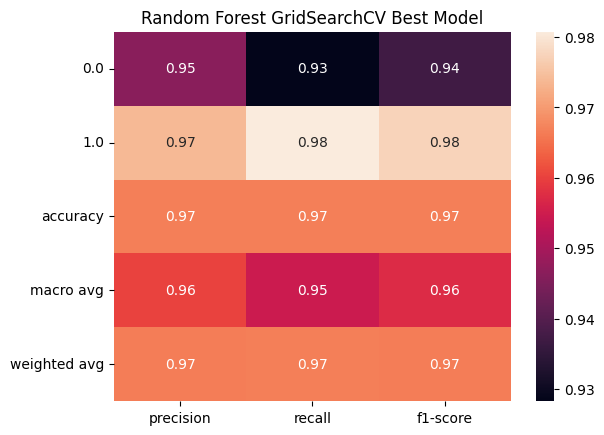

{'max_depth': 22, 'max_samples': 0.9, 'n_estimators': 150}
RandomForestClassifier(max_depth=22, max_samples=0.9, n_estimators=150)


In [24]:
# Define a dictionary of hyperparameters for the Random Forest Classifier model
parameters = {
    'max_depth': [8, 13, 18, 22, 25, 30],
    'n_estimators': [80, 100, 150, 200],
    'max_samples': [0.5, 0.9]
}

# Initialize the GridSearchCV object with the Random Forest Classifier model, the hyperparameter dictionary, and other necessary parameters
random_forest_gridSearchCV = GridSearchCV(RandomForestClassifier(), parameters, refit = True, cv = 5)

# Train the GridSearchCV object on the training data
random_forest_gridSearchCV.fit(X_pt_train, y_pt_train)

# Generate a classification report for the best model identified by the GridSearchCV
random_forest_gridSearchCV_report = classification_report(y_pt_test, random_forest_gridSearchCV.predict(X_pt_test), output_dict=True)

# Create a heatmap of the classification report for better visualization
ax = plt.axes()
sns.heatmap(pd.DataFrame(random_forest_gridSearchCV_report).iloc[:-1, :].T, annot=True, ax = ax)

ax.set_title('Random Forest GridSearchCV Best Model')
plt.show()

# Print the best hyperparameters identified by the GridSearchCV
print(random_forest_gridSearchCV.best_params_)
print(random_forest_gridSearchCV.best_estimator_)

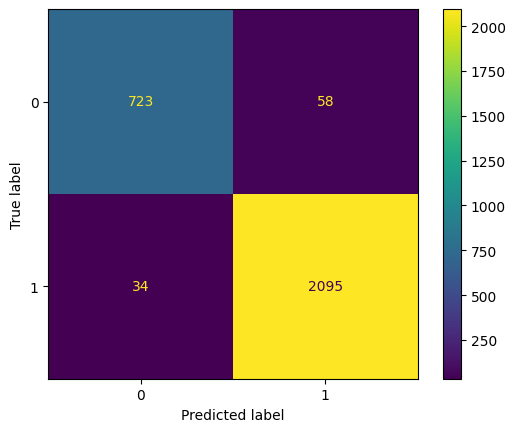

In [15]:
# Confusion Matrix

random_forest_best = RandomForestClassifier(n_estimators = 150, max_depth = 22, max_samples = 0.9)
random_forest_best.fit(X_pt_train, y_pt_train)

random_forest_cm = confusion_matrix(y_pt_test, random_forest_best.predict(X_pt_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = random_forest_cm)
cm_display.plot()
plt.show()

##### Gradient Boosted Trees Search Model

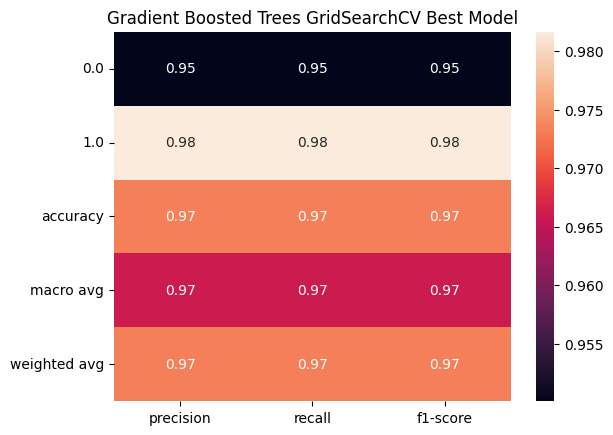

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}


In [16]:
# XGBoost Classifier Initialization
estimator = XGBClassifier(nthread=-1, tree_method='gpu_hist', seed=42)

# Parameter grid for Grid Search Cross Validation
parameters = {
    'max_depth': [5, 13, 20, 25, 7, 10, 22, 30, 40],
    'n_estimators': [70, 100, 170, 220, 140, 90, 250, 300, 50],
    'learning_rate': [0.1, 0.2]
}

# Grid Search Cross Validation Initialization
gb_trees_gridSearchCV = GridSearchCV(estimator=estimator, param_grid=parameters, n_jobs = -1, cv = 3, refit = True)

# Fitting the Grid Search Cross Validation with training data
gb_trees_gridSearchCV.fit(X_pt_train, y_pt_train)

# Generating classification report for the test data
gb_trees_gridSearchCV_report = classification_report(y_pt_test, gb_trees_gridSearchCV.predict(X_pt_test), output_dict=True)

# Plotting Heatmap for Classification Report
ax = plt.axes()
sns.heatmap(pd.DataFrame(gb_trees_gridSearchCV_report).iloc[:-1, :].T, annot=True, ax = ax)

ax.set_title('Gradient Boosted Trees GridSearchCV Best Model')
plt.show()

# Printing the best parameters and estimator from the Grid Search Cross Validation
print(gb_trees_gridSearchCV.best_params_)
#print(gb_trees_gridSearchCV.best_estimator_)

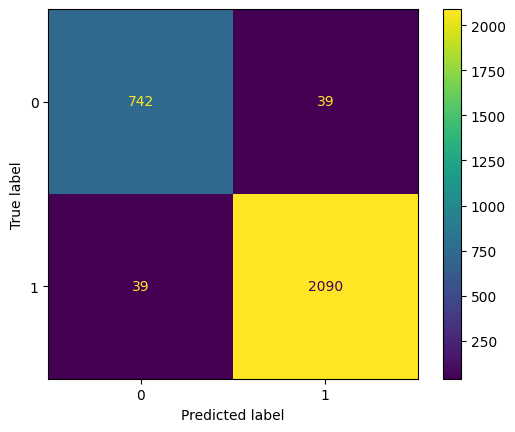

In [17]:
# Confusion Matrix

gb_trees_best = XGBClassifier(n_estimators = 300, max_depth = 5, nthread=-1, tree_method='gpu_hist', learning_rate = 0.2)
gb_trees_best.fit(X_pt_train, y_pt_train)

gb_trees_cm = confusion_matrix(y_pt_test, gb_trees_best.predict(X_pt_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = gb_trees_cm)
cm_display.plot()
plt.show()

##### SVM Search Model

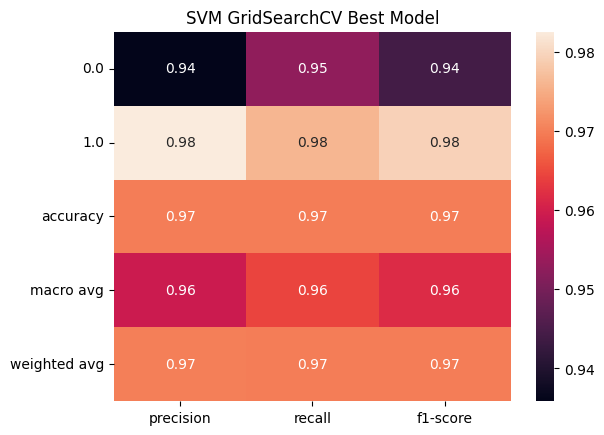

{'C': 70, 'kernel': 'rbf'}
SVC(C=70)


In [14]:
# Define a dictionary of parameter ranges to search over
parameters = {'kernel':['poly', 'rbf'], 'C':[1, 2, 3, 4, 8, 12, 20, 30, 40, 50, 70]}

# Create a GridSearchCV object with the SVM classifier and the parameter ranges to search over
svm_gridSearchCV = GridSearchCV(SVC(), parameters, refit = True, cv = 3, n_jobs = -1)

# Train the GridSearchCV object on the training data
svm_gridSearchCV.fit(X_pt_train, y_pt_train)

# Generate a classification report on the test data for the best model found by GridSearchCV
svm_gridSearchCV_report = classification_report(y_pt_test, svm_gridSearchCV.predict(X_pt_test), output_dict=True)

# Create a heatmap of the classification report using Seaborn
ax = plt.axes()
sns.heatmap(pd.DataFrame(svm_gridSearchCV_report).iloc[:-1, :].T, annot=True, ax = ax)

ax.set_title('SVM GridSearchCV Best Model')
plt.show()

# Print the parameters of the best model found by GridSearchCV
print(svm_gridSearchCV.best_params_)
print(svm_gridSearchCV.best_estimator_)

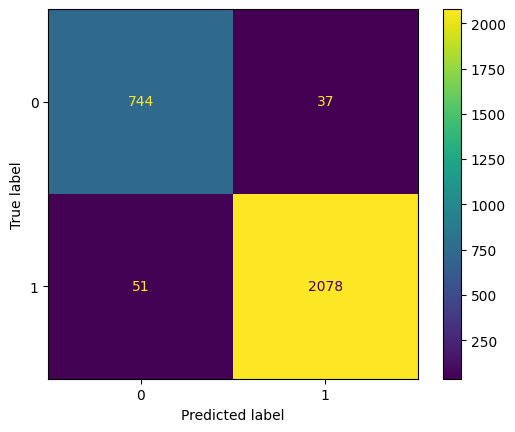

In [14]:
# Confusion Matrix

svm_best = SVC(kernel = 'rbf', C = 70)
svm_best.fit(X_pt_train, y_pt_train)

svm_best_cm = confusion_matrix(y_pt_test, svm_best.predict(X_pt_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svm_best_cm)
cm_display.plot()
plt.show()